# trade_sign_classification

#### Juan Camilo Henao Londono - 13.02.2019
#### AG Guhr - Universitaet Duisburg-Essen

# Classification of trades signs

It is first classified the sign for each trade by comparing the current and the prior price

$$\epsilon (t;n) = \left\{ \begin{array}{cc} \text{sgn}\left(S\left(t;n\right)-S\left(t;n-1\right)\right), & \text{if }S\left(t;n\right)\ne S\left(t;n-1\right)\\ \epsilon\left(t;n-1\right), & otherwise \end{array}\right.$$

If the current price is higher (lower) than the prior price, the trade sign is defined as +1 (-1). If two consecutive trades having the same trading direction together did not exhaust the available volume at the best quote, the prices of both trades would be the same.
 
During the time interval t, the number of trades is denoted by N(t), and the individual trades carried out are numbered by n = 1, ..., N(t). Therefore, it is defined the trade sign for each time interval of one second by

$$\epsilon (t) = \left\{ \begin{array}{cc} \text{sgn}\left(\sum_{n=1}^{N(t)} \epsilon(t;n) \right), & \text{if }N(t) > 0\\ 0, & \text{if } N(t) = 0 \end{array}\right.$$

Here, if more than one trade occur in the one-second interval t, it is averaged all the trade signs in this interval.

As a result, ε(t) = +1 implies that a majority of trades in the time interval t were triggered by buy market orders, whereas ε(t) = −1 indicates a majority of sell market orders. If ε(t) = 0 trades did not take place in the time interval t or there was a balance of buy and sell market orders in this interval.

In [1]:
# Modules

import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

import gzip
import pickle

__tau__ = 1000

In [2]:
year = '2008'
month = '01'
day = '07'
ticker = 'AAPL'

# Load data

times_, ids_, types_, prices_ = np.loadtxt(gzip.open('../ITCH_{1}/{1}{2}{3}_{0}.csv.gz'
                                 .format(ticker, year, month, day)), usecols=(0, 2, 3, 5),
                                 skiprows=1, dtype=[('col0', 'int16'), ('col1', 'int16'), ('col2', 'U25'), ('col3', 'f8')],
                                 delimiter=',', unpack=True)

# Lists of times, ids, types, volumes and prices
    # List of all the available information available in the data excluding
    # the last two columns

    # List of order types:
    # "B" = 1 - > Add buy order
    # "S" = 2 - > Add sell order
    # "E" = 3 - > Execute outstanding order in part
    # "C" = 4 - > Cancel outstanding order in part
    # "F" = 5 - > Execute outstanding order in full
    # "D" = 6 - > Delete outstanding order in full
    # "X" = 7 - > Bulk volume for the cross event
    # "T" = 8 - > Execute non-displayed order

types_ = (1 * (types_ == 'B') +
         2 * (types_ == 'S') +
         3 * (types_ == 'E') +
         0 * (types_ == 'C') +
         4 * (types_ == 'F') +
         0 * (types_ == 'D') +
         0 * (types_ == 'X') +
         0 * (types_ == 'T'))

ids = ids_[types_ > 0]
times = times_[types_ > 0]
types = types_[types_ > 0]
prices = prices_[types_ > 0]

In [3]:
# Load data

data = np.genfromtxt(gzip.open('../ITCH_{1}/{1}{2}{3}_{0}.csv.gz'
                     .format(ticker, year, month, day)),
                     dtype='str', skip_header=1, delimiter=',')

# Lists of times, ids, types, volumes and prices
# List of all the available information available in the data excluding
# the last two columns

# List of order types:
# "B" = 1 - > Add buy order
# "S" = 2 - > Add sell order
# "E" = 3 - > Execute outstanding order in part
# "C" = 4 - > Cancel outstanding order in part
# "F" = 5 - > Execute outstanding order in full
# "D" = 6 - > Delete outstanding order in full
# "X" = 7 - > Bulk volume for the cross event
# "T" = 8 - > Execute non-displayed order
times_ = np.array([int(mytime) for mytime in data[:, 0]])
ids_ = np.array([int(myid) for myid in data[:, 2]])
types_ = np.array([1 * (mytype == 'B') +
                   2 * (mytype == 'S') +
                   3 * (mytype == 'E') +
                   4 * (mytype == 'C') +
                   5 * (mytype == 'F') +
                   6 * (mytype == 'D') +
                   7 * (mytype == 'X') +
                   8 * (mytype == 'T') for mytype in data[:, 3]])
prices_ = np.array([int(myprice) for myprice in data[:, 5]])

ids = ids_[types_ < 7]
times = times_[types_ < 7]
types = types_[types_ < 7]
prices = prices_[types_ < 7]

In [4]:
# Reference lists
# Reference lists using the original values or the length of the original
# lists

prices_ref = 1 * prices
types_ref = 0 * types
times_ref = 0 * times
newids = {}
hv = 0

# Help lists with the data of the buy orders and sell orders

hv_prices = prices[types < 3]
hv_types = types[types < 3]
hv_times = times[types < 3]

trade_sign = 0 * types
price_sign = 0 * types

In [5]:
# Fill the reference lists where the values of 'T' are 'E', 'C', 'F', 'D'

# For the data in the length of the ids list (all data)
for iii in range(len(ids)):

    # If the data is a sell or buy order
    if (types[iii] < 3):

        # Insert in the dictionary newids a key with the valor of the id
        # and the value of hv (a counter) that is the index in hv_types
        newids[ids[iii]] = hv

        # Increase the value of hv
        hv += 1

        trade_sign[iii] = 0
        price_sign[iii] = 0

    # If the data is not a sell or buy order
    elif (types[iii] == 3 or
            types[iii] == 5):

        # Fill the values of prices_ref with no prices ('E', 'C', 'F', 'D')
        # with the price of the order
        prices_ref[iii] = hv_prices[newids[ids[iii]]]
        
        # Fill the values of types_ref with no  prices ('E', 'C', 'F', 'D')
        # with the type of the order
        types_ref[iii] = hv_types[newids[ids[iii]]]

        # Fill the values of time_ref with no  prices ('E', 'C', 'F', 'D')
        # with the time of the order
        times_ref[iii] = hv_times[newids[ids[iii]]]

        if (hv_types[newids[ids[iii]]] == 2):

            trade_sign[iii] = 1.
            price_sign[iii] = prices_ref[iii]

        elif (hv_types[newids[ids[iii]]] == 1):

            trade_sign[iii] = - 1.
            price_sign[iii] = prices_ref[iii]

    else:

        # Fill the values of types_ref with no  prices ('E', 'C', 'F', 'D')
        # with the type of the order
        types_ref[iii] = hv_types[newids[ids[iii]]]

        # Fill the values of time_ref with no  prices ('E', 'C', 'F', 'D')
        # with the time of the order
        times_ref[iii] = hv_times[newids[ids[iii]]]

        trade_sign[iii] = 0
        price_sign[iii] = 0

In [6]:
# Ordering the data in the open market time

# This line behaves as an or.the two arrays must achieve a condition, in
# this case, be in the market trade hours
day_times_ind = (1. * times / 3600 / 1000 > 9.5) * \
                (1. * times / 3600 / 1000 < 16) > 0

price_signs = price_sign[day_times_ind]
trade_signs = trade_sign[day_times_ind]
times_signs = times[day_times_ind]

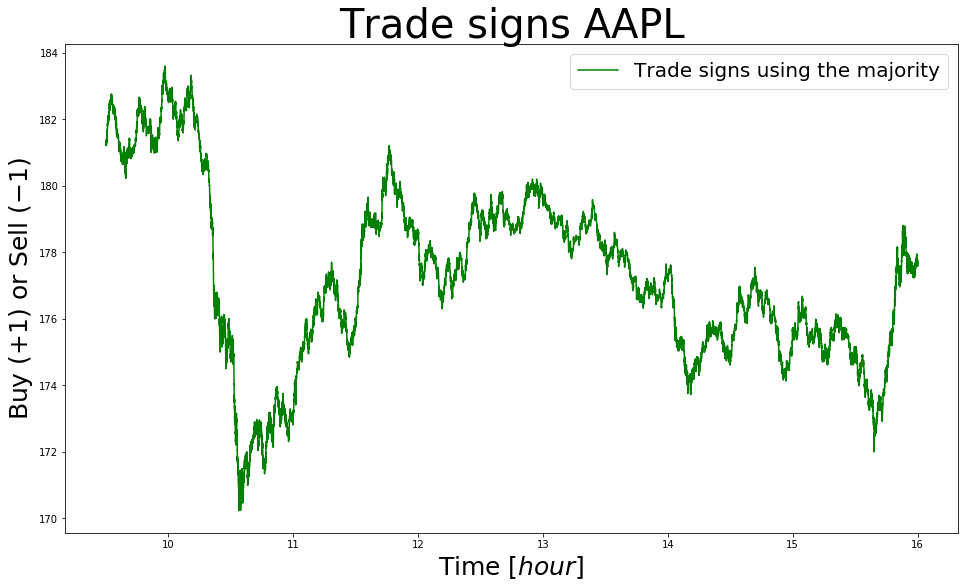

In [8]:
figure = plt.figure(figsize=(16, 9))

plt.plot(times_signs[price_signs !=0] / 1000 / 3600,
         price_signs[price_signs !=0] / 10000, '-g',
         label='Trade signs using the majority')
plt.title('Trade signs {}'.format(ticker), fontsize=40)
plt.xlabel(r'Time $[hour]$', fontsize=25)
plt.ylabel(r'Buy $(+1)$ or Sell $(-1)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

In [17]:
# Theoric

count = 0
idx = 0
trade_signs_teo = np.zeros(len(set(times_signs)))
times_signs_teo = np.zeros(len(set(times_signs)))

while (count < len(price_signs)):
        
    signs = trade_signs[count]

    count += 1

    while (count < len(price_signs) and times_signs[count] == times_signs[count - 1]):

        signs += trade_signs[count]
        count += 1

    trade_signs_teo[idx] = np.sign(signs)
    times_signs_teo[idx] = times_signs[count - 1]
    idx += 1

In [18]:
ttt = np.array(list(sorted(set(times_signs))))
print(1 * np.sum(ttt == times_signs_teo) / len(ttt) * 100, '%')
print(len(ttt))
print(len(times_signs_teo))
print(ttt)
print(times_signs_teo)

100.0 %
1089316
1089316
[34200002 34200005 34200006 ... 57599987 57599989 57599995]
[34200002. 34200005. 34200006. ... 57599987. 57599989. 57599995.]


In [43]:
len(times_signs[times_signs == times_signs[0]])
len(set(times_signs[trade_signs != 0]))
len(price_signs[price_signs != 0])

131651

In [42]:
# Practical

count = 0
idx = 0

trade_signs_pra = np.zeros(len(set(times_signs[price_signs != 0])))

while (count < len(price_signs[price_signs != 0])):
    
    sign_p = np.zeros(len(times_signs[times_signs == times_signs[count]]))
    print('len', len(sign_p))
    count += 1
    iii = 0
    
    while (count < len(price_signs[price_signs != 0]) and times_signs[count] == times_signs[count - 1]):
        
        diff = trade_signs[count] - trade_signs[count - 1]
        
        if (diff):
            sign_p[iii] = np.sign(diff)
            count += 1
            iii += 1
        else:
            sign_p[iii] = sign_p[iii - 1]
            count += 1
            iii += 1
            
    trade_signs_pra[idx] = np.sign(np.sum(np.sign(sign_p)))
    idx += 1
    
    print('idx' , idx)
    print('count', count)
    print()

len 1
idx 1
count 1

len 1
idx 2
count 2

len 2
idx 3
count 4

len 1
idx 4
count 5

len 2
idx 5
count 7

len 36
idx 6
count 43

len 2
idx 7
count 45

len 2
idx 8
count 47

len 1
idx 9
count 48

len 1
idx 10
count 49

len 1
idx 11
count 50

len 30
idx 12
count 80

len 1
idx 13
count 81

len 1
idx 14
count 82

len 1
idx 15
count 83

len 92
idx 16
count 175

len 3
idx 17
count 178

len 91
idx 18
count 269

len 91
idx 19
count 360

len 1
idx 20
count 361

len 1
idx 21
count 362

len 1
idx 22
count 363

len 1
idx 23
count 364

len 1
idx 24
count 365

len 1
idx 25
count 366

len 1
idx 26
count 367

len 2
idx 27
count 369

len 1
idx 28
count 370

len 1
idx 29
count 371

len 1
idx 30
count 372

len 2
idx 31
count 374

len 1
idx 32
count 375

len 1
idx 33
count 376

len 2
idx 34
count 378

len 3
idx 35
count 381

len 2
idx 36
count 383

len 2
idx 37
count 385

len 1
idx 38
count 386

len 1
idx 39
count 387

len 24
idx 40
count 411

len 1
idx 41
count 412

len 1
idx 42
count 413

len 1
idx 43
co

idx 340
count 931

len 2
idx 341
count 933

len 1
idx 342
count 934

len 1
idx 343
count 935

len 1
idx 344
count 936

len 1
idx 345
count 937

len 1
idx 346
count 938

len 1
idx 347
count 939

len 1
idx 348
count 940

len 1
idx 349
count 941

len 1
idx 350
count 942

len 1
idx 351
count 943

len 2
idx 352
count 945

len 1
idx 353
count 946

len 1
idx 354
count 947

len 1
idx 355
count 948

len 1
idx 356
count 949

len 1
idx 357
count 950

len 1
idx 358
count 951

len 1
idx 359
count 952

len 1
idx 360
count 953

len 1
idx 361
count 954

len 2
idx 362
count 956

len 2
idx 363
count 958

len 2
idx 364
count 960

len 1
idx 365
count 961

len 2
idx 366
count 963

len 1
idx 367
count 964

len 1
idx 368
count 965

len 4
idx 369
count 969

len 1
idx 370
count 970

len 1
idx 371
count 971

len 1
idx 372
count 972

len 1
idx 373
count 973

len 1
idx 374
count 974

len 1
idx 375
count 975

len 1
idx 376
count 976

len 2
idx 377
count 978

len 4
idx 378
count 982

len 3
idx 379
count 985

len 1


len 2
idx 669
count 1448

len 2
idx 670
count 1450

len 1
idx 671
count 1451

len 2
idx 672
count 1453

len 1
idx 673
count 1454

len 1
idx 674
count 1455

len 1
idx 675
count 1456

len 1
idx 676
count 1457

len 2
idx 677
count 1459

len 1
idx 678
count 1460

len 1
idx 679
count 1461

len 1
idx 680
count 1462

len 3
idx 681
count 1465

len 1
idx 682
count 1466

len 2
idx 683
count 1468

len 1
idx 684
count 1469

len 1
idx 685
count 1470

len 1
idx 686
count 1471

len 1
idx 687
count 1472

len 1
idx 688
count 1473

len 1
idx 689
count 1474

len 1
idx 690
count 1475

len 1
idx 691
count 1476

len 2
idx 692
count 1478

len 1
idx 693
count 1479

len 1
idx 694
count 1480

len 1
idx 695
count 1481

len 1
idx 696
count 1482

len 8
idx 697
count 1490

len 1
idx 698
count 1491

len 1
idx 699
count 1492

len 1
idx 700
count 1493

len 1
idx 701
count 1494

len 1
idx 702
count 1495

len 1
idx 703
count 1496

len 1
idx 704
count 1497

len 1
idx 705
count 1498

len 1
idx 706
count 1499

len 1
idx 70

idx 994
count 1984

len 2
idx 995
count 1986

len 2
idx 996
count 1988

len 2
idx 997
count 1990

len 1
idx 998
count 1991

len 1
idx 999
count 1992

len 1
idx 1000
count 1993

len 1
idx 1001
count 1994

len 1
idx 1002
count 1995

len 1
idx 1003
count 1996

len 2
idx 1004
count 1998

len 2
idx 1005
count 2000

len 1
idx 1006
count 2001

len 3
idx 1007
count 2004

len 1
idx 1008
count 2005

len 1
idx 1009
count 2006

len 1
idx 1010
count 2007

len 1
idx 1011
count 2008

len 1
idx 1012
count 2009

len 1
idx 1013
count 2010

len 1
idx 1014
count 2011

len 1
idx 1015
count 2012

len 1
idx 1016
count 2013

len 2
idx 1017
count 2015

len 1
idx 1018
count 2016

len 1
idx 1019
count 2017

len 1
idx 1020
count 2018

len 2
idx 1021
count 2020

len 1
idx 1022
count 2021

len 1
idx 1023
count 2022

len 1
idx 1024
count 2023

len 1
idx 1025
count 2024

len 3
idx 1026
count 2027

len 2
idx 1027
count 2029

len 1
idx 1028
count 2030

len 1
idx 1029
count 2031

len 2
idx 1030
count 2033

len 1
idx 103

len 1
idx 1300
count 2473

len 1
idx 1301
count 2474

len 1
idx 1302
count 2475

len 1
idx 1303
count 2476

len 1
idx 1304
count 2477

len 1
idx 1305
count 2478

len 2
idx 1306
count 2480

len 2
idx 1307
count 2482

len 1
idx 1308
count 2483

len 1
idx 1309
count 2484

len 1
idx 1310
count 2485

len 1
idx 1311
count 2486

len 1
idx 1312
count 2487

len 1
idx 1313
count 2488

len 1
idx 1314
count 2489

len 2
idx 1315
count 2491

len 2
idx 1316
count 2493

len 1
idx 1317
count 2494

len 1
idx 1318
count 2495

len 1
idx 1319
count 2496

len 1
idx 1320
count 2497

len 1
idx 1321
count 2498

len 1
idx 1322
count 2499

len 1
idx 1323
count 2500

len 3
idx 1324
count 2503

len 1
idx 1325
count 2504

len 3
idx 1326
count 2507

len 2
idx 1327
count 2509

len 1
idx 1328
count 2510

len 1
idx 1329
count 2511

len 2
idx 1330
count 2513

len 1
idx 1331
count 2514

len 1
idx 1332
count 2515

len 1
idx 1333
count 2516

len 1
idx 1334
count 2517

len 1
idx 1335
count 2518

len 2
idx 1336
count 2520

l

idx 1611
count 3135

len 1
idx 1612
count 3136

len 2
idx 1613
count 3138

len 1
idx 1614
count 3139

len 3
idx 1615
count 3142

len 3
idx 1616
count 3145

len 1
idx 1617
count 3146

len 1
idx 1618
count 3147

len 1
idx 1619
count 3148

len 1
idx 1620
count 3149

len 1
idx 1621
count 3150

len 2
idx 1622
count 3152

len 1
idx 1623
count 3153

len 2
idx 1624
count 3155

len 1
idx 1625
count 3156

len 1
idx 1626
count 3157

len 1
idx 1627
count 3158

len 1
idx 1628
count 3159

len 2
idx 1629
count 3161

len 1
idx 1630
count 3162

len 1
idx 1631
count 3163

len 1
idx 1632
count 3164

len 1
idx 1633
count 3165

len 1
idx 1634
count 3166

len 1
idx 1635
count 3167

len 1
idx 1636
count 3168

len 1
idx 1637
count 3169

len 1
idx 1638
count 3170

len 2
idx 1639
count 3172

len 1
idx 1640
count 3173

len 1
idx 1641
count 3174

len 1
idx 1642
count 3175

len 1
idx 1643
count 3176

len 1
idx 1644
count 3177

len 1
idx 1645
count 3178

len 2
idx 1646
count 3180

len 1
idx 1647
count 3181

len 91


len 1
idx 1918
count 3891

len 1
idx 1919
count 3892

len 2
idx 1920
count 3894

len 1
idx 1921
count 3895

len 1
idx 1922
count 3896

len 2
idx 1923
count 3898

len 1
idx 1924
count 3899

len 2
idx 1925
count 3901

len 1
idx 1926
count 3902

len 1
idx 1927
count 3903

len 1
idx 1928
count 3904

len 1
idx 1929
count 3905

len 1
idx 1930
count 3906

len 1
idx 1931
count 3907

len 1
idx 1932
count 3908

len 1
idx 1933
count 3909

len 2
idx 1934
count 3911

len 1
idx 1935
count 3912

len 1
idx 1936
count 3913

len 1
idx 1937
count 3914

len 1
idx 1938
count 3915

len 1
idx 1939
count 3916

len 2
idx 1940
count 3918

len 1
idx 1941
count 3919

len 4
idx 1942
count 3923

len 1
idx 1943
count 3924

len 1
idx 1944
count 3925

len 2
idx 1945
count 3927

len 1
idx 1946
count 3928

len 1
idx 1947
count 3929

len 91
idx 1948
count 4020

len 1
idx 1949
count 4021

len 1
idx 1950
count 4022

len 1
idx 1951
count 4023

len 2
idx 1952
count 4025

len 1
idx 1953
count 4026

len 1
idx 1954
count 4027



idx 2230
count 5535

len 1
idx 2231
count 5536

len 1
idx 2232
count 5537

len 1
idx 2233
count 5538

len 1
idx 2234
count 5539

len 2
idx 2235
count 5541

len 1
idx 2236
count 5542

len 91
idx 2237
count 5633

len 2
idx 2238
count 5635

len 15
idx 2239
count 5650

len 35
idx 2240
count 5685

len 25
idx 2241
count 5710

len 1
idx 2242
count 5711

len 1
idx 2243
count 5712

len 27
idx 2244
count 5739

len 55
idx 2245
count 5794

len 31
idx 2246
count 5825

len 91
idx 2247
count 5916

len 1
idx 2248
count 5917

len 2
idx 2249
count 5919

len 1
idx 2250
count 5920

len 1
idx 2251
count 5921

len 2
idx 2252
count 5923

len 2
idx 2253
count 5925

len 1
idx 2254
count 5926

len 2
idx 2255
count 5928

len 1
idx 2256
count 5929

len 91
idx 2257
count 6020

len 1
idx 2258
count 6021

len 1
idx 2259
count 6022

len 2
idx 2260
count 6024

len 2
idx 2261
count 6026

len 91
idx 2262
count 6117

len 91
idx 2263
count 6208

len 2
idx 2264
count 6210

len 4
idx 2265
count 6214

len 1
idx 2266
count 62

idx 2525
count 14325

len 42
idx 2526
count 14367

len 24
idx 2527
count 14391

len 38
idx 2528
count 14429

len 24
idx 2529
count 14453

len 1
idx 2530
count 14454

len 15
idx 2531
count 14469

len 91
idx 2532
count 14560

len 91
idx 2533
count 14651

len 25
idx 2534
count 14676

len 91
idx 2535
count 14767

len 1
idx 2536
count 14768

len 2
idx 2537
count 14770

len 74
idx 2538
count 14844

len 27
idx 2539
count 14871

len 34
idx 2540
count 14905

len 22
idx 2541
count 14927

len 21
idx 2542
count 14948

len 91
idx 2543
count 15039

len 70
idx 2544
count 15109

len 24
idx 2545
count 15133

len 62
idx 2546
count 15195

len 17
idx 2547
count 15212

len 91
idx 2548
count 15303

len 83
idx 2549
count 15386

len 16
idx 2550
count 15402

len 43
idx 2551
count 15445

len 22
idx 2552
count 15467

len 91
idx 2553
count 15558

len 91
idx 2554
count 15649

len 63
idx 2555
count 15712

len 30
idx 2556
count 15742

len 19
idx 2557
count 15761

len 91
idx 2558
count 15852

len 38
idx 2559
count 15

len 1
idx 2817
count 16807

len 1
idx 2818
count 16808

len 1
idx 2819
count 16809

len 1
idx 2820
count 16810

len 1
idx 2821
count 16811

len 2
idx 2822
count 16813

len 2
idx 2823
count 16815

len 3
idx 2824
count 16818

len 1
idx 2825
count 16819

len 2
idx 2826
count 16821

len 2
idx 2827
count 16823

len 1
idx 2828
count 16824

len 1
idx 2829
count 16825

len 4
idx 2830
count 16829

len 1
idx 2831
count 16830

len 1
idx 2832
count 16831

len 2
idx 2833
count 16833

len 1
idx 2834
count 16834

len 1
idx 2835
count 16835

len 1
idx 2836
count 16836

len 1
idx 2837
count 16837

len 1
idx 2838
count 16838

len 3
idx 2839
count 16841

len 1
idx 2840
count 16842

len 1
idx 2841
count 16843

len 1
idx 2842
count 16844

len 1
idx 2843
count 16845

len 1
idx 2844
count 16846

len 1
idx 2845
count 16847

len 1
idx 2846
count 16848

len 1
idx 2847
count 16849

len 2
idx 2848
count 16851

len 1
idx 2849
count 16852

len 2
idx 2850
count 16854

len 2
idx 2851
count 16856

len 3
idx 2852
count

len 2
idx 3125
count 17233

len 1
idx 3126
count 17234

len 1
idx 3127
count 17235

len 2
idx 3128
count 17237

len 1
idx 3129
count 17238

len 1
idx 3130
count 17239

len 1
idx 3131
count 17240

len 1
idx 3132
count 17241

len 1
idx 3133
count 17242

len 1
idx 3134
count 17243

len 1
idx 3135
count 17244

len 2
idx 3136
count 17246

len 1
idx 3137
count 17247

len 1
idx 3138
count 17248

len 1
idx 3139
count 17249

len 1
idx 3140
count 17250

len 1
idx 3141
count 17251

len 1
idx 3142
count 17252

len 1
idx 3143
count 17253

len 1
idx 3144
count 17254

len 1
idx 3145
count 17255

len 1
idx 3146
count 17256

len 1
idx 3147
count 17257

len 1
idx 3148
count 17258

len 2
idx 3149
count 17260

len 1
idx 3150
count 17261

len 1
idx 3151
count 17262

len 2
idx 3152
count 17264

len 2
idx 3153
count 17266

len 1
idx 3154
count 17267

len 1
idx 3155
count 17268

len 1
idx 3156
count 17269

len 1
idx 3157
count 17270

len 2
idx 3158
count 17272

len 2
idx 3159
count 17274

len 2
idx 3160
count

idx 3423
count 17659

len 1
idx 3424
count 17660

len 3
idx 3425
count 17663

len 2
idx 3426
count 17665

len 1
idx 3427
count 17666

len 2
idx 3428
count 17668

len 2
idx 3429
count 17670

len 1
idx 3430
count 17671

len 1
idx 3431
count 17672

len 1
idx 3432
count 17673

len 1
idx 3433
count 17674

len 1
idx 3434
count 17675

len 1
idx 3435
count 17676

len 1
idx 3436
count 17677

len 1
idx 3437
count 17678

len 2
idx 3438
count 17680

len 1
idx 3439
count 17681

len 1
idx 3440
count 17682

len 2
idx 3441
count 17684

len 1
idx 3442
count 17685

len 1
idx 3443
count 17686

len 1
idx 3444
count 17687

len 1
idx 3445
count 17688

len 1
idx 3446
count 17689

len 1
idx 3447
count 17690

len 1
idx 3448
count 17691

len 1
idx 3449
count 17692

len 1
idx 3450
count 17693

len 1
idx 3451
count 17694

len 2
idx 3452
count 17696

len 1
idx 3453
count 17697

len 1
idx 3454
count 17698

len 1
idx 3455
count 17699

len 1
idx 3456
count 17700

len 1
idx 3457
count 17701

len 1
idx 3458
count 17702

idx 3716
count 18028

len 1
idx 3717
count 18029

len 2
idx 3718
count 18031

len 1
idx 3719
count 18032

len 2
idx 3720
count 18034

len 3
idx 3721
count 18037

len 3
idx 3722
count 18040

len 1
idx 3723
count 18041

len 3
idx 3724
count 18044

len 1
idx 3725
count 18045

len 1
idx 3726
count 18046

len 2
idx 3727
count 18048

len 1
idx 3728
count 18049

len 2
idx 3729
count 18051

len 2
idx 3730
count 18053

len 1
idx 3731
count 18054

len 1
idx 3732
count 18055

len 1
idx 3733
count 18056

len 1
idx 3734
count 18057

len 1
idx 3735
count 18058

len 3
idx 3736
count 18061

len 2
idx 3737
count 18063

len 1
idx 3738
count 18064

len 1
idx 3739
count 18065

len 1
idx 3740
count 18066

len 1
idx 3741
count 18067

len 1
idx 3742
count 18068

len 1
idx 3743
count 18069

len 1
idx 3744
count 18070

len 3
idx 3745
count 18073

len 1
idx 3746
count 18074

len 1
idx 3747
count 18075

len 2
idx 3748
count 18077

len 1
idx 3749
count 18078

len 2
idx 3750
count 18080

len 2
idx 3751
count 18082

len 2
idx 4015
count 18418

len 2
idx 4016
count 18420

len 2
idx 4017
count 18422

len 1
idx 4018
count 18423

len 1
idx 4019
count 18424

len 3
idx 4020
count 18427

len 1
idx 4021
count 18428

len 1
idx 4022
count 18429

len 1
idx 4023
count 18430

len 1
idx 4024
count 18431

len 1
idx 4025
count 18432

len 2
idx 4026
count 18434

len 2
idx 4027
count 18436

len 2
idx 4028
count 18438

len 1
idx 4029
count 18439

len 1
idx 4030
count 18440

len 1
idx 4031
count 18441

len 1
idx 4032
count 18442

len 2
idx 4033
count 18444

len 1
idx 4034
count 18445

len 1
idx 4035
count 18446

len 1
idx 4036
count 18447

len 1
idx 4037
count 18448

len 1
idx 4038
count 18449

len 1
idx 4039
count 18450

len 2
idx 4040
count 18452

len 2
idx 4041
count 18454

len 1
idx 4042
count 18455

len 1
idx 4043
count 18456

len 1
idx 4044
count 18457

len 1
idx 4045
count 18458

len 1
idx 4046
count 18459

len 3
idx 4047
count 18462

len 4
idx 4048
count 18466

len 1
idx 4049
count 18467

len 3
idx 4050
count

len 2
idx 4312
count 18861

len 1
idx 4313
count 18862

len 3
idx 4314
count 18865

len 1
idx 4315
count 18866

len 1
idx 4316
count 18867

len 1
idx 4317
count 18868

len 1
idx 4318
count 18869

len 1
idx 4319
count 18870

len 2
idx 4320
count 18872

len 1
idx 4321
count 18873

len 1
idx 4322
count 18874

len 3
idx 4323
count 18877

len 1
idx 4324
count 18878

len 1
idx 4325
count 18879

len 1
idx 4326
count 18880

len 1
idx 4327
count 18881

len 1
idx 4328
count 18882

len 1
idx 4329
count 18883

len 2
idx 4330
count 18885

len 1
idx 4331
count 18886

len 2
idx 4332
count 18888

len 2
idx 4333
count 18890

len 2
idx 4334
count 18892

len 1
idx 4335
count 18893

len 3
idx 4336
count 18896

len 4
idx 4337
count 18900

len 1
idx 4338
count 18901

len 2
idx 4339
count 18903

len 2
idx 4340
count 18905

len 1
idx 4341
count 18906

len 1
idx 4342
count 18907

len 1
idx 4343
count 18908

len 1
idx 4344
count 18909

len 1
idx 4345
count 18910

len 1
idx 4346
count 18911

len 1
idx 4347
count

idx 4619
count 19349

len 1
idx 4620
count 19350

len 2
idx 4621
count 19352

len 1
idx 4622
count 19353

len 2
idx 4623
count 19355

len 1
idx 4624
count 19356

len 1
idx 4625
count 19357

len 3
idx 4626
count 19360

len 1
idx 4627
count 19361

len 1
idx 4628
count 19362

len 4
idx 4629
count 19366

len 1
idx 4630
count 19367

len 2
idx 4631
count 19369

len 1
idx 4632
count 19370

len 1
idx 4633
count 19371

len 1
idx 4634
count 19372

len 2
idx 4635
count 19374

len 1
idx 4636
count 19375

len 1
idx 4637
count 19376

len 2
idx 4638
count 19378

len 1
idx 4639
count 19379

len 1
idx 4640
count 19380

len 1
idx 4641
count 19381

len 2
idx 4642
count 19383

len 1
idx 4643
count 19384

len 1
idx 4644
count 19385

len 1
idx 4645
count 19386

len 1
idx 4646
count 19387

len 1
idx 4647
count 19388

len 3
idx 4648
count 19391

len 2
idx 4649
count 19393

len 1
idx 4650
count 19394

len 1
idx 4651
count 19395

len 1
idx 4652
count 19396

len 1
idx 4653
count 19397

len 1
idx 4654
count 19398

len 1
idx 4924
count 19844

len 1
idx 4925
count 19845

len 1
idx 4926
count 19846

len 1
idx 4927
count 19847

len 1
idx 4928
count 19848

len 1
idx 4929
count 19849

len 1
idx 4930
count 19850

len 1
idx 4931
count 19851

len 3
idx 4932
count 19854

len 1
idx 4933
count 19855

len 1
idx 4934
count 19856

len 1
idx 4935
count 19857

len 1
idx 4936
count 19858

len 1
idx 4937
count 19859

len 1
idx 4938
count 19860

len 1
idx 4939
count 19861

len 1
idx 4940
count 19862

len 1
idx 4941
count 19863

len 1
idx 4942
count 19864

len 2
idx 4943
count 19866

len 4
idx 4944
count 19870

len 1
idx 4945
count 19871

len 1
idx 4946
count 19872

len 1
idx 4947
count 19873

len 1
idx 4948
count 19874

len 1
idx 4949
count 19875

len 1
idx 4950
count 19876

len 2
idx 4951
count 19878

len 2
idx 4952
count 19880

len 1
idx 4953
count 19881

len 2
idx 4954
count 19883

len 1
idx 4955
count 19884

len 1
idx 4956
count 19885

len 1
idx 4957
count 19886

len 1
idx 4958
count 19887

len 1
idx 4959
count

len 1
idx 5228
count 20287

len 2
idx 5229
count 20289

len 3
idx 5230
count 20292

len 4
idx 5231
count 20296

len 1
idx 5232
count 20297

len 1
idx 5233
count 20298

len 1
idx 5234
count 20299

len 1
idx 5235
count 20300

len 2
idx 5236
count 20302

len 1
idx 5237
count 20303

len 1
idx 5238
count 20304

len 1
idx 5239
count 20305

len 1
idx 5240
count 20306

len 8
idx 5241
count 20314

len 1
idx 5242
count 20315

len 2
idx 5243
count 20317

len 1
idx 5244
count 20318

len 2
idx 5245
count 20320

len 2
idx 5246
count 20322

len 3
idx 5247
count 20325

len 1
idx 5248
count 20326

len 1
idx 5249
count 20327

len 1
idx 5250
count 20328

len 1
idx 5251
count 20329

len 2
idx 5252
count 20331

len 7
idx 5253
count 20338

len 2
idx 5254
count 20340

len 1
idx 5255
count 20341

len 1
idx 5256
count 20342

len 1
idx 5257
count 20343

len 1
idx 5258
count 20344

len 2
idx 5259
count 20346

len 1
idx 5260
count 20347

len 1
idx 5261
count 20348

len 1
idx 5262
count 20349

len 2
idx 5263
count

idx 5539
count 20827

len 2
idx 5540
count 20829

len 1
idx 5541
count 20830

len 1
idx 5542
count 20831

len 2
idx 5543
count 20833

len 3
idx 5544
count 20836

len 1
idx 5545
count 20837

len 1
idx 5546
count 20838

len 2
idx 5547
count 20840

len 1
idx 5548
count 20841

len 1
idx 5549
count 20842

len 2
idx 5550
count 20844

len 2
idx 5551
count 20846

len 2
idx 5552
count 20848

len 1
idx 5553
count 20849

len 1
idx 5554
count 20850

len 2
idx 5555
count 20852

len 1
idx 5556
count 20853

len 1
idx 5557
count 20854

len 1
idx 5558
count 20855

len 3
idx 5559
count 20858

len 4
idx 5560
count 20862

len 1
idx 5561
count 20863

len 2
idx 5562
count 20865

len 1
idx 5563
count 20866

len 1
idx 5564
count 20867

len 1
idx 5565
count 20868

len 1
idx 5566
count 20869

len 1
idx 5567
count 20870

len 2
idx 5568
count 20872

len 2
idx 5569
count 20874

len 2
idx 5570
count 20876

len 5
idx 5571
count 20881

len 1
idx 5572
count 20882

len 3
idx 5573
count 20885

len 2
idx 5574
count 20887

idx 5833
count 21271

len 2
idx 5834
count 21273

len 2
idx 5835
count 21275

len 1
idx 5836
count 21276

len 1
idx 5837
count 21277

len 1
idx 5838
count 21278

len 1
idx 5839
count 21279

len 1
idx 5840
count 21280

len 1
idx 5841
count 21281

len 1
idx 5842
count 21282

len 2
idx 5843
count 21284

len 1
idx 5844
count 21285

len 2
idx 5845
count 21287

len 1
idx 5846
count 21288

len 2
idx 5847
count 21290

len 1
idx 5848
count 21291

len 1
idx 5849
count 21292

len 1
idx 5850
count 21293

len 2
idx 5851
count 21295

len 1
idx 5852
count 21296

len 3
idx 5853
count 21299

len 1
idx 5854
count 21300

len 1
idx 5855
count 21301

len 1
idx 5856
count 21302

len 1
idx 5857
count 21303

len 1
idx 5858
count 21304

len 2
idx 5859
count 21306

len 1
idx 5860
count 21307

len 1
idx 5861
count 21308

len 1
idx 5862
count 21309

len 1
idx 5863
count 21310

len 1
idx 5864
count 21311

len 1
idx 5865
count 21312

len 2
idx 5866
count 21314

len 1
idx 5867
count 21315

len 1
idx 5868
count 21316

len 1
idx 6132
count 21712

len 1
idx 6133
count 21713

len 1
idx 6134
count 21714

len 1
idx 6135
count 21715

len 1
idx 6136
count 21716

len 1
idx 6137
count 21717

len 1
idx 6138
count 21718

len 1
idx 6139
count 21719

len 2
idx 6140
count 21721

len 3
idx 6141
count 21724

len 1
idx 6142
count 21725

len 1
idx 6143
count 21726

len 1
idx 6144
count 21727

len 1
idx 6145
count 21728

len 1
idx 6146
count 21729

len 1
idx 6147
count 21730

len 1
idx 6148
count 21731

len 1
idx 6149
count 21732

len 4
idx 6150
count 21736

len 1
idx 6151
count 21737

len 1
idx 6152
count 21738

len 1
idx 6153
count 21739

len 1
idx 6154
count 21740

len 1
idx 6155
count 21741

len 1
idx 6156
count 21742

len 1
idx 6157
count 21743

len 1
idx 6158
count 21744

len 1
idx 6159
count 21745

len 2
idx 6160
count 21747

len 1
idx 6161
count 21748

len 1
idx 6162
count 21749

len 4
idx 6163
count 21753

len 2
idx 6164
count 21755

len 2
idx 6165
count 21757

len 1
idx 6166
count 21758

len 1
idx 6167
count

len 1
idx 6434
count 22214

len 1
idx 6435
count 22215

len 2
idx 6436
count 22217

len 2
idx 6437
count 22219

len 1
idx 6438
count 22220

len 1
idx 6439
count 22221

len 2
idx 6440
count 22223

len 2
idx 6441
count 22225

len 2
idx 6442
count 22227

len 1
idx 6443
count 22228

len 2
idx 6444
count 22230

len 2
idx 6445
count 22232

len 1
idx 6446
count 22233

len 2
idx 6447
count 22235

len 1
idx 6448
count 22236

len 1
idx 6449
count 22237

len 1
idx 6450
count 22238

len 1
idx 6451
count 22239

len 3
idx 6452
count 22242

len 2
idx 6453
count 22244

len 1
idx 6454
count 22245

len 1
idx 6455
count 22246

len 1
idx 6456
count 22247

len 1
idx 6457
count 22248

len 1
idx 6458
count 22249

len 1
idx 6459
count 22250

len 1
idx 6460
count 22251

len 1
idx 6461
count 22252

len 1
idx 6462
count 22253

len 1
idx 6463
count 22254

len 2
idx 6464
count 22256

len 1
idx 6465
count 22257

len 1
idx 6466
count 22258

len 2
idx 6467
count 22260

len 1
idx 6468
count 22261

len 2
idx 6469
count

len 1
idx 6729
count 22669

len 1
idx 6730
count 22670

len 1
idx 6731
count 22671

len 1
idx 6732
count 22672

len 1
idx 6733
count 22673

len 2
idx 6734
count 22675

len 1
idx 6735
count 22676

len 1
idx 6736
count 22677

len 2
idx 6737
count 22679

len 1
idx 6738
count 22680

len 1
idx 6739
count 22681

len 1
idx 6740
count 22682

len 1
idx 6741
count 22683

len 1
idx 6742
count 22684

len 1
idx 6743
count 22685

len 1
idx 6744
count 22686

len 1
idx 6745
count 22687

len 2
idx 6746
count 22689

len 4
idx 6747
count 22693

len 2
idx 6748
count 22695

len 2
idx 6749
count 22697

len 1
idx 6750
count 22698

len 2
idx 6751
count 22700

len 2
idx 6752
count 22702

len 2
idx 6753
count 22704

len 2
idx 6754
count 22706

len 1
idx 6755
count 22707

len 1
idx 6756
count 22708

len 2
idx 6757
count 22710

len 1
idx 6758
count 22711

len 2
idx 6759
count 22713

len 1
idx 6760
count 22714

len 1
idx 6761
count 22715

len 1
idx 6762
count 22716

len 1
idx 6763
count 22717

len 1
idx 6764
count

idx 7037
count 23164

len 4
idx 7038
count 23168

len 2
idx 7039
count 23170

len 1
idx 7040
count 23171

len 2
idx 7041
count 23173

len 1
idx 7042
count 23174

len 1
idx 7043
count 23175

len 1
idx 7044
count 23176

len 1
idx 7045
count 23177

len 1
idx 7046
count 23178

len 1
idx 7047
count 23179

len 1
idx 7048
count 23180

len 1
idx 7049
count 23181

len 1
idx 7050
count 23182

len 1
idx 7051
count 23183

len 1
idx 7052
count 23184

len 2
idx 7053
count 23186

len 2
idx 7054
count 23188

len 2
idx 7055
count 23190

len 1
idx 7056
count 23191

len 1
idx 7057
count 23192

len 1
idx 7058
count 23193

len 2
idx 7059
count 23195

len 3
idx 7060
count 23198

len 2
idx 7061
count 23200

len 1
idx 7062
count 23201

len 2
idx 7063
count 23203

len 1
idx 7064
count 23204

len 3
idx 7065
count 23207

len 2
idx 7066
count 23209

len 1
idx 7067
count 23210

len 2
idx 7068
count 23212

len 2
idx 7069
count 23214

len 1
idx 7070
count 23215

len 2
idx 7071
count 23217

len 1
idx 7072
count 23218

len 2
idx 7334
count 23625

len 1
idx 7335
count 23626

len 3
idx 7336
count 23629

len 1
idx 7337
count 23630

len 2
idx 7338
count 23632

len 2
idx 7339
count 23634

len 1
idx 7340
count 23635

len 3
idx 7341
count 23638

len 2
idx 7342
count 23640

len 2
idx 7343
count 23642

len 1
idx 7344
count 23643

len 1
idx 7345
count 23644

len 3
idx 7346
count 23647

len 4
idx 7347
count 23651

len 1
idx 7348
count 23652

len 1
idx 7349
count 23653

len 1
idx 7350
count 23654

len 1
idx 7351
count 23655

len 1
idx 7352
count 23656

len 1
idx 7353
count 23657

len 2
idx 7354
count 23659

len 4
idx 7355
count 23663

len 4
idx 7356
count 23667

len 1
idx 7357
count 23668

len 2
idx 7358
count 23670

len 4
idx 7359
count 23674

len 2
idx 7360
count 23676

len 1
idx 7361
count 23677

len 1
idx 7362
count 23678

len 4
idx 7363
count 23682

len 4
idx 7364
count 23686

len 3
idx 7365
count 23689

len 2
idx 7366
count 23691

len 3
idx 7367
count 23694

len 1
idx 7368
count 23695

len 1
idx 7369
count

len 3
idx 7640
count 24134

len 1
idx 7641
count 24135

len 2
idx 7642
count 24137

len 2
idx 7643
count 24139

len 1
idx 7644
count 24140

len 2
idx 7645
count 24142

len 1
idx 7646
count 24143

len 1
idx 7647
count 24144

len 1
idx 7648
count 24145

len 1
idx 7649
count 24146

len 2
idx 7650
count 24148

len 1
idx 7651
count 24149

len 2
idx 7652
count 24151

len 3
idx 7653
count 24154

len 3
idx 7654
count 24157

len 2
idx 7655
count 24159

len 1
idx 7656
count 24160

len 1
idx 7657
count 24161

len 1
idx 7658
count 24162

len 1
idx 7659
count 24163

len 1
idx 7660
count 24164

len 1
idx 7661
count 24165

len 2
idx 7662
count 24167

len 1
idx 7663
count 24168

len 1
idx 7664
count 24169

len 1
idx 7665
count 24170

len 2
idx 7666
count 24172

len 1
idx 7667
count 24173

len 2
idx 7668
count 24175

len 1
idx 7669
count 24176

len 1
idx 7670
count 24177

len 1
idx 7671
count 24178

len 1
idx 7672
count 24179

len 3
idx 7673
count 24182

len 1
idx 7674
count 24183

len 1
idx 7675
count

len 2
idx 7952
count 24620

len 3
idx 7953
count 24623

len 2
idx 7954
count 24625

len 1
idx 7955
count 24626

len 1
idx 7956
count 24627

len 2
idx 7957
count 24629

len 1
idx 7958
count 24630

len 3
idx 7959
count 24633

len 1
idx 7960
count 24634

len 1
idx 7961
count 24635

len 1
idx 7962
count 24636

len 1
idx 7963
count 24637

len 1
idx 7964
count 24638

len 5
idx 7965
count 24643

len 3
idx 7966
count 24646

len 1
idx 7967
count 24647

len 1
idx 7968
count 24648

len 1
idx 7969
count 24649

len 1
idx 7970
count 24650

len 1
idx 7971
count 24651

len 1
idx 7972
count 24652

len 1
idx 7973
count 24653

len 1
idx 7974
count 24654

len 2
idx 7975
count 24656

len 1
idx 7976
count 24657

len 1
idx 7977
count 24658

len 1
idx 7978
count 24659

len 1
idx 7979
count 24660

len 1
idx 7980
count 24661

len 1
idx 7981
count 24662

len 2
idx 7982
count 24664

len 1
idx 7983
count 24665

len 1
idx 7984
count 24666

len 1
idx 7985
count 24667

len 1
idx 7986
count 24668

len 1
idx 7987
count

len 2
idx 8259
count 25170

len 1
idx 8260
count 25171

len 2
idx 8261
count 25173

len 1
idx 8262
count 25174

len 1
idx 8263
count 25175

len 1
idx 8264
count 25176

len 1
idx 8265
count 25177

len 2
idx 8266
count 25179

len 1
idx 8267
count 25180

len 2
idx 8268
count 25182

len 3
idx 8269
count 25185

len 2
idx 8270
count 25187

len 1
idx 8271
count 25188

len 3
idx 8272
count 25191

len 2
idx 8273
count 25193

len 2
idx 8274
count 25195

len 1
idx 8275
count 25196

len 1
idx 8276
count 25197

len 1
idx 8277
count 25198

len 1
idx 8278
count 25199

len 3
idx 8279
count 25202

len 1
idx 8280
count 25203

len 1
idx 8281
count 25204

len 1
idx 8282
count 25205

len 1
idx 8283
count 25206

len 1
idx 8284
count 25207

len 3
idx 8285
count 25210

len 2
idx 8286
count 25212

len 1
idx 8287
count 25213

len 1
idx 8288
count 25214

len 2
idx 8289
count 25216

len 1
idx 8290
count 25217

len 1
idx 8291
count 25218

len 2
idx 8292
count 25220

len 1
idx 8293
count 25221

len 1
idx 8294
count

len 1
idx 8553
count 25580

len 1
idx 8554
count 25581

len 1
idx 8555
count 25582

len 1
idx 8556
count 25583

len 1
idx 8557
count 25584

len 1
idx 8558
count 25585

len 1
idx 8559
count 25586

len 4
idx 8560
count 25590

len 1
idx 8561
count 25591

len 1
idx 8562
count 25592

len 1
idx 8563
count 25593

len 1
idx 8564
count 25594

len 1
idx 8565
count 25595

len 1
idx 8566
count 25596

len 1
idx 8567
count 25597

len 1
idx 8568
count 25598

len 1
idx 8569
count 25599

len 1
idx 8570
count 25600

len 2
idx 8571
count 25602

len 2
idx 8572
count 25604

len 1
idx 8573
count 25605

len 1
idx 8574
count 25606

len 1
idx 8575
count 25607

len 1
idx 8576
count 25608

len 1
idx 8577
count 25609

len 1
idx 8578
count 25610

len 1
idx 8579
count 25611

len 1
idx 8580
count 25612

len 2
idx 8581
count 25614

len 2
idx 8582
count 25616

len 1
idx 8583
count 25617

len 1
idx 8584
count 25618

len 1
idx 8585
count 25619

len 1
idx 8586
count 25620

len 1
idx 8587
count 25621

len 1
idx 8588
count

idx 8855
count 26036

len 2
idx 8856
count 26038

len 1
idx 8857
count 26039

len 1
idx 8858
count 26040

len 1
idx 8859
count 26041

len 1
idx 8860
count 26042

len 1
idx 8861
count 26043

len 5
idx 8862
count 26048

len 1
idx 8863
count 26049

len 1
idx 8864
count 26050

len 3
idx 8865
count 26053

len 3
idx 8866
count 26056

len 3
idx 8867
count 26059

len 1
idx 8868
count 26060

len 1
idx 8869
count 26061

len 1
idx 8870
count 26062

len 1
idx 8871
count 26063

len 4
idx 8872
count 26067

len 1
idx 8873
count 26068

len 1
idx 8874
count 26069

len 1
idx 8875
count 26070

len 1
idx 8876
count 26071

len 1
idx 8877
count 26072

len 1
idx 8878
count 26073

len 1
idx 8879
count 26074

len 1
idx 8880
count 26075

len 1
idx 8881
count 26076

len 1
idx 8882
count 26077

len 1
idx 8883
count 26078

len 1
idx 8884
count 26079

len 2
idx 8885
count 26081

len 1
idx 8886
count 26082

len 1
idx 8887
count 26083

len 2
idx 8888
count 26085

len 1
idx 8889
count 26086

len 4
idx 8890
count 26090

idx 9158
count 26505

len 2
idx 9159
count 26507

len 2
idx 9160
count 26509

len 2
idx 9161
count 26511

len 1
idx 9162
count 26512

len 1
idx 9163
count 26513

len 1
idx 9164
count 26514

len 1
idx 9165
count 26515

len 1
idx 9166
count 26516

len 2
idx 9167
count 26518

len 1
idx 9168
count 26519

len 1
idx 9169
count 26520

len 3
idx 9170
count 26523

len 4
idx 9171
count 26527

len 2
idx 9172
count 26529

len 2
idx 9173
count 26531

len 1
idx 9174
count 26532

len 1
idx 9175
count 26533

len 1
idx 9176
count 26534

len 2
idx 9177
count 26536

len 1
idx 9178
count 26537

len 1
idx 9179
count 26538

len 1
idx 9180
count 26539

len 1
idx 9181
count 26540

len 3
idx 9182
count 26543

len 2
idx 9183
count 26545

len 3
idx 9184
count 26548

len 2
idx 9185
count 26550

len 1
idx 9186
count 26551

len 1
idx 9187
count 26552

len 1
idx 9188
count 26553

len 3
idx 9189
count 26556

len 1
idx 9190
count 26557

len 1
idx 9191
count 26558

len 2
idx 9192
count 26560

len 1
idx 9193
count 26561

idx 9458
count 26951

len 1
idx 9459
count 26952

len 1
idx 9460
count 26953

len 1
idx 9461
count 26954

len 1
idx 9462
count 26955

len 1
idx 9463
count 26956

len 1
idx 9464
count 26957

len 1
idx 9465
count 26958

len 2
idx 9466
count 26960

len 3
idx 9467
count 26963

len 1
idx 9468
count 26964

len 1
idx 9469
count 26965

len 1
idx 9470
count 26966

len 1
idx 9471
count 26967

len 1
idx 9472
count 26968

len 2
idx 9473
count 26970

len 2
idx 9474
count 26972

len 1
idx 9475
count 26973

len 1
idx 9476
count 26974

len 3
idx 9477
count 26977

len 1
idx 9478
count 26978

len 1
idx 9479
count 26979

len 2
idx 9480
count 26981

len 1
idx 9481
count 26982

len 2
idx 9482
count 26984

len 1
idx 9483
count 26985

len 1
idx 9484
count 26986

len 1
idx 9485
count 26987

len 1
idx 9486
count 26988

len 1
idx 9487
count 26989

len 1
idx 9488
count 26990

len 1
idx 9489
count 26991

len 1
idx 9490
count 26992

len 1
idx 9491
count 26993

len 2
idx 9492
count 26995

len 1
idx 9493
count 26996

idx 9760
count 27392

len 1
idx 9761
count 27393

len 1
idx 9762
count 27394

len 1
idx 9763
count 27395

len 1
idx 9764
count 27396

len 3
idx 9765
count 27399

len 3
idx 9766
count 27402

len 1
idx 9767
count 27403

len 1
idx 9768
count 27404

len 1
idx 9769
count 27405

len 1
idx 9770
count 27406

len 2
idx 9771
count 27408

len 1
idx 9772
count 27409

len 1
idx 9773
count 27410

len 1
idx 9774
count 27411

len 1
idx 9775
count 27412

len 2
idx 9776
count 27414

len 1
idx 9777
count 27415

len 1
idx 9778
count 27416

len 1
idx 9779
count 27417

len 1
idx 9780
count 27418

len 1
idx 9781
count 27419

len 1
idx 9782
count 27420

len 1
idx 9783
count 27421

len 1
idx 9784
count 27422

len 1
idx 9785
count 27423

len 1
idx 9786
count 27424

len 1
idx 9787
count 27425

len 5
idx 9788
count 27430

len 2
idx 9789
count 27432

len 4
idx 9790
count 27436

len 1
idx 9791
count 27437

len 1
idx 9792
count 27438

len 1
idx 9793
count 27439

len 1
idx 9794
count 27440

len 1
idx 9795
count 27441

idx 10052
count 27810

len 1
idx 10053
count 27811

len 2
idx 10054
count 27813

len 1
idx 10055
count 27814

len 2
idx 10056
count 27816

len 1
idx 10057
count 27817

len 3
idx 10058
count 27820

len 1
idx 10059
count 27821

len 1
idx 10060
count 27822

len 1
idx 10061
count 27823

len 1
idx 10062
count 27824

len 1
idx 10063
count 27825

len 3
idx 10064
count 27828

len 1
idx 10065
count 27829

len 1
idx 10066
count 27830

len 2
idx 10067
count 27832

len 2
idx 10068
count 27834

len 2
idx 10069
count 27836

len 1
idx 10070
count 27837

len 1
idx 10071
count 27838

len 2
idx 10072
count 27840

len 2
idx 10073
count 27842

len 1
idx 10074
count 27843

len 1
idx 10075
count 27844

len 1
idx 10076
count 27845

len 1
idx 10077
count 27846

len 1
idx 10078
count 27847

len 6
idx 10079
count 27853

len 1
idx 10080
count 27854

len 1
idx 10081
count 27855

len 1
idx 10082
count 27856

len 1
idx 10083
count 27857

len 1
idx 10084
count 27858

len 2
idx 10085
count 27860

len 1
idx 10086
coun

len 1
idx 10337
count 28180

len 1
idx 10338
count 28181

len 4
idx 10339
count 28185

len 3
idx 10340
count 28188

len 7
idx 10341
count 28195

len 2
idx 10342
count 28197

len 1
idx 10343
count 28198

len 1
idx 10344
count 28199

len 1
idx 10345
count 28200

len 1
idx 10346
count 28201

len 1
idx 10347
count 28202

len 1
idx 10348
count 28203

len 1
idx 10349
count 28204

len 1
idx 10350
count 28205

len 1
idx 10351
count 28206

len 1
idx 10352
count 28207

len 1
idx 10353
count 28208

len 1
idx 10354
count 28209

len 1
idx 10355
count 28210

len 2
idx 10356
count 28212

len 4
idx 10357
count 28216

len 2
idx 10358
count 28218

len 1
idx 10359
count 28219

len 1
idx 10360
count 28220

len 1
idx 10361
count 28221

len 2
idx 10362
count 28223

len 1
idx 10363
count 28224

len 1
idx 10364
count 28225

len 1
idx 10365
count 28226

len 1
idx 10366
count 28227

len 3
idx 10367
count 28230

len 1
idx 10368
count 28231

len 1
idx 10369
count 28232

len 2
idx 10370
count 28234

len 4
idx 1037

idx 10622
count 28596

len 1
idx 10623
count 28597

len 3
idx 10624
count 28600

len 1
idx 10625
count 28601

len 1
idx 10626
count 28602

len 1
idx 10627
count 28603

len 1
idx 10628
count 28604

len 2
idx 10629
count 28606

len 1
idx 10630
count 28607

len 1
idx 10631
count 28608

len 1
idx 10632
count 28609

len 1
idx 10633
count 28610

len 1
idx 10634
count 28611

len 1
idx 10635
count 28612

len 1
idx 10636
count 28613

len 1
idx 10637
count 28614

len 1
idx 10638
count 28615

len 1
idx 10639
count 28616

len 1
idx 10640
count 28617

len 1
idx 10641
count 28618

len 1
idx 10642
count 28619

len 1
idx 10643
count 28620

len 1
idx 10644
count 28621

len 1
idx 10645
count 28622

len 1
idx 10646
count 28623

len 2
idx 10647
count 28625

len 1
idx 10648
count 28626

len 2
idx 10649
count 28628

len 4
idx 10650
count 28632

len 2
idx 10651
count 28634

len 6
idx 10652
count 28640

len 1
idx 10653
count 28641

len 2
idx 10654
count 28643

len 3
idx 10655
count 28646

len 7
idx 10656
coun

len 1
idx 10927
count 29031

len 1
idx 10928
count 29032

len 2
idx 10929
count 29034

len 2
idx 10930
count 29036

len 1
idx 10931
count 29037

len 2
idx 10932
count 29039

len 1
idx 10933
count 29040

len 1
idx 10934
count 29041

len 1
idx 10935
count 29042

len 1
idx 10936
count 29043

len 1
idx 10937
count 29044

len 1
idx 10938
count 29045

len 1
idx 10939
count 29046

len 1
idx 10940
count 29047

len 1
idx 10941
count 29048

len 1
idx 10942
count 29049

len 1
idx 10943
count 29050

len 1
idx 10944
count 29051

len 1
idx 10945
count 29052

len 1
idx 10946
count 29053

len 1
idx 10947
count 29054

len 2
idx 10948
count 29056

len 2
idx 10949
count 29058

len 1
idx 10950
count 29059

len 1
idx 10951
count 29060

len 3
idx 10952
count 29063

len 1
idx 10953
count 29064

len 1
idx 10954
count 29065

len 1
idx 10955
count 29066

len 3
idx 10956
count 29069

len 1
idx 10957
count 29070

len 2
idx 10958
count 29072

len 1
idx 10959
count 29073

len 1
idx 10960
count 29074

len 1
idx 1096

len 1
idx 11226
count 29465

len 2
idx 11227
count 29467

len 1
idx 11228
count 29468

len 1
idx 11229
count 29469

len 1
idx 11230
count 29470

len 1
idx 11231
count 29471

len 1
idx 11232
count 29472

len 1
idx 11233
count 29473

len 1
idx 11234
count 29474

len 1
idx 11235
count 29475

len 1
idx 11236
count 29476

len 1
idx 11237
count 29477

len 1
idx 11238
count 29478

len 1
idx 11239
count 29479

len 1
idx 11240
count 29480

len 2
idx 11241
count 29482

len 1
idx 11242
count 29483

len 1
idx 11243
count 29484

len 3
idx 11244
count 29487

len 1
idx 11245
count 29488

len 1
idx 11246
count 29489

len 1
idx 11247
count 29490

len 1
idx 11248
count 29491

len 1
idx 11249
count 29492

len 2
idx 11250
count 29494

len 2
idx 11251
count 29496

len 1
idx 11252
count 29497

len 1
idx 11253
count 29498

len 1
idx 11254
count 29499

len 1
idx 11255
count 29500

len 1
idx 11256
count 29501

len 1
idx 11257
count 29502

len 1
idx 11258
count 29503

len 1
idx 11259
count 29504

len 1
idx 1126

idx 11521
count 29911

len 2
idx 11522
count 29913

len 1
idx 11523
count 29914

len 1
idx 11524
count 29915

len 1
idx 11525
count 29916

len 1
idx 11526
count 29917

len 1
idx 11527
count 29918

len 1
idx 11528
count 29919

len 1
idx 11529
count 29920

len 1
idx 11530
count 29921

len 1
idx 11531
count 29922

len 1
idx 11532
count 29923

len 1
idx 11533
count 29924

len 2
idx 11534
count 29926

len 1
idx 11535
count 29927

len 1
idx 11536
count 29928

len 2
idx 11537
count 29930

len 2
idx 11538
count 29932

len 1
idx 11539
count 29933

len 1
idx 11540
count 29934

len 1
idx 11541
count 29935

len 1
idx 11542
count 29936

len 3
idx 11543
count 29939

len 2
idx 11544
count 29941

len 2
idx 11545
count 29943

len 1
idx 11546
count 29944

len 1
idx 11547
count 29945

len 1
idx 11548
count 29946

len 2
idx 11549
count 29948

len 1
idx 11550
count 29949

len 1
idx 11551
count 29950

len 1
idx 11552
count 29951

len 2
idx 11553
count 29953

len 1
idx 11554
count 29954

len 1
idx 11555
coun

len 2
idx 11819
count 30338

len 1
idx 11820
count 30339

len 1
idx 11821
count 30340

len 1
idx 11822
count 30341

len 1
idx 11823
count 30342

len 1
idx 11824
count 30343

len 1
idx 11825
count 30344

len 1
idx 11826
count 30345

len 1
idx 11827
count 30346

len 1
idx 11828
count 30347

len 1
idx 11829
count 30348

len 2
idx 11830
count 30350

len 1
idx 11831
count 30351

len 2
idx 11832
count 30353

len 2
idx 11833
count 30355

len 1
idx 11834
count 30356

len 1
idx 11835
count 30357

len 1
idx 11836
count 30358

len 1
idx 11837
count 30359

len 1
idx 11838
count 30360

len 1
idx 11839
count 30361

len 1
idx 11840
count 30362

len 1
idx 11841
count 30363

len 2
idx 11842
count 30365

len 1
idx 11843
count 30366

len 2
idx 11844
count 30368

len 2
idx 11845
count 30370

len 1
idx 11846
count 30371

len 1
idx 11847
count 30372

len 1
idx 11848
count 30373

len 1
idx 11849
count 30374

len 1
idx 11850
count 30375

len 1
idx 11851
count 30376

len 1
idx 11852
count 30377

len 2
idx 1185

len 1
idx 12111
count 30814

len 1
idx 12112
count 30815

len 1
idx 12113
count 30816

len 1
idx 12114
count 30817

len 1
idx 12115
count 30818

len 1
idx 12116
count 30819

len 1
idx 12117
count 30820

len 4
idx 12118
count 30824

len 3
idx 12119
count 30827

len 2
idx 12120
count 30829

len 1
idx 12121
count 30830

len 1
idx 12122
count 30831

len 1
idx 12123
count 30832

len 3
idx 12124
count 30835

len 3
idx 12125
count 30838

len 3
idx 12126
count 30841

len 2
idx 12127
count 30843

len 1
idx 12128
count 30844

len 1
idx 12129
count 30845

len 4
idx 12130
count 30849

len 2
idx 12131
count 30851

len 1
idx 12132
count 30852

len 2
idx 12133
count 30854

len 5
idx 12134
count 30859

len 1
idx 12135
count 30860

len 3
idx 12136
count 30863

len 2
idx 12137
count 30865

len 1
idx 12138
count 30866

len 2
idx 12139
count 30868

len 2
idx 12140
count 30870

len 1
idx 12141
count 30871

len 2
idx 12142
count 30873

len 3
idx 12143
count 30876

len 1
idx 12144
count 30877

len 1
idx 1214

len 1
idx 12413
count 31304

len 1
idx 12414
count 31305

len 1
idx 12415
count 31306

len 1
idx 12416
count 31307

len 2
idx 12417
count 31309

len 1
idx 12418
count 31310

len 1
idx 12419
count 31311

len 1
idx 12420
count 31312

len 1
idx 12421
count 31313

len 2
idx 12422
count 31315

len 1
idx 12423
count 31316

len 1
idx 12424
count 31317

len 2
idx 12425
count 31319

len 1
idx 12426
count 31320

len 1
idx 12427
count 31321

len 1
idx 12428
count 31322

len 2
idx 12429
count 31324

len 1
idx 12430
count 31325

len 2
idx 12431
count 31327

len 1
idx 12432
count 31328

len 1
idx 12433
count 31329

len 2
idx 12434
count 31331

len 3
idx 12435
count 31334

len 2
idx 12436
count 31336

len 1
idx 12437
count 31337

len 1
idx 12438
count 31338

len 2
idx 12439
count 31340

len 2
idx 12440
count 31342

len 1
idx 12441
count 31343

len 2
idx 12442
count 31345

len 1
idx 12443
count 31346

len 2
idx 12444
count 31348

len 1
idx 12445
count 31349

len 1
idx 12446
count 31350

len 1
idx 1244

len 2
idx 12704
count 31737

len 1
idx 12705
count 31738

len 1
idx 12706
count 31739

len 2
idx 12707
count 31741

len 2
idx 12708
count 31743

len 1
idx 12709
count 31744

len 1
idx 12710
count 31745

len 1
idx 12711
count 31746

len 2
idx 12712
count 31748

len 1
idx 12713
count 31749

len 2
idx 12714
count 31751

len 1
idx 12715
count 31752

len 2
idx 12716
count 31754

len 1
idx 12717
count 31755

len 1
idx 12718
count 31756

len 1
idx 12719
count 31757

len 1
idx 12720
count 31758

len 1
idx 12721
count 31759

len 1
idx 12722
count 31760

len 2
idx 12723
count 31762

len 1
idx 12724
count 31763

len 1
idx 12725
count 31764

len 2
idx 12726
count 31766

len 4
idx 12727
count 31770

len 1
idx 12728
count 31771

len 1
idx 12729
count 31772

len 1
idx 12730
count 31773

len 4
idx 12731
count 31777

len 3
idx 12732
count 31780

len 1
idx 12733
count 31781

len 1
idx 12734
count 31782

len 2
idx 12735
count 31784

len 1
idx 12736
count 31785

len 2
idx 12737
count 31787

len 1
idx 1273

idx 13002
count 32189

len 6
idx 13003
count 32195

len 1
idx 13004
count 32196

len 2
idx 13005
count 32198

len 2
idx 13006
count 32200

len 2
idx 13007
count 32202

len 6
idx 13008
count 32208

len 1
idx 13009
count 32209

len 1
idx 13010
count 32210

len 1
idx 13011
count 32211

len 5
idx 13012
count 32216

len 1
idx 13013
count 32217

len 1
idx 13014
count 32218

len 1
idx 13015
count 32219

len 1
idx 13016
count 32220

len 2
idx 13017
count 32222

len 2
idx 13018
count 32224

len 1
idx 13019
count 32225

len 1
idx 13020
count 32226

len 1
idx 13021
count 32227

len 1
idx 13022
count 32228

len 1
idx 13023
count 32229

len 1
idx 13024
count 32230

len 1
idx 13025
count 32231

len 3
idx 13026
count 32234

len 1
idx 13027
count 32235

len 1
idx 13028
count 32236

len 3
idx 13029
count 32239

len 2
idx 13030
count 32241

len 3
idx 13031
count 32244

len 1
idx 13032
count 32245

len 1
idx 13033
count 32246

len 1
idx 13034
count 32247

len 3
idx 13035
count 32250

len 1
idx 13036
coun

len 2
idx 13302
count 32651

len 1
idx 13303
count 32652

len 2
idx 13304
count 32654

len 1
idx 13305
count 32655

len 1
idx 13306
count 32656

len 1
idx 13307
count 32657

len 2
idx 13308
count 32659

len 3
idx 13309
count 32662

len 2
idx 13310
count 32664

len 1
idx 13311
count 32665

len 1
idx 13312
count 32666

len 1
idx 13313
count 32667

len 1
idx 13314
count 32668

len 1
idx 13315
count 32669

len 1
idx 13316
count 32670

len 1
idx 13317
count 32671

len 4
idx 13318
count 32675

len 2
idx 13319
count 32677

len 1
idx 13320
count 32678

len 2
idx 13321
count 32680

len 1
idx 13322
count 32681

len 2
idx 13323
count 32683

len 2
idx 13324
count 32685

len 1
idx 13325
count 32686

len 1
idx 13326
count 32687

len 1
idx 13327
count 32688

len 1
idx 13328
count 32689

len 1
idx 13329
count 32690

len 1
idx 13330
count 32691

len 1
idx 13331
count 32692

len 1
idx 13332
count 32693

len 1
idx 13333
count 32694

len 1
idx 13334
count 32695

len 1
idx 13335
count 32696

len 1
idx 1333

idx 13595
count 33087

len 3
idx 13596
count 33090

len 2
idx 13597
count 33092

len 1
idx 13598
count 33093

len 3
idx 13599
count 33096

len 1
idx 13600
count 33097

len 1
idx 13601
count 33098

len 2
idx 13602
count 33100

len 1
idx 13603
count 33101

len 1
idx 13604
count 33102

len 1
idx 13605
count 33103

len 2
idx 13606
count 33105

len 1
idx 13607
count 33106

len 1
idx 13608
count 33107

len 6
idx 13609
count 33113

len 2
idx 13610
count 33115

len 1
idx 13611
count 33116

len 1
idx 13612
count 33117

len 1
idx 13613
count 33118

len 1
idx 13614
count 33119

len 1
idx 13615
count 33120

len 1
idx 13616
count 33121

len 1
idx 13617
count 33122

len 1
idx 13618
count 33123

len 1
idx 13619
count 33124

len 1
idx 13620
count 33125

len 1
idx 13621
count 33126

len 1
idx 13622
count 33127

len 2
idx 13623
count 33129

len 1
idx 13624
count 33130

len 1
idx 13625
count 33131

len 1
idx 13626
count 33132

len 1
idx 13627
count 33133

len 1
idx 13628
count 33134

len 1
idx 13629
coun

idx 13881
count 33495

len 1
idx 13882
count 33496

len 2
idx 13883
count 33498

len 3
idx 13884
count 33501

len 3
idx 13885
count 33504

len 1
idx 13886
count 33505

len 1
idx 13887
count 33506

len 1
idx 13888
count 33507

len 1
idx 13889
count 33508

len 1
idx 13890
count 33509

len 2
idx 13891
count 33511

len 1
idx 13892
count 33512

len 7
idx 13893
count 33519

len 2
idx 13894
count 33521

len 1
idx 13895
count 33522

len 1
idx 13896
count 33523

len 1
idx 13897
count 33524

len 1
idx 13898
count 33525

len 3
idx 13899
count 33528

len 1
idx 13900
count 33529

len 1
idx 13901
count 33530

len 1
idx 13902
count 33531

len 1
idx 13903
count 33532

len 1
idx 13904
count 33533

len 1
idx 13905
count 33534

len 1
idx 13906
count 33535

len 1
idx 13907
count 33536

len 1
idx 13908
count 33537

len 1
idx 13909
count 33538

len 1
idx 13910
count 33539

len 1
idx 13911
count 33540

len 1
idx 13912
count 33541

len 2
idx 13913
count 33543

len 1
idx 13914
count 33544

len 1
idx 13915
coun

len 2
idx 14177
count 33947

len 1
idx 14178
count 33948

len 1
idx 14179
count 33949

len 1
idx 14180
count 33950

len 4
idx 14181
count 33954

len 1
idx 14182
count 33955

len 1
idx 14183
count 33956

len 2
idx 14184
count 33958

len 1
idx 14185
count 33959

len 1
idx 14186
count 33960

len 1
idx 14187
count 33961

len 1
idx 14188
count 33962

len 1
idx 14189
count 33963

len 1
idx 14190
count 33964

len 1
idx 14191
count 33965

len 3
idx 14192
count 33968

len 1
idx 14193
count 33969

len 1
idx 14194
count 33970

len 1
idx 14195
count 33971

len 3
idx 14196
count 33974

len 1
idx 14197
count 33975

len 1
idx 14198
count 33976

len 1
idx 14199
count 33977

len 1
idx 14200
count 33978

len 1
idx 14201
count 33979

len 1
idx 14202
count 33980

len 1
idx 14203
count 33981

len 2
idx 14204
count 33983

len 1
idx 14205
count 33984

len 1
idx 14206
count 33985

len 1
idx 14207
count 33986

len 1
idx 14208
count 33987

len 1
idx 14209
count 33988

len 1
idx 14210
count 33989

len 1
idx 1421

len 1
idx 14475
count 34377

len 2
idx 14476
count 34379

len 1
idx 14477
count 34380

len 2
idx 14478
count 34382

len 2
idx 14479
count 34384

len 1
idx 14480
count 34385

len 1
idx 14481
count 34386

len 2
idx 14482
count 34388

len 2
idx 14483
count 34390

len 1
idx 14484
count 34391

len 3
idx 14485
count 34394

len 1
idx 14486
count 34395

len 1
idx 14487
count 34396

len 1
idx 14488
count 34397

len 3
idx 14489
count 34400

len 2
idx 14490
count 34402

len 1
idx 14491
count 34403

len 1
idx 14492
count 34404

len 1
idx 14493
count 34405

len 2
idx 14494
count 34407

len 1
idx 14495
count 34408

len 1
idx 14496
count 34409

len 1
idx 14497
count 34410

len 1
idx 14498
count 34411

len 3
idx 14499
count 34414

len 1
idx 14500
count 34415

len 1
idx 14501
count 34416

len 1
idx 14502
count 34417

len 2
idx 14503
count 34419

len 2
idx 14504
count 34421

len 1
idx 14505
count 34422

len 1
idx 14506
count 34423

len 1
idx 14507
count 34424

len 1
idx 14508
count 34425

len 1
idx 1450

len 2
idx 14764
count 34829

len 2
idx 14765
count 34831

len 1
idx 14766
count 34832

len 1
idx 14767
count 34833

len 2
idx 14768
count 34835

len 1
idx 14769
count 34836

len 1
idx 14770
count 34837

len 1
idx 14771
count 34838

len 1
idx 14772
count 34839

len 2
idx 14773
count 34841

len 1
idx 14774
count 34842

len 1
idx 14775
count 34843

len 2
idx 14776
count 34845

len 2
idx 14777
count 34847

len 1
idx 14778
count 34848

len 1
idx 14779
count 34849

len 1
idx 14780
count 34850

len 1
idx 14781
count 34851

len 1
idx 14782
count 34852

len 1
idx 14783
count 34853

len 1
idx 14784
count 34854

len 1
idx 14785
count 34855

len 1
idx 14786
count 34856

len 1
idx 14787
count 34857

len 2
idx 14788
count 34859

len 1
idx 14789
count 34860

len 1
idx 14790
count 34861

len 1
idx 14791
count 34862

len 1
idx 14792
count 34863

len 1
idx 14793
count 34864

len 1
idx 14794
count 34865

len 2
idx 14795
count 34867

len 1
idx 14796
count 34868

len 1
idx 14797
count 34869

len 1
idx 1479

idx 15058
count 35321

len 3
idx 15059
count 35324

len 1
idx 15060
count 35325

len 1
idx 15061
count 35326

len 1
idx 15062
count 35327

len 1
idx 15063
count 35328

len 1
idx 15064
count 35329

len 1
idx 15065
count 35330

len 1
idx 15066
count 35331

len 1
idx 15067
count 35332

len 1
idx 15068
count 35333

len 2
idx 15069
count 35335

len 2
idx 15070
count 35337

len 1
idx 15071
count 35338

len 1
idx 15072
count 35339

len 1
idx 15073
count 35340

len 1
idx 15074
count 35341

len 2
idx 15075
count 35343

len 2
idx 15076
count 35345

len 1
idx 15077
count 35346

len 1
idx 15078
count 35347

len 1
idx 15079
count 35348

len 1
idx 15080
count 35349

len 1
idx 15081
count 35350

len 1
idx 15082
count 35351

len 2
idx 15083
count 35353

len 3
idx 15084
count 35356

len 1
idx 15085
count 35357

len 2
idx 15086
count 35359

len 2
idx 15087
count 35361

len 1
idx 15088
count 35362

len 4
idx 15089
count 35366

len 1
idx 15090
count 35367

len 4
idx 15091
count 35371

len 1
idx 15092
coun

len 1
idx 15356
count 35727

len 1
idx 15357
count 35728

len 1
idx 15358
count 35729

len 1
idx 15359
count 35730

len 1
idx 15360
count 35731

len 1
idx 15361
count 35732

len 1
idx 15362
count 35733

len 1
idx 15363
count 35734

len 2
idx 15364
count 35736

len 3
idx 15365
count 35739

len 1
idx 15366
count 35740

len 1
idx 15367
count 35741

len 1
idx 15368
count 35742

len 3
idx 15369
count 35745

len 1
idx 15370
count 35746

len 1
idx 15371
count 35747

len 1
idx 15372
count 35748

len 1
idx 15373
count 35749

len 1
idx 15374
count 35750

len 2
idx 15375
count 35752

len 3
idx 15376
count 35755

len 1
idx 15377
count 35756

len 2
idx 15378
count 35758

len 1
idx 15379
count 35759

len 1
idx 15380
count 35760

len 1
idx 15381
count 35761

len 1
idx 15382
count 35762

len 1
idx 15383
count 35763

len 1
idx 15384
count 35764

len 1
idx 15385
count 35765

len 2
idx 15386
count 35767

len 2
idx 15387
count 35769

len 3
idx 15388
count 35772

len 1
idx 15389
count 35773

len 1
idx 1539

len 1
idx 15655
count 36181

len 1
idx 15656
count 36182

len 1
idx 15657
count 36183

len 2
idx 15658
count 36185

len 3
idx 15659
count 36188

len 1
idx 15660
count 36189

len 7
idx 15661
count 36196

len 2
idx 15662
count 36198

len 3
idx 15663
count 36201

len 2
idx 15664
count 36203

len 1
idx 15665
count 36204

len 1
idx 15666
count 36205

len 1
idx 15667
count 36206

len 3
idx 15668
count 36209

len 1
idx 15669
count 36210

len 1
idx 15670
count 36211

len 4
idx 15671
count 36215

len 1
idx 15672
count 36216

len 1
idx 15673
count 36217

len 1
idx 15674
count 36218

len 1
idx 15675
count 36219

len 5
idx 15676
count 36224

len 4
idx 15677
count 36228

len 4
idx 15678
count 36232

len 1
idx 15679
count 36233

len 1
idx 15680
count 36234

len 1
idx 15681
count 36235

len 3
idx 15682
count 36238

len 4
idx 15683
count 36242

len 1
idx 15684
count 36243

len 2
idx 15685
count 36245

len 1
idx 15686
count 36246

len 1
idx 15687
count 36247

len 1
idx 15688
count 36248

len 1
idx 1568

len 4
idx 15953
count 36678

len 1
idx 15954
count 36679

len 1
idx 15955
count 36680

len 2
idx 15956
count 36682

len 3
idx 15957
count 36685

len 2
idx 15958
count 36687

len 1
idx 15959
count 36688

len 1
idx 15960
count 36689

len 1
idx 15961
count 36690

len 1
idx 15962
count 36691

len 1
idx 15963
count 36692

len 2
idx 15964
count 36694

len 1
idx 15965
count 36695

len 1
idx 15966
count 36696

len 1
idx 15967
count 36697

len 1
idx 15968
count 36698

len 4
idx 15969
count 36702

len 1
idx 15970
count 36703

len 1
idx 15971
count 36704

len 2
idx 15972
count 36706

len 1
idx 15973
count 36707

len 1
idx 15974
count 36708

len 1
idx 15975
count 36709

len 2
idx 15976
count 36711

len 2
idx 15977
count 36713

len 1
idx 15978
count 36714

len 1
idx 15979
count 36715

len 1
idx 15980
count 36716

len 1
idx 15981
count 36717

len 1
idx 15982
count 36718

len 1
idx 15983
count 36719

len 1
idx 15984
count 36720

len 1
idx 15985
count 36721

len 3
idx 15986
count 36724

len 1
idx 1598

len 3
idx 16255
count 37105

len 1
idx 16256
count 37106

len 1
idx 16257
count 37107

len 1
idx 16258
count 37108

len 1
idx 16259
count 37109

len 1
idx 16260
count 37110

len 2
idx 16261
count 37112

len 1
idx 16262
count 37113

len 3
idx 16263
count 37116

len 3
idx 16264
count 37119

len 1
idx 16265
count 37120

len 1
idx 16266
count 37121

len 1
idx 16267
count 37122

len 1
idx 16268
count 37123

len 3
idx 16269
count 37126

len 1
idx 16270
count 37127

len 2
idx 16271
count 37129

len 6
idx 16272
count 37135

len 2
idx 16273
count 37137

len 1
idx 16274
count 37138

len 1
idx 16275
count 37139

len 1
idx 16276
count 37140

len 3
idx 16277
count 37143

len 1
idx 16278
count 37144

len 1
idx 16279
count 37145

len 1
idx 16280
count 37146

len 3
idx 16281
count 37149

len 1
idx 16282
count 37150

len 1
idx 16283
count 37151

len 1
idx 16284
count 37152

len 1
idx 16285
count 37153

len 1
idx 16286
count 37154

len 1
idx 16287
count 37155

len 1
idx 16288
count 37156

len 2
idx 1628

idx 16543
count 37612

len 3
idx 16544
count 37615

len 4
idx 16545
count 37619

len 1
idx 16546
count 37620

len 1
idx 16547
count 37621

len 1
idx 16548
count 37622

len 1
idx 16549
count 37623

len 1
idx 16550
count 37624

len 3
idx 16551
count 37627

len 1
idx 16552
count 37628

len 1
idx 16553
count 37629

len 3
idx 16554
count 37632

len 3
idx 16555
count 37635

len 1
idx 16556
count 37636

len 1
idx 16557
count 37637

len 3
idx 16558
count 37640

len 3
idx 16559
count 37643

len 1
idx 16560
count 37644

len 2
idx 16561
count 37646

len 1
idx 16562
count 37647

len 3
idx 16563
count 37650

len 5
idx 16564
count 37655

len 2
idx 16565
count 37657

len 2
idx 16566
count 37659

len 1
idx 16567
count 37660

len 1
idx 16568
count 37661

len 1
idx 16569
count 37662

len 1
idx 16570
count 37663

len 3
idx 16571
count 37666

len 4
idx 16572
count 37670

len 2
idx 16573
count 37672

len 3
idx 16574
count 37675

len 1
idx 16575
count 37676

len 1
idx 16576
count 37677

len 1
idx 16577
coun

idx 16832
count 38083

len 1
idx 16833
count 38084

len 3
idx 16834
count 38087

len 1
idx 16835
count 38088

len 1
idx 16836
count 38089

len 1
idx 16837
count 38090

len 1
idx 16838
count 38091

len 1
idx 16839
count 38092

len 1
idx 16840
count 38093

len 1
idx 16841
count 38094

len 1
idx 16842
count 38095

len 2
idx 16843
count 38097

len 3
idx 16844
count 38100

len 1
idx 16845
count 38101

len 1
idx 16846
count 38102

len 1
idx 16847
count 38103

len 1
idx 16848
count 38104

len 2
idx 16849
count 38106

len 1
idx 16850
count 38107

len 1
idx 16851
count 38108

len 1
idx 16852
count 38109

len 3
idx 16853
count 38112

len 2
idx 16854
count 38114

len 1
idx 16855
count 38115

len 2
idx 16856
count 38117

len 2
idx 16857
count 38119

len 1
idx 16858
count 38120

len 1
idx 16859
count 38121

len 2
idx 16860
count 38123

len 2
idx 16861
count 38125

len 1
idx 16862
count 38126

len 1
idx 16863
count 38127

len 1
idx 16864
count 38128

len 1
idx 16865
count 38129

len 2
idx 16866
coun

len 1
idx 17124
count 38562

len 3
idx 17125
count 38565

len 1
idx 17126
count 38566

len 4
idx 17127
count 38570

len 1
idx 17128
count 38571

len 1
idx 17129
count 38572

len 1
idx 17130
count 38573

len 3
idx 17131
count 38576

len 1
idx 17132
count 38577

len 1
idx 17133
count 38578

len 1
idx 17134
count 38579

len 2
idx 17135
count 38581

len 4
idx 17136
count 38585

len 1
idx 17137
count 38586

len 3
idx 17138
count 38589

len 1
idx 17139
count 38590

len 3
idx 17140
count 38593

len 1
idx 17141
count 38594

len 1
idx 17142
count 38595

len 4
idx 17143
count 38599

len 1
idx 17144
count 38600

len 3
idx 17145
count 38603

len 4
idx 17146
count 38607

len 3
idx 17147
count 38610

len 2
idx 17148
count 38612

len 2
idx 17149
count 38614

len 1
idx 17150
count 38615

len 1
idx 17151
count 38616

len 4
idx 17152
count 38620

len 1
idx 17153
count 38621

len 3
idx 17154
count 38624

len 1
idx 17155
count 38625

len 1
idx 17156
count 38626

len 1
idx 17157
count 38627

len 2
idx 1715

len 1
idx 17420
count 39078

len 1
idx 17421
count 39079

len 3
idx 17422
count 39082

len 3
idx 17423
count 39085

len 3
idx 17424
count 39088

len 1
idx 17425
count 39089

len 2
idx 17426
count 39091

len 1
idx 17427
count 39092

len 1
idx 17428
count 39093

len 2
idx 17429
count 39095

len 1
idx 17430
count 39096

len 2
idx 17431
count 39098

len 1
idx 17432
count 39099

len 1
idx 17433
count 39100

len 1
idx 17434
count 39101

len 2
idx 17435
count 39103

len 1
idx 17436
count 39104

len 2
idx 17437
count 39106

len 1
idx 17438
count 39107

len 1
idx 17439
count 39108

len 1
idx 17440
count 39109

len 1
idx 17441
count 39110

len 4
idx 17442
count 39114

len 1
idx 17443
count 39115

len 1
idx 17444
count 39116

len 1
idx 17445
count 39117

len 2
idx 17446
count 39119

len 2
idx 17447
count 39121

len 1
idx 17448
count 39122

len 1
idx 17449
count 39123

len 3
idx 17450
count 39126

len 1
idx 17451
count 39127

len 3
idx 17452
count 39130

len 2
idx 17453
count 39132

len 2
idx 1745

len 2
idx 17716
count 39554

len 1
idx 17717
count 39555

len 2
idx 17718
count 39557

len 3
idx 17719
count 39560

len 2
idx 17720
count 39562

len 3
idx 17721
count 39565

len 1
idx 17722
count 39566

len 1
idx 17723
count 39567

len 2
idx 17724
count 39569

len 2
idx 17725
count 39571

len 3
idx 17726
count 39574

len 2
idx 17727
count 39576

len 1
idx 17728
count 39577

len 1
idx 17729
count 39578

len 1
idx 17730
count 39579

len 2
idx 17731
count 39581

len 2
idx 17732
count 39583

len 1
idx 17733
count 39584

len 1
idx 17734
count 39585

len 2
idx 17735
count 39587

len 4
idx 17736
count 39591

len 4
idx 17737
count 39595

len 9
idx 17738
count 39604

len 2
idx 17739
count 39606

len 1
idx 17740
count 39607

len 2
idx 17741
count 39609

len 2
idx 17742
count 39611

len 1
idx 17743
count 39612

len 1
idx 17744
count 39613

len 1
idx 17745
count 39614

len 1
idx 17746
count 39615

len 2
idx 17747
count 39617

len 1
idx 17748
count 39618

len 3
idx 17749
count 39621

len 1
idx 1775

len 1
idx 18012
count 40106

len 1
idx 18013
count 40107

len 2
idx 18014
count 40109

len 6
idx 18015
count 40115

len 1
idx 18016
count 40116

len 3
idx 18017
count 40119

len 3
idx 18018
count 40122

len 2
idx 18019
count 40124

len 4
idx 18020
count 40128

len 3
idx 18021
count 40131

len 4
idx 18022
count 40135

len 2
idx 18023
count 40137

len 1
idx 18024
count 40138

len 1
idx 18025
count 40139

len 1
idx 18026
count 40140

len 1
idx 18027
count 40141

len 1
idx 18028
count 40142

len 2
idx 18029
count 40144

len 1
idx 18030
count 40145

len 1
idx 18031
count 40146

len 4
idx 18032
count 40150

len 2
idx 18033
count 40152

len 3
idx 18034
count 40155

len 1
idx 18035
count 40156

len 2
idx 18036
count 40158

len 1
idx 18037
count 40159

len 1
idx 18038
count 40160

len 1
idx 18039
count 40161

len 2
idx 18040
count 40163

len 2
idx 18041
count 40165

len 2
idx 18042
count 40167

len 3
idx 18043
count 40170

len 5
idx 18044
count 40175

len 4
idx 18045
count 40179

len 3
idx 1804

idx 18307
count 40617

len 1
idx 18308
count 40618

len 3
idx 18309
count 40621

len 1
idx 18310
count 40622

len 1
idx 18311
count 40623

len 1
idx 18312
count 40624

len 2
idx 18313
count 40626

len 3
idx 18314
count 40629

len 2
idx 18315
count 40631

len 1
idx 18316
count 40632

len 3
idx 18317
count 40635

len 4
idx 18318
count 40639

len 1
idx 18319
count 40640

len 1
idx 18320
count 40641

len 1
idx 18321
count 40642

len 1
idx 18322
count 40643

len 1
idx 18323
count 40644

len 1
idx 18324
count 40645

len 3
idx 18325
count 40648

len 2
idx 18326
count 40650

len 1
idx 18327
count 40651

len 1
idx 18328
count 40652

len 2
idx 18329
count 40654

len 2
idx 18330
count 40656

len 4
idx 18331
count 40660

len 2
idx 18332
count 40662

len 1
idx 18333
count 40663

len 2
idx 18334
count 40665

len 1
idx 18335
count 40666

len 1
idx 18336
count 40667

len 1
idx 18337
count 40668

len 2
idx 18338
count 40670

len 1
idx 18339
count 40671

len 1
idx 18340
count 40672

len 2
idx 18341
coun

len 1
idx 18601
count 41117

len 1
idx 18602
count 41118

len 1
idx 18603
count 41119

len 1
idx 18604
count 41120

len 1
idx 18605
count 41121

len 1
idx 18606
count 41122

len 2
idx 18607
count 41124

len 1
idx 18608
count 41125

len 1
idx 18609
count 41126

len 2
idx 18610
count 41128

len 2
idx 18611
count 41130

len 1
idx 18612
count 41131

len 2
idx 18613
count 41133

len 2
idx 18614
count 41135

len 1
idx 18615
count 41136

len 2
idx 18616
count 41138

len 2
idx 18617
count 41140

len 4
idx 18618
count 41144

len 1
idx 18619
count 41145

len 1
idx 18620
count 41146

len 1
idx 18621
count 41147

len 1
idx 18622
count 41148

len 1
idx 18623
count 41149

len 1
idx 18624
count 41150

len 2
idx 18625
count 41152

len 5
idx 18626
count 41157

len 2
idx 18627
count 41159

len 3
idx 18628
count 41162

len 1
idx 18629
count 41163

len 1
idx 18630
count 41164

len 1
idx 18631
count 41165

len 2
idx 18632
count 41167

len 1
idx 18633
count 41168

len 3
idx 18634
count 41171

len 3
idx 1863

idx 18889
count 41583

len 1
idx 18890
count 41584

len 1
idx 18891
count 41585

len 1
idx 18892
count 41586

len 1
idx 18893
count 41587

len 1
idx 18894
count 41588

len 2
idx 18895
count 41590

len 1
idx 18896
count 41591

len 1
idx 18897
count 41592

len 1
idx 18898
count 41593

len 1
idx 18899
count 41594

len 1
idx 18900
count 41595

len 1
idx 18901
count 41596

len 1
idx 18902
count 41597

len 1
idx 18903
count 41598

len 1
idx 18904
count 41599

len 1
idx 18905
count 41600

len 2
idx 18906
count 41602

len 1
idx 18907
count 41603

len 1
idx 18908
count 41604

len 2
idx 18909
count 41606

len 1
idx 18910
count 41607

len 1
idx 18911
count 41608

len 1
idx 18912
count 41609

len 1
idx 18913
count 41610

len 2
idx 18914
count 41612

len 1
idx 18915
count 41613

len 1
idx 18916
count 41614

len 2
idx 18917
count 41616

len 3
idx 18918
count 41619

len 1
idx 18919
count 41620

len 3
idx 18920
count 41623

len 1
idx 18921
count 41624

len 2
idx 18922
count 41626

len 1
idx 18923
coun

idx 19182
count 42050

len 1
idx 19183
count 42051

len 1
idx 19184
count 42052

len 1
idx 19185
count 42053

len 1
idx 19186
count 42054

len 2
idx 19187
count 42056

len 2
idx 19188
count 42058

len 2
idx 19189
count 42060

len 2
idx 19190
count 42062

len 1
idx 19191
count 42063

len 1
idx 19192
count 42064

len 1
idx 19193
count 42065

len 2
idx 19194
count 42067

len 4
idx 19195
count 42071

len 1
idx 19196
count 42072

len 1
idx 19197
count 42073

len 2
idx 19198
count 42075

len 1
idx 19199
count 42076

len 1
idx 19200
count 42077

len 1
idx 19201
count 42078

len 1
idx 19202
count 42079

len 1
idx 19203
count 42080

len 1
idx 19204
count 42081

len 1
idx 19205
count 42082

len 1
idx 19206
count 42083

len 1
idx 19207
count 42084

len 1
idx 19208
count 42085

len 1
idx 19209
count 42086

len 3
idx 19210
count 42089

len 3
idx 19211
count 42092

len 1
idx 19212
count 42093

len 3
idx 19213
count 42096

len 3
idx 19214
count 42099

len 1
idx 19215
count 42100

len 1
idx 19216
coun

len 2
idx 19469
count 42533

len 1
idx 19470
count 42534

len 4
idx 19471
count 42538

len 2
idx 19472
count 42540

len 3
idx 19473
count 42543

len 4
idx 19474
count 42547

len 2
idx 19475
count 42549

len 2
idx 19476
count 42551

len 1
idx 19477
count 42552

len 1
idx 19478
count 42553

len 3
idx 19479
count 42556

len 1
idx 19480
count 42557

len 6
idx 19481
count 42563

len 3
idx 19482
count 42566

len 1
idx 19483
count 42567

len 2
idx 19484
count 42569

len 2
idx 19485
count 42571

len 1
idx 19486
count 42572

len 2
idx 19487
count 42574

len 3
idx 19488
count 42577

len 3
idx 19489
count 42580

len 1
idx 19490
count 42581

len 1
idx 19491
count 42582

len 1
idx 19492
count 42583

len 1
idx 19493
count 42584

len 1
idx 19494
count 42585

len 1
idx 19495
count 42586

len 1
idx 19496
count 42587

len 1
idx 19497
count 42588

len 1
idx 19498
count 42589

len 2
idx 19499
count 42591

len 1
idx 19500
count 42592

len 1
idx 19501
count 42593

len 2
idx 19502
count 42595

len 1
idx 1950

len 2
idx 19759
count 43008

len 1
idx 19760
count 43009

len 3
idx 19761
count 43012

len 2
idx 19762
count 43014

len 1
idx 19763
count 43015

len 1
idx 19764
count 43016

len 1
idx 19765
count 43017

len 2
idx 19766
count 43019

len 1
idx 19767
count 43020

len 3
idx 19768
count 43023

len 1
idx 19769
count 43024

len 1
idx 19770
count 43025

len 1
idx 19771
count 43026

len 1
idx 19772
count 43027

len 1
idx 19773
count 43028

len 1
idx 19774
count 43029

len 1
idx 19775
count 43030

len 1
idx 19776
count 43031

len 2
idx 19777
count 43033

len 1
idx 19778
count 43034

len 1
idx 19779
count 43035

len 1
idx 19780
count 43036

len 2
idx 19781
count 43038

len 2
idx 19782
count 43040

len 1
idx 19783
count 43041

len 1
idx 19784
count 43042

len 1
idx 19785
count 43043

len 1
idx 19786
count 43044

len 1
idx 19787
count 43045

len 1
idx 19788
count 43046

len 2
idx 19789
count 43048

len 2
idx 19790
count 43050

len 1
idx 19791
count 43051

len 2
idx 19792
count 43053

len 1
idx 1979

idx 20054
count 43508

len 1
idx 20055
count 43509

len 1
idx 20056
count 43510

len 2
idx 20057
count 43512

len 1
idx 20058
count 43513

len 1
idx 20059
count 43514

len 1
idx 20060
count 43515

len 2
idx 20061
count 43517

len 1
idx 20062
count 43518

len 3
idx 20063
count 43521

len 2
idx 20064
count 43523

len 1
idx 20065
count 43524

len 1
idx 20066
count 43525

len 1
idx 20067
count 43526

len 1
idx 20068
count 43527

len 1
idx 20069
count 43528

len 1
idx 20070
count 43529

len 2
idx 20071
count 43531

len 2
idx 20072
count 43533

len 1
idx 20073
count 43534

len 1
idx 20074
count 43535

len 2
idx 20075
count 43537

len 1
idx 20076
count 43538

len 1
idx 20077
count 43539

len 1
idx 20078
count 43540

len 3
idx 20079
count 43543

len 3
idx 20080
count 43546

len 2
idx 20081
count 43548

len 1
idx 20082
count 43549

len 1
idx 20083
count 43550

len 1
idx 20084
count 43551

len 3
idx 20085
count 43554

len 1
idx 20086
count 43555

len 1
idx 20087
count 43556

len 1
idx 20088
coun

idx 20339
count 43945

len 4
idx 20340
count 43949

len 2
idx 20341
count 43951

len 2
idx 20342
count 43953

len 5
idx 20343
count 43958

len 2
idx 20344
count 43960

len 1
idx 20345
count 43961

len 1
idx 20346
count 43962

len 1
idx 20347
count 43963

len 1
idx 20348
count 43964

len 1
idx 20349
count 43965

len 1
idx 20350
count 43966

len 2
idx 20351
count 43968

len 3
idx 20352
count 43971

len 1
idx 20353
count 43972

len 4
idx 20354
count 43976

len 1
idx 20355
count 43977

len 2
idx 20356
count 43979

len 2
idx 20357
count 43981

len 1
idx 20358
count 43982

len 3
idx 20359
count 43985

len 1
idx 20360
count 43986

len 1
idx 20361
count 43987

len 2
idx 20362
count 43989

len 1
idx 20363
count 43990

len 1
idx 20364
count 43991

len 1
idx 20365
count 43992

len 1
idx 20366
count 43993

len 3
idx 20367
count 43996

len 1
idx 20368
count 43997

len 1
idx 20369
count 43998

len 1
idx 20370
count 43999

len 1
idx 20371
count 44000

len 1
idx 20372
count 44001

len 1
idx 20373
coun

len 1
idx 20630
count 44369

len 1
idx 20631
count 44370

len 2
idx 20632
count 44372

len 2
idx 20633
count 44374

len 1
idx 20634
count 44375

len 2
idx 20635
count 44377

len 1
idx 20636
count 44378

len 1
idx 20637
count 44379

len 1
idx 20638
count 44380

len 2
idx 20639
count 44382

len 1
idx 20640
count 44383

len 1
idx 20641
count 44384

len 1
idx 20642
count 44385

len 2
idx 20643
count 44387

len 2
idx 20644
count 44389

len 1
idx 20645
count 44390

len 2
idx 20646
count 44392

len 1
idx 20647
count 44393

len 1
idx 20648
count 44394

len 2
idx 20649
count 44396

len 1
idx 20650
count 44397

len 2
idx 20651
count 44399

len 1
idx 20652
count 44400

len 1
idx 20653
count 44401

len 1
idx 20654
count 44402

len 2
idx 20655
count 44404

len 2
idx 20656
count 44406

len 1
idx 20657
count 44407

len 2
idx 20658
count 44409

len 2
idx 20659
count 44411

len 2
idx 20660
count 44413

len 2
idx 20661
count 44415

len 2
idx 20662
count 44417

len 1
idx 20663
count 44418

len 2
idx 2066

idx 20924
count 44801

len 4
idx 20925
count 44805

len 3
idx 20926
count 44808

len 1
idx 20927
count 44809

len 1
idx 20928
count 44810

len 2
idx 20929
count 44812

len 1
idx 20930
count 44813

len 1
idx 20931
count 44814

len 1
idx 20932
count 44815

len 2
idx 20933
count 44817

len 1
idx 20934
count 44818

len 1
idx 20935
count 44819

len 1
idx 20936
count 44820

len 3
idx 20937
count 44823

len 1
idx 20938
count 44824

len 1
idx 20939
count 44825

len 1
idx 20940
count 44826

len 1
idx 20941
count 44827

len 1
idx 20942
count 44828

len 1
idx 20943
count 44829

len 2
idx 20944
count 44831

len 1
idx 20945
count 44832

len 2
idx 20946
count 44834

len 1
idx 20947
count 44835

len 1
idx 20948
count 44836

len 1
idx 20949
count 44837

len 1
idx 20950
count 44838

len 1
idx 20951
count 44839

len 2
idx 20952
count 44841

len 1
idx 20953
count 44842

len 1
idx 20954
count 44843

len 1
idx 20955
count 44844

len 1
idx 20956
count 44845

len 1
idx 20957
count 44846

len 1
idx 20958
coun

len 1
idx 21218
count 45266

len 2
idx 21219
count 45268

len 1
idx 21220
count 45269

len 1
idx 21221
count 45270

len 2
idx 21222
count 45272

len 5
idx 21223
count 45277

len 2
idx 21224
count 45279

len 3
idx 21225
count 45282

len 2
idx 21226
count 45284

len 1
idx 21227
count 45285

len 1
idx 21228
count 45286

len 1
idx 21229
count 45287

len 1
idx 21230
count 45288

len 1
idx 21231
count 45289

len 1
idx 21232
count 45290

len 1
idx 21233
count 45291

len 1
idx 21234
count 45292

len 2
idx 21235
count 45294

len 1
idx 21236
count 45295

len 1
idx 21237
count 45296

len 1
idx 21238
count 45297

len 1
idx 21239
count 45298

len 1
idx 21240
count 45299

len 3
idx 21241
count 45302

len 2
idx 21242
count 45304

len 1
idx 21243
count 45305

len 1
idx 21244
count 45306

len 2
idx 21245
count 45308

len 1
idx 21246
count 45309

len 1
idx 21247
count 45310

len 1
idx 21248
count 45311

len 1
idx 21249
count 45312

len 2
idx 21250
count 45314

len 3
idx 21251
count 45317

len 2
idx 2125

len 2
idx 21514
count 45713

len 1
idx 21515
count 45714

len 3
idx 21516
count 45717

len 2
idx 21517
count 45719

len 1
idx 21518
count 45720

len 3
idx 21519
count 45723

len 3
idx 21520
count 45726

len 1
idx 21521
count 45727

len 1
idx 21522
count 45728

len 1
idx 21523
count 45729

len 2
idx 21524
count 45731

len 3
idx 21525
count 45734

len 5
idx 21526
count 45739

len 3
idx 21527
count 45742

len 2
idx 21528
count 45744

len 4
idx 21529
count 45748

len 2
idx 21530
count 45750

len 3
idx 21531
count 45753

len 2
idx 21532
count 45755

len 1
idx 21533
count 45756

len 1
idx 21534
count 45757

len 1
idx 21535
count 45758

len 1
idx 21536
count 45759

len 1
idx 21537
count 45760

len 1
idx 21538
count 45761

len 1
idx 21539
count 45762

len 1
idx 21540
count 45763

len 2
idx 21541
count 45765

len 1
idx 21542
count 45766

len 3
idx 21543
count 45769

len 1
idx 21544
count 45770

len 2
idx 21545
count 45772

len 1
idx 21546
count 45773

len 1
idx 21547
count 45774

len 2
idx 2154

idx 21810
count 46168

len 1
idx 21811
count 46169

len 1
idx 21812
count 46170

len 1
idx 21813
count 46171

len 1
idx 21814
count 46172

len 1
idx 21815
count 46173

len 1
idx 21816
count 46174

len 1
idx 21817
count 46175

len 2
idx 21818
count 46177

len 1
idx 21819
count 46178

len 1
idx 21820
count 46179

len 1
idx 21821
count 46180

len 1
idx 21822
count 46181

len 3
idx 21823
count 46184

len 1
idx 21824
count 46185

len 4
idx 21825
count 46189

len 1
idx 21826
count 46190

len 1
idx 21827
count 46191

len 1
idx 21828
count 46192

len 1
idx 21829
count 46193

len 2
idx 21830
count 46195

len 2
idx 21831
count 46197

len 2
idx 21832
count 46199

len 1
idx 21833
count 46200

len 1
idx 21834
count 46201

len 1
idx 21835
count 46202

len 1
idx 21836
count 46203

len 1
idx 21837
count 46204

len 1
idx 21838
count 46205

len 1
idx 21839
count 46206

len 2
idx 21840
count 46208

len 1
idx 21841
count 46209

len 1
idx 21842
count 46210

len 2
idx 21843
count 46212

len 1
idx 21844
coun

len 1
idx 22098
count 46593

len 1
idx 22099
count 46594

len 1
idx 22100
count 46595

len 1
idx 22101
count 46596

len 5
idx 22102
count 46601

len 2
idx 22103
count 46603

len 2
idx 22104
count 46605

len 2
idx 22105
count 46607

len 1
idx 22106
count 46608

len 1
idx 22107
count 46609

len 1
idx 22108
count 46610

len 1
idx 22109
count 46611

len 1
idx 22110
count 46612

len 1
idx 22111
count 46613

len 2
idx 22112
count 46615

len 1
idx 22113
count 46616

len 1
idx 22114
count 46617

len 1
idx 22115
count 46618

len 1
idx 22116
count 46619

len 1
idx 22117
count 46620

len 1
idx 22118
count 46621

len 2
idx 22119
count 46623

len 1
idx 22120
count 46624

len 4
idx 22121
count 46628

len 1
idx 22122
count 46629

len 1
idx 22123
count 46630

len 1
idx 22124
count 46631

len 1
idx 22125
count 46632

len 1
idx 22126
count 46633

len 1
idx 22127
count 46634

len 1
idx 22128
count 46635

len 1
idx 22129
count 46636

len 1
idx 22130
count 46637

len 2
idx 22131
count 46639

len 2
idx 2213

len 1
idx 22399
count 46972

len 1
idx 22400
count 46973

len 1
idx 22401
count 46974

len 1
idx 22402
count 46975

len 1
idx 22403
count 46976

len 1
idx 22404
count 46977

len 1
idx 22405
count 46978

len 1
idx 22406
count 46979

len 1
idx 22407
count 46980

len 1
idx 22408
count 46981

len 1
idx 22409
count 46982

len 1
idx 22410
count 46983

len 1
idx 22411
count 46984

len 1
idx 22412
count 46985

len 1
idx 22413
count 46986

len 1
idx 22414
count 46987

len 2
idx 22415
count 46989

len 1
idx 22416
count 46990

len 1
idx 22417
count 46991

len 2
idx 22418
count 46993

len 1
idx 22419
count 46994

len 1
idx 22420
count 46995

len 1
idx 22421
count 46996

len 1
idx 22422
count 46997

len 1
idx 22423
count 46998

len 1
idx 22424
count 46999

len 1
idx 22425
count 47000

len 1
idx 22426
count 47001

len 1
idx 22427
count 47002

len 1
idx 22428
count 47003

len 1
idx 22429
count 47004

len 1
idx 22430
count 47005

len 2
idx 22431
count 47007

len 1
idx 22432
count 47008

len 1
idx 2243

len 1
idx 22698
count 47389

len 1
idx 22699
count 47390

len 2
idx 22700
count 47392

len 1
idx 22701
count 47393

len 1
idx 22702
count 47394

len 1
idx 22703
count 47395

len 1
idx 22704
count 47396

len 1
idx 22705
count 47397

len 1
idx 22706
count 47398

len 1
idx 22707
count 47399

len 1
idx 22708
count 47400

len 2
idx 22709
count 47402

len 2
idx 22710
count 47404

len 1
idx 22711
count 47405

len 1
idx 22712
count 47406

len 1
idx 22713
count 47407

len 1
idx 22714
count 47408

len 2
idx 22715
count 47410

len 1
idx 22716
count 47411

len 1
idx 22717
count 47412

len 1
idx 22718
count 47413

len 1
idx 22719
count 47414

len 1
idx 22720
count 47415

len 1
idx 22721
count 47416

len 1
idx 22722
count 47417

len 1
idx 22723
count 47418

len 1
idx 22724
count 47419

len 1
idx 22725
count 47420

len 1
idx 22726
count 47421

len 1
idx 22727
count 47422

len 1
idx 22728
count 47423

len 3
idx 22729
count 47426

len 1
idx 22730
count 47427

len 1
idx 22731
count 47428

len 1
idx 2273

idx 22995
count 47806

len 4
idx 22996
count 47810

len 2
idx 22997
count 47812

len 1
idx 22998
count 47813

len 2
idx 22999
count 47815

len 2
idx 23000
count 47817

len 1
idx 23001
count 47818

len 1
idx 23002
count 47819

len 3
idx 23003
count 47822

len 1
idx 23004
count 47823

len 2
idx 23005
count 47825

len 1
idx 23006
count 47826

len 1
idx 23007
count 47827

len 1
idx 23008
count 47828

len 1
idx 23009
count 47829

len 1
idx 23010
count 47830

len 1
idx 23011
count 47831

len 2
idx 23012
count 47833

len 1
idx 23013
count 47834

len 1
idx 23014
count 47835

len 2
idx 23015
count 47837

len 1
idx 23016
count 47838

len 1
idx 23017
count 47839

len 1
idx 23018
count 47840

len 2
idx 23019
count 47842

len 1
idx 23020
count 47843

len 1
idx 23021
count 47844

len 1
idx 23022
count 47845

len 1
idx 23023
count 47846

len 1
idx 23024
count 47847

len 1
idx 23025
count 47848

len 1
idx 23026
count 47849

len 1
idx 23027
count 47850

len 1
idx 23028
count 47851

len 1
idx 23029
coun

len 1
idx 23278
count 48225

len 2
idx 23279
count 48227

len 3
idx 23280
count 48230

len 3
idx 23281
count 48233

len 1
idx 23282
count 48234

len 1
idx 23283
count 48235

len 1
idx 23284
count 48236

len 1
idx 23285
count 48237

len 2
idx 23286
count 48239

len 1
idx 23287
count 48240

len 3
idx 23288
count 48243

len 1
idx 23289
count 48244

len 2
idx 23290
count 48246

len 4
idx 23291
count 48250

len 2
idx 23292
count 48252

len 1
idx 23293
count 48253

len 1
idx 23294
count 48254

len 1
idx 23295
count 48255

len 1
idx 23296
count 48256

len 1
idx 23297
count 48257

len 1
idx 23298
count 48258

len 3
idx 23299
count 48261

len 2
idx 23300
count 48263

len 1
idx 23301
count 48264

len 1
idx 23302
count 48265

len 1
idx 23303
count 48266

len 1
idx 23304
count 48267

len 2
idx 23305
count 48269

len 1
idx 23306
count 48270

len 1
idx 23307
count 48271

len 1
idx 23308
count 48272

len 2
idx 23309
count 48274

len 4
idx 23310
count 48278

len 2
idx 23311
count 48280

len 1
idx 2331

idx 23571
count 48644

len 1
idx 23572
count 48645

len 2
idx 23573
count 48647

len 1
idx 23574
count 48648

len 1
idx 23575
count 48649

len 3
idx 23576
count 48652

len 1
idx 23577
count 48653

len 1
idx 23578
count 48654

len 3
idx 23579
count 48657

len 1
idx 23580
count 48658

len 3
idx 23581
count 48661

len 1
idx 23582
count 48662

len 1
idx 23583
count 48663

len 1
idx 23584
count 48664

len 1
idx 23585
count 48665

len 1
idx 23586
count 48666

len 1
idx 23587
count 48667

len 1
idx 23588
count 48668

len 2
idx 23589
count 48670

len 1
idx 23590
count 48671

len 1
idx 23591
count 48672

len 1
idx 23592
count 48673

len 2
idx 23593
count 48675

len 1
idx 23594
count 48676

len 8
idx 23595
count 48684

len 1
idx 23596
count 48685

len 1
idx 23597
count 48686

len 1
idx 23598
count 48687

len 1
idx 23599
count 48688

len 1
idx 23600
count 48689

len 1
idx 23601
count 48690

len 1
idx 23602
count 48691

len 3
idx 23603
count 48694

len 1
idx 23604
count 48695

len 2
idx 23605
coun

idx 23869
count 49063

len 1
idx 23870
count 49064

len 1
idx 23871
count 49065

len 1
idx 23872
count 49066

len 1
idx 23873
count 49067

len 1
idx 23874
count 49068

len 1
idx 23875
count 49069

len 2
idx 23876
count 49071

len 2
idx 23877
count 49073

len 1
idx 23878
count 49074

len 1
idx 23879
count 49075

len 1
idx 23880
count 49076

len 1
idx 23881
count 49077

len 1
idx 23882
count 49078

len 1
idx 23883
count 49079

len 3
idx 23884
count 49082

len 1
idx 23885
count 49083

len 1
idx 23886
count 49084

len 1
idx 23887
count 49085

len 1
idx 23888
count 49086

len 1
idx 23889
count 49087

len 1
idx 23890
count 49088

len 1
idx 23891
count 49089

len 2
idx 23892
count 49091

len 1
idx 23893
count 49092

len 1
idx 23894
count 49093

len 1
idx 23895
count 49094

len 1
idx 23896
count 49095

len 2
idx 23897
count 49097

len 1
idx 23898
count 49098

len 1
idx 23899
count 49099

len 2
idx 23900
count 49101

len 1
idx 23901
count 49102

len 1
idx 23902
count 49103

len 1
idx 23903
coun

len 2
idx 24161
count 49674

len 1
idx 24162
count 49675

len 2
idx 24163
count 49677

len 1
idx 24164
count 49678

len 1
idx 24165
count 49679

len 2
idx 24166
count 49681

len 2
idx 24167
count 49683

len 1
idx 24168
count 49684

len 3
idx 24169
count 49687

len 4
idx 24170
count 49691

len 9
idx 24171
count 49700

len 3
idx 24172
count 49703

len 2
idx 24173
count 49705

len 1
idx 24174
count 49706

len 5
idx 24175
count 49711

len 6
idx 24176
count 49717

len 2
idx 24177
count 49719

len 4
idx 24178
count 49723

len 3
idx 24179
count 49726

len 3
idx 24180
count 49729

len 4
idx 24181
count 49733

len 6
idx 24182
count 49739

len 1
idx 24183
count 49740

len 4
idx 24184
count 49744

len 3
idx 24185
count 49747

len 1
idx 24186
count 49748

len 2
idx 24187
count 49750

len 2
idx 24188
count 49752

len 4
idx 24189
count 49756

len 1
idx 24190
count 49757

len 1
idx 24191
count 49758

len 1
idx 24192
count 49759

len 1
idx 24193
count 49760

len 1
idx 24194
count 49761

len 1
idx 2419

len 1
idx 24459
count 50301

len 1
idx 24460
count 50302

len 1
idx 24461
count 50303

len 1
idx 24462
count 50304

len 1
idx 24463
count 50305

len 1
idx 24464
count 50306

len 1
idx 24465
count 50307

len 2
idx 24466
count 50309

len 2
idx 24467
count 50311

len 1
idx 24468
count 50312

len 2
idx 24469
count 50314

len 1
idx 24470
count 50315

len 1
idx 24471
count 50316

len 1
idx 24472
count 50317

len 1
idx 24473
count 50318

len 1
idx 24474
count 50319

len 1
idx 24475
count 50320

len 1
idx 24476
count 50321

len 2
idx 24477
count 50323

len 1
idx 24478
count 50324

len 1
idx 24479
count 50325

len 1
idx 24480
count 50326

len 2
idx 24481
count 50328

len 2
idx 24482
count 50330

len 3
idx 24483
count 50333

len 1
idx 24484
count 50334

len 4
idx 24485
count 50338

len 1
idx 24486
count 50339

len 1
idx 24487
count 50340

len 1
idx 24488
count 50341

len 1
idx 24489
count 50342

len 1
idx 24490
count 50343

len 1
idx 24491
count 50344

len 1
idx 24492
count 50345

len 3
idx 2449

len 1
idx 24743
count 50738

len 1
idx 24744
count 50739

len 1
idx 24745
count 50740

len 1
idx 24746
count 50741

len 1
idx 24747
count 50742

len 1
idx 24748
count 50743

len 2
idx 24749
count 50745

len 1
idx 24750
count 50746

len 1
idx 24751
count 50747

len 1
idx 24752
count 50748

len 2
idx 24753
count 50750

len 7
idx 24754
count 50757

len 2
idx 24755
count 50759

len 2
idx 24756
count 50761

len 6
idx 24757
count 50767

len 1
idx 24758
count 50768

len 1
idx 24759
count 50769

len 3
idx 24760
count 50772

len 1
idx 24761
count 50773

len 2
idx 24762
count 50775

len 3
idx 24763
count 50778

len 3
idx 24764
count 50781

len 2
idx 24765
count 50783

len 1
idx 24766
count 50784

len 1
idx 24767
count 50785

len 1
idx 24768
count 50786

len 1
idx 24769
count 50787

len 1
idx 24770
count 50788

len 1
idx 24771
count 50789

len 1
idx 24772
count 50790

len 2
idx 24773
count 50792

len 2
idx 24774
count 50794

len 1
idx 24775
count 50795

len 2
idx 24776
count 50797

len 1
idx 2477

idx 25029
count 51165

len 1
idx 25030
count 51166

len 1
idx 25031
count 51167

len 3
idx 25032
count 51170

len 1
idx 25033
count 51171

len 1
idx 25034
count 51172

len 2
idx 25035
count 51174

len 1
idx 25036
count 51175

len 1
idx 25037
count 51176

len 1
idx 25038
count 51177

len 6
idx 25039
count 51183

len 1
idx 25040
count 51184

len 1
idx 25041
count 51185

len 1
idx 25042
count 51186

len 3
idx 25043
count 51189

len 2
idx 25044
count 51191

len 1
idx 25045
count 51192

len 3
idx 25046
count 51195

len 4
idx 25047
count 51199

len 1
idx 25048
count 51200

len 1
idx 25049
count 51201

len 1
idx 25050
count 51202

len 2
idx 25051
count 51204

len 2
idx 25052
count 51206

len 1
idx 25053
count 51207

len 1
idx 25054
count 51208

len 1
idx 25055
count 51209

len 2
idx 25056
count 51211

len 2
idx 25057
count 51213

len 1
idx 25058
count 51214

len 2
idx 25059
count 51216

len 1
idx 25060
count 51217

len 1
idx 25061
count 51218

len 1
idx 25062
count 51219

len 2
idx 25063
coun

len 1
idx 25315
count 51592

len 1
idx 25316
count 51593

len 1
idx 25317
count 51594

len 3
idx 25318
count 51597

len 2
idx 25319
count 51599

len 4
idx 25320
count 51603

len 2
idx 25321
count 51605

len 2
idx 25322
count 51607

len 1
idx 25323
count 51608

len 1
idx 25324
count 51609

len 1
idx 25325
count 51610

len 1
idx 25326
count 51611

len 1
idx 25327
count 51612

len 1
idx 25328
count 51613

len 1
idx 25329
count 51614

len 1
idx 25330
count 51615

len 1
idx 25331
count 51616

len 1
idx 25332
count 51617

len 1
idx 25333
count 51618

len 3
idx 25334
count 51621

len 2
idx 25335
count 51623

len 1
idx 25336
count 51624

len 1
idx 25337
count 51625

len 1
idx 25338
count 51626

len 3
idx 25339
count 51629

len 1
idx 25340
count 51630

len 1
idx 25341
count 51631

len 1
idx 25342
count 51632

len 1
idx 25343
count 51633

len 1
idx 25344
count 51634

len 2
idx 25345
count 51636

len 1
idx 25346
count 51637

len 1
idx 25347
count 51638

len 1
idx 25348
count 51639

len 1
idx 2534

len 3
idx 25603
count 52011

len 3
idx 25604
count 52014

len 3
idx 25605
count 52017

len 1
idx 25606
count 52018

len 1
idx 25607
count 52019

len 1
idx 25608
count 52020

len 1
idx 25609
count 52021

len 1
idx 25610
count 52022

len 1
idx 25611
count 52023

len 1
idx 25612
count 52024

len 1
idx 25613
count 52025

len 1
idx 25614
count 52026

len 1
idx 25615
count 52027

len 1
idx 25616
count 52028

len 1
idx 25617
count 52029

len 1
idx 25618
count 52030

len 7
idx 25619
count 52037

len 2
idx 25620
count 52039

len 1
idx 25621
count 52040

len 1
idx 25622
count 52041

len 2
idx 25623
count 52043

len 1
idx 25624
count 52044

len 1
idx 25625
count 52045

len 1
idx 25626
count 52046

len 1
idx 25627
count 52047

len 1
idx 25628
count 52048

len 2
idx 25629
count 52050

len 2
idx 25630
count 52052

len 1
idx 25631
count 52053

len 1
idx 25632
count 52054

len 1
idx 25633
count 52055

len 1
idx 25634
count 52056

len 2
idx 25635
count 52058

len 1
idx 25636
count 52059

len 2
idx 2563

idx 25898
count 52468

len 2
idx 25899
count 52470

len 1
idx 25900
count 52471

len 2
idx 25901
count 52473

len 1
idx 25902
count 52474

len 1
idx 25903
count 52475

len 1
idx 25904
count 52476

len 1
idx 25905
count 52477

len 1
idx 25906
count 52478

len 1
idx 25907
count 52479

len 1
idx 25908
count 52480

len 1
idx 25909
count 52481

len 1
idx 25910
count 52482

len 1
idx 25911
count 52483

len 1
idx 25912
count 52484

len 1
idx 25913
count 52485

len 2
idx 25914
count 52487

len 2
idx 25915
count 52489

len 1
idx 25916
count 52490

len 1
idx 25917
count 52491

len 1
idx 25918
count 52492

len 1
idx 25919
count 52493

len 1
idx 25920
count 52494

len 1
idx 25921
count 52495

len 1
idx 25922
count 52496

len 1
idx 25923
count 52497

len 1
idx 25924
count 52498

len 1
idx 25925
count 52499

len 1
idx 25926
count 52500

len 1
idx 25927
count 52501

len 1
idx 25928
count 52502

len 2
idx 25929
count 52504

len 1
idx 25930
count 52505

len 3
idx 25931
count 52508

len 1
idx 25932
coun

len 1
idx 26193
count 52873

len 1
idx 26194
count 52874

len 1
idx 26195
count 52875

len 1
idx 26196
count 52876

len 2
idx 26197
count 52878

len 1
idx 26198
count 52879

len 1
idx 26199
count 52880

len 1
idx 26200
count 52881

len 1
idx 26201
count 52882

len 1
idx 26202
count 52883

len 2
idx 26203
count 52885

len 2
idx 26204
count 52887

len 2
idx 26205
count 52889

len 1
idx 26206
count 52890

len 1
idx 26207
count 52891

len 2
idx 26208
count 52893

len 1
idx 26209
count 52894

len 1
idx 26210
count 52895

len 1
idx 26211
count 52896

len 2
idx 26212
count 52898

len 1
idx 26213
count 52899

len 2
idx 26214
count 52901

len 2
idx 26215
count 52903

len 1
idx 26216
count 52904

len 2
idx 26217
count 52906

len 5
idx 26218
count 52911

len 2
idx 26219
count 52913

len 1
idx 26220
count 52914

len 3
idx 26221
count 52917

len 1
idx 26222
count 52918

len 1
idx 26223
count 52919

len 1
idx 26224
count 52920

len 1
idx 26225
count 52921

len 2
idx 26226
count 52923

len 1
idx 2622

len 1
idx 26480
count 53256

len 1
idx 26481
count 53257

len 1
idx 26482
count 53258

len 1
idx 26483
count 53259

len 2
idx 26484
count 53261

len 3
idx 26485
count 53264

len 2
idx 26486
count 53266

len 5
idx 26487
count 53271

len 2
idx 26488
count 53273

len 1
idx 26489
count 53274

len 1
idx 26490
count 53275

len 1
idx 26491
count 53276

len 1
idx 26492
count 53277

len 1
idx 26493
count 53278

len 1
idx 26494
count 53279

len 2
idx 26495
count 53281

len 1
idx 26496
count 53282

len 1
idx 26497
count 53283

len 1
idx 26498
count 53284

len 1
idx 26499
count 53285

len 1
idx 26500
count 53286

len 1
idx 26501
count 53287

len 1
idx 26502
count 53288

len 1
idx 26503
count 53289

len 5
idx 26504
count 53294

len 4
idx 26505
count 53298

len 2
idx 26506
count 53300

len 1
idx 26507
count 53301

len 3
idx 26508
count 53304

len 1
idx 26509
count 53305

len 1
idx 26510
count 53306

len 1
idx 26511
count 53307

len 1
idx 26512
count 53308

len 1
idx 26513
count 53309

len 3
idx 2651

idx 26779
count 53911

len 1
idx 26780
count 53912

len 3
idx 26781
count 53915

len 1
idx 26782
count 53916

len 1
idx 26783
count 53917

len 1
idx 26784
count 53918

len 1
idx 26785
count 53919

len 1
idx 26786
count 53920

len 1
idx 26787
count 53921

len 2
idx 26788
count 53923

len 2
idx 26789
count 53925

len 1
idx 26790
count 53926

len 2
idx 26791
count 53928

len 1
idx 26792
count 53929

len 2
idx 26793
count 53931

len 6
idx 26794
count 53937

len 1
idx 26795
count 53938

len 2
idx 26796
count 53940

len 3
idx 26797
count 53943

len 8
idx 26798
count 53951

len 5
idx 26799
count 53956

len 2
idx 26800
count 53958

len 2
idx 26801
count 53960

len 1
idx 26802
count 53961

len 3
idx 26803
count 53964

len 1
idx 26804
count 53965

len 1
idx 26805
count 53966

len 1
idx 26806
count 53967

len 1
idx 26807
count 53968

len 1
idx 26808
count 53969

len 3
idx 26809
count 53972

len 1
idx 26810
count 53973

len 1
idx 26811
count 53974

len 2
idx 26812
count 53976

len 13
idx 26813
cou

idx 27063
count 54379

len 4
idx 27064
count 54383

len 1
idx 27065
count 54384

len 1
idx 27066
count 54385

len 1
idx 27067
count 54386

len 2
idx 27068
count 54388

len 1
idx 27069
count 54389

len 1
idx 27070
count 54390

len 1
idx 27071
count 54391

len 1
idx 27072
count 54392

len 2
idx 27073
count 54394

len 3
idx 27074
count 54397

len 1
idx 27075
count 54398

len 3
idx 27076
count 54401

len 2
idx 27077
count 54403

len 2
idx 27078
count 54405

len 2
idx 27079
count 54407

len 1
idx 27080
count 54408

len 2
idx 27081
count 54410

len 1
idx 27082
count 54411

len 1
idx 27083
count 54412

len 2
idx 27084
count 54414

len 2
idx 27085
count 54416

len 1
idx 27086
count 54417

len 3
idx 27087
count 54420

len 3
idx 27088
count 54423

len 4
idx 27089
count 54427

len 2
idx 27090
count 54429

len 1
idx 27091
count 54430

len 1
idx 27092
count 54431

len 1
idx 27093
count 54432

len 1
idx 27094
count 54433

len 3
idx 27095
count 54436

len 2
idx 27096
count 54438

len 2
idx 27097
coun

len 3
idx 27351
count 54844

len 2
idx 27352
count 54846

len 1
idx 27353
count 54847

len 2
idx 27354
count 54849

len 1
idx 27355
count 54850

len 2
idx 27356
count 54852

len 1
idx 27357
count 54853

len 1
idx 27358
count 54854

len 1
idx 27359
count 54855

len 2
idx 27360
count 54857

len 1
idx 27361
count 54858

len 5
idx 27362
count 54863

len 2
idx 27363
count 54865

len 2
idx 27364
count 54867

len 1
idx 27365
count 54868

len 1
idx 27366
count 54869

len 1
idx 27367
count 54870

len 2
idx 27368
count 54872

len 2
idx 27369
count 54874

len 3
idx 27370
count 54877

len 1
idx 27371
count 54878

len 2
idx 27372
count 54880

len 2
idx 27373
count 54882

len 1
idx 27374
count 54883

len 1
idx 27375
count 54884

len 1
idx 27376
count 54885

len 1
idx 27377
count 54886

len 1
idx 27378
count 54887

len 3
idx 27379
count 54890

len 1
idx 27380
count 54891

len 1
idx 27381
count 54892

len 1
idx 27382
count 54893

len 1
idx 27383
count 54894

len 2
idx 27384
count 54896

len 3
idx 2738

len 1
idx 27646
count 55343

len 1
idx 27647
count 55344

len 1
idx 27648
count 55345

len 1
idx 27649
count 55346

len 1
idx 27650
count 55347

len 1
idx 27651
count 55348

len 1
idx 27652
count 55349

len 1
idx 27653
count 55350

len 1
idx 27654
count 55351

len 2
idx 27655
count 55353

len 2
idx 27656
count 55355

len 1
idx 27657
count 55356

len 1
idx 27658
count 55357

len 1
idx 27659
count 55358

len 1
idx 27660
count 55359

len 2
idx 27661
count 55361

len 4
idx 27662
count 55365

len 4
idx 27663
count 55369

len 1
idx 27664
count 55370

len 1
idx 27665
count 55371

len 1
idx 27666
count 55372

len 1
idx 27667
count 55373

len 2
idx 27668
count 55375

len 1
idx 27669
count 55376

len 1
idx 27670
count 55377

len 1
idx 27671
count 55378

len 2
idx 27672
count 55380

len 2
idx 27673
count 55382

len 1
idx 27674
count 55383

len 1
idx 27675
count 55384

len 1
idx 27676
count 55385

len 1
idx 27677
count 55386

len 1
idx 27678
count 55387

len 1
idx 27679
count 55388

len 1
idx 2768

len 1
idx 27947
count 55740

len 1
idx 27948
count 55741

len 1
idx 27949
count 55742

len 5
idx 27950
count 55747

len 2
idx 27951
count 55749

len 1
idx 27952
count 55750

len 1
idx 27953
count 55751

len 1
idx 27954
count 55752

len 1
idx 27955
count 55753

len 1
idx 27956
count 55754

len 2
idx 27957
count 55756

len 1
idx 27958
count 55757

len 1
idx 27959
count 55758

len 1
idx 27960
count 55759

len 1
idx 27961
count 55760

len 1
idx 27962
count 55761

len 1
idx 27963
count 55762

len 1
idx 27964
count 55763

len 1
idx 27965
count 55764

len 1
idx 27966
count 55765

len 1
idx 27967
count 55766

len 1
idx 27968
count 55767

len 1
idx 27969
count 55768

len 4
idx 27970
count 55772

len 1
idx 27971
count 55773

len 1
idx 27972
count 55774

len 1
idx 27973
count 55775

len 1
idx 27974
count 55776

len 1
idx 27975
count 55777

len 2
idx 27976
count 55779

len 1
idx 27977
count 55780

len 1
idx 27978
count 55781

len 1
idx 27979
count 55782

len 1
idx 27980
count 55783

len 3
idx 2798

idx 28237
count 56156

len 1
idx 28238
count 56157

len 1
idx 28239
count 56158

len 1
idx 28240
count 56159

len 1
idx 28241
count 56160

len 1
idx 28242
count 56161

len 2
idx 28243
count 56163

len 1
idx 28244
count 56164

len 1
idx 28245
count 56165

len 1
idx 28246
count 56166

len 1
idx 28247
count 56167

len 1
idx 28248
count 56168

len 2
idx 28249
count 56170

len 2
idx 28250
count 56172

len 1
idx 28251
count 56173

len 1
idx 28252
count 56174

len 2
idx 28253
count 56176

len 1
idx 28254
count 56177

len 1
idx 28255
count 56178

len 1
idx 28256
count 56179

len 1
idx 28257
count 56180

len 1
idx 28258
count 56181

len 1
idx 28259
count 56182

len 3
idx 28260
count 56185

len 2
idx 28261
count 56187

len 1
idx 28262
count 56188

len 1
idx 28263
count 56189

len 2
idx 28264
count 56191

len 1
idx 28265
count 56192

len 1
idx 28266
count 56193

len 1
idx 28267
count 56194

len 2
idx 28268
count 56196

len 1
idx 28269
count 56197

len 2
idx 28270
count 56199

len 1
idx 28271
coun

idx 28529
count 56566

len 2
idx 28530
count 56568

len 2
idx 28531
count 56570

len 1
idx 28532
count 56571

len 1
idx 28533
count 56572

len 1
idx 28534
count 56573

len 1
idx 28535
count 56574

len 2
idx 28536
count 56576

len 1
idx 28537
count 56577

len 1
idx 28538
count 56578

len 4
idx 28539
count 56582

len 4
idx 28540
count 56586

len 3
idx 28541
count 56589

len 2
idx 28542
count 56591

len 6
idx 28543
count 56597

len 2
idx 28544
count 56599

len 2
idx 28545
count 56601

len 1
idx 28546
count 56602

len 1
idx 28547
count 56603

len 1
idx 28548
count 56604

len 4
idx 28549
count 56608

len 4
idx 28550
count 56612

len 1
idx 28551
count 56613

len 1
idx 28552
count 56614

len 2
idx 28553
count 56616

len 2
idx 28554
count 56618

len 2
idx 28555
count 56620

len 3
idx 28556
count 56623

len 1
idx 28557
count 56624

len 1
idx 28558
count 56625

len 1
idx 28559
count 56626

len 1
idx 28560
count 56627

len 2
idx 28561
count 56629

len 1
idx 28562
count 56630

len 1
idx 28563
coun

idx 28817
count 57106

len 2
idx 28818
count 57108

len 2
idx 28819
count 57110

len 1
idx 28820
count 57111

len 1
idx 28821
count 57112

len 1
idx 28822
count 57113

len 3
idx 28823
count 57116

len 1
idx 28824
count 57117

len 1
idx 28825
count 57118

len 1
idx 28826
count 57119

len 1
idx 28827
count 57120

len 1
idx 28828
count 57121

len 1
idx 28829
count 57122

len 1
idx 28830
count 57123

len 2
idx 28831
count 57125

len 2
idx 28832
count 57127

len 1
idx 28833
count 57128

len 1
idx 28834
count 57129

len 2
idx 28835
count 57131

len 1
idx 28836
count 57132

len 1
idx 28837
count 57133

len 1
idx 28838
count 57134

len 1
idx 28839
count 57135

len 1
idx 28840
count 57136

len 1
idx 28841
count 57137

len 1
idx 28842
count 57138

len 1
idx 28843
count 57139

len 1
idx 28844
count 57140

len 1
idx 28845
count 57141

len 1
idx 28846
count 57142

len 1
idx 28847
count 57143

len 1
idx 28848
count 57144

len 1
idx 28849
count 57145

len 1
idx 28850
count 57146

len 1
idx 28851
coun

idx 29114
count 57567

len 2
idx 29115
count 57569

len 2
idx 29116
count 57571

len 2
idx 29117
count 57573

len 2
idx 29118
count 57575

len 2
idx 29119
count 57577

len 2
idx 29120
count 57579

len 1
idx 29121
count 57580

len 1
idx 29122
count 57581

len 2
idx 29123
count 57583

len 1
idx 29124
count 57584

len 1
idx 29125
count 57585

len 1
idx 29126
count 57586

len 2
idx 29127
count 57588

len 2
idx 29128
count 57590

len 1
idx 29129
count 57591

len 2
idx 29130
count 57593

len 1
idx 29131
count 57594

len 2
idx 29132
count 57596

len 2
idx 29133
count 57598

len 1
idx 29134
count 57599

len 1
idx 29135
count 57600

len 2
idx 29136
count 57602

len 1
idx 29137
count 57603

len 1
idx 29138
count 57604

len 2
idx 29139
count 57606

len 1
idx 29140
count 57607

len 1
idx 29141
count 57608

len 1
idx 29142
count 57609

len 1
idx 29143
count 57610

len 1
idx 29144
count 57611

len 1
idx 29145
count 57612

len 1
idx 29146
count 57613

len 1
idx 29147
count 57614

len 1
idx 29148
coun

idx 29410
count 58021

len 2
idx 29411
count 58023

len 2
idx 29412
count 58025

len 1
idx 29413
count 58026

len 1
idx 29414
count 58027

len 2
idx 29415
count 58029

len 1
idx 29416
count 58030

len 2
idx 29417
count 58032

len 3
idx 29418
count 58035

len 1
idx 29419
count 58036

len 4
idx 29420
count 58040

len 2
idx 29421
count 58042

len 1
idx 29422
count 58043

len 2
idx 29423
count 58045

len 4
idx 29424
count 58049

len 2
idx 29425
count 58051

len 1
idx 29426
count 58052

len 2
idx 29427
count 58054

len 2
idx 29428
count 58056

len 1
idx 29429
count 58057

len 1
idx 29430
count 58058

len 1
idx 29431
count 58059

len 1
idx 29432
count 58060

len 2
idx 29433
count 58062

len 2
idx 29434
count 58064

len 2
idx 29435
count 58066

len 1
idx 29436
count 58067

len 1
idx 29437
count 58068

len 1
idx 29438
count 58069

len 1
idx 29439
count 58070

len 1
idx 29440
count 58071

len 3
idx 29441
count 58074

len 2
idx 29442
count 58076

len 1
idx 29443
count 58077

len 3
idx 29444
coun

idx 29705
count 58529

len 1
idx 29706
count 58530

len 3
idx 29707
count 58533

len 1
idx 29708
count 58534

len 1
idx 29709
count 58535

len 2
idx 29710
count 58537

len 1
idx 29711
count 58538

len 1
idx 29712
count 58539

len 1
idx 29713
count 58540

len 1
idx 29714
count 58541

len 1
idx 29715
count 58542

len 3
idx 29716
count 58545

len 3
idx 29717
count 58548

len 2
idx 29718
count 58550

len 1
idx 29719
count 58551

len 1
idx 29720
count 58552

len 1
idx 29721
count 58553

len 1
idx 29722
count 58554

len 1
idx 29723
count 58555

len 1
idx 29724
count 58556

len 1
idx 29725
count 58557

len 1
idx 29726
count 58558

len 1
idx 29727
count 58559

len 1
idx 29728
count 58560

len 2
idx 29729
count 58562

len 1
idx 29730
count 58563

len 1
idx 29731
count 58564

len 1
idx 29732
count 58565

len 2
idx 29733
count 58567

len 1
idx 29734
count 58568

len 1
idx 29735
count 58569

len 1
idx 29736
count 58570

len 1
idx 29737
count 58571

len 1
idx 29738
count 58572

len 1
idx 29739
coun

len 1
idx 29998
count 58931

len 2
idx 29999
count 58933

len 2
idx 30000
count 58935

len 1
idx 30001
count 58936

len 1
idx 30002
count 58937

len 1
idx 30003
count 58938

len 1
idx 30004
count 58939

len 1
idx 30005
count 58940

len 1
idx 30006
count 58941

len 1
idx 30007
count 58942

len 1
idx 30008
count 58943

len 2
idx 30009
count 58945

len 2
idx 30010
count 58947

len 3
idx 30011
count 58950

len 1
idx 30012
count 58951

len 3
idx 30013
count 58954

len 1
idx 30014
count 58955

len 1
idx 30015
count 58956

len 1
idx 30016
count 58957

len 1
idx 30017
count 58958

len 2
idx 30018
count 58960

len 1
idx 30019
count 58961

len 2
idx 30020
count 58963

len 1
idx 30021
count 58964

len 2
idx 30022
count 58966

len 1
idx 30023
count 58967

len 1
idx 30024
count 58968

len 3
idx 30025
count 58971

len 1
idx 30026
count 58972

len 1
idx 30027
count 58973

len 1
idx 30028
count 58974

len 1
idx 30029
count 58975

len 3
idx 30030
count 58978

len 3
idx 30031
count 58981

len 3
idx 3003

idx 30301
count 59384

len 1
idx 30302
count 59385

len 1
idx 30303
count 59386

len 1
idx 30304
count 59387

len 1
idx 30305
count 59388

len 1
idx 30306
count 59389

len 1
idx 30307
count 59390

len 3
idx 30308
count 59393

len 1
idx 30309
count 59394

len 2
idx 30310
count 59396

len 1
idx 30311
count 59397

len 1
idx 30312
count 59398

len 3
idx 30313
count 59401

len 1
idx 30314
count 59402

len 1
idx 30315
count 59403

len 1
idx 30316
count 59404

len 2
idx 30317
count 59406

len 1
idx 30318
count 59407

len 5
idx 30319
count 59412

len 4
idx 30320
count 59416

len 2
idx 30321
count 59418

len 1
idx 30322
count 59419

len 1
idx 30323
count 59420

len 1
idx 30324
count 59421

len 2
idx 30325
count 59423

len 2
idx 30326
count 59425

len 3
idx 30327
count 59428

len 7
idx 30328
count 59435

len 4
idx 30329
count 59439

len 2
idx 30330
count 59441

len 2
idx 30331
count 59443

len 1
idx 30332
count 59444

len 2
idx 30333
count 59446

len 1
idx 30334
count 59447

len 2
idx 30335
coun

idx 30590
count 59787

len 1
idx 30591
count 59788

len 1
idx 30592
count 59789

len 1
idx 30593
count 59790

len 1
idx 30594
count 59791

len 2
idx 30595
count 59793

len 2
idx 30596
count 59795

len 1
idx 30597
count 59796

len 1
idx 30598
count 59797

len 2
idx 30599
count 59799

len 1
idx 30600
count 59800

len 3
idx 30601
count 59803

len 4
idx 30602
count 59807

len 1
idx 30603
count 59808

len 1
idx 30604
count 59809

len 2
idx 30605
count 59811

len 1
idx 30606
count 59812

len 1
idx 30607
count 59813

len 4
idx 30608
count 59817

len 2
idx 30609
count 59819

len 1
idx 30610
count 59820

len 1
idx 30611
count 59821

len 2
idx 30612
count 59823

len 3
idx 30613
count 59826

len 5
idx 30614
count 59831

len 1
idx 30615
count 59832

len 1
idx 30616
count 59833

len 1
idx 30617
count 59834

len 1
idx 30618
count 59835

len 1
idx 30619
count 59836

len 2
idx 30620
count 59838

len 1
idx 30621
count 59839

len 1
idx 30622
count 59840

len 2
idx 30623
count 59842

len 1
idx 30624
coun

idx 30889
count 60270

len 1
idx 30890
count 60271

len 1
idx 30891
count 60272

len 1
idx 30892
count 60273

len 1
idx 30893
count 60274

len 4
idx 30894
count 60278

len 2
idx 30895
count 60280

len 1
idx 30896
count 60281

len 1
idx 30897
count 60282

len 1
idx 30898
count 60283

len 1
idx 30899
count 60284

len 1
idx 30900
count 60285

len 1
idx 30901
count 60286

len 1
idx 30902
count 60287

len 1
idx 30903
count 60288

len 2
idx 30904
count 60290

len 2
idx 30905
count 60292

len 1
idx 30906
count 60293

len 3
idx 30907
count 60296

len 1
idx 30908
count 60297

len 1
idx 30909
count 60298

len 1
idx 30910
count 60299

len 1
idx 30911
count 60300

len 1
idx 30912
count 60301

len 2
idx 30913
count 60303

len 1
idx 30914
count 60304

len 1
idx 30915
count 60305

len 4
idx 30916
count 60309

len 2
idx 30917
count 60311

len 1
idx 30918
count 60312

len 1
idx 30919
count 60313

len 1
idx 30920
count 60314

len 1
idx 30921
count 60315

len 1
idx 30922
count 60316

len 1
idx 30923
coun

idx 31178
count 60722

len 1
idx 31179
count 60723

len 2
idx 31180
count 60725

len 1
idx 31181
count 60726

len 2
idx 31182
count 60728

len 3
idx 31183
count 60731

len 1
idx 31184
count 60732

len 2
idx 31185
count 60734

len 3
idx 31186
count 60737

len 1
idx 31187
count 60738

len 2
idx 31188
count 60740

len 1
idx 31189
count 60741

len 1
idx 31190
count 60742

len 1
idx 31191
count 60743

len 1
idx 31192
count 60744

len 1
idx 31193
count 60745

len 2
idx 31194
count 60747

len 3
idx 31195
count 60750

len 1
idx 31196
count 60751

len 1
idx 31197
count 60752

len 1
idx 31198
count 60753

len 1
idx 31199
count 60754

len 1
idx 31200
count 60755

len 1
idx 31201
count 60756

len 1
idx 31202
count 60757

len 1
idx 31203
count 60758

len 2
idx 31204
count 60760

len 3
idx 31205
count 60763

len 1
idx 31206
count 60764

len 1
idx 31207
count 60765

len 4
idx 31208
count 60769

len 1
idx 31209
count 60770

len 1
idx 31210
count 60771

len 1
idx 31211
count 60772

len 1
idx 31212
coun

len 1
idx 31471
count 61173

len 2
idx 31472
count 61175

len 2
idx 31473
count 61177

len 1
idx 31474
count 61178

len 1
idx 31475
count 61179

len 3
idx 31476
count 61182

len 1
idx 31477
count 61183

len 1
idx 31478
count 61184

len 1
idx 31479
count 61185

len 2
idx 31480
count 61187

len 1
idx 31481
count 61188

len 1
idx 31482
count 61189

len 1
idx 31483
count 61190

len 1
idx 31484
count 61191

len 1
idx 31485
count 61192

len 2
idx 31486
count 61194

len 1
idx 31487
count 61195

len 1
idx 31488
count 61196

len 1
idx 31489
count 61197

len 1
idx 31490
count 61198

len 2
idx 31491
count 61200

len 2
idx 31492
count 61202

len 1
idx 31493
count 61203

len 1
idx 31494
count 61204

len 2
idx 31495
count 61206

len 2
idx 31496
count 61208

len 1
idx 31497
count 61209

len 1
idx 31498
count 61210

len 1
idx 31499
count 61211

len 3
idx 31500
count 61214

len 1
idx 31501
count 61215

len 1
idx 31502
count 61216

len 1
idx 31503
count 61217

len 1
idx 31504
count 61218

len 1
idx 3150

idx 31756
count 61640

len 1
idx 31757
count 61641

len 1
idx 31758
count 61642

len 1
idx 31759
count 61643

len 1
idx 31760
count 61644

len 2
idx 31761
count 61646

len 1
idx 31762
count 61647

len 2
idx 31763
count 61649

len 1
idx 31764
count 61650

len 1
idx 31765
count 61651

len 1
idx 31766
count 61652

len 1
idx 31767
count 61653

len 2
idx 31768
count 61655

len 1
idx 31769
count 61656

len 3
idx 31770
count 61659

len 1
idx 31771
count 61660

len 1
idx 31772
count 61661

len 2
idx 31773
count 61663

len 1
idx 31774
count 61664

len 1
idx 31775
count 61665

len 1
idx 31776
count 61666

len 1
idx 31777
count 61667

len 1
idx 31778
count 61668

len 1
idx 31779
count 61669

len 1
idx 31780
count 61670

len 2
idx 31781
count 61672

len 1
idx 31782
count 61673

len 2
idx 31783
count 61675

len 3
idx 31784
count 61678

len 2
idx 31785
count 61680

len 1
idx 31786
count 61681

len 1
idx 31787
count 61682

len 1
idx 31788
count 61683

len 1
idx 31789
count 61684

len 1
idx 31790
coun

idx 32057
count 62079

len 2
idx 32058
count 62081

len 1
idx 32059
count 62082

len 2
idx 32060
count 62084

len 1
idx 32061
count 62085

len 2
idx 32062
count 62087

len 1
idx 32063
count 62088

len 3
idx 32064
count 62091

len 2
idx 32065
count 62093

len 1
idx 32066
count 62094

len 1
idx 32067
count 62095

len 2
idx 32068
count 62097

len 1
idx 32069
count 62098

len 1
idx 32070
count 62099

len 1
idx 32071
count 62100

len 1
idx 32072
count 62101

len 2
idx 32073
count 62103

len 1
idx 32074
count 62104

len 1
idx 32075
count 62105

len 1
idx 32076
count 62106

len 1
idx 32077
count 62107

len 2
idx 32078
count 62109

len 1
idx 32079
count 62110

len 1
idx 32080
count 62111

len 2
idx 32081
count 62113

len 1
idx 32082
count 62114

len 2
idx 32083
count 62116

len 1
idx 32084
count 62117

len 1
idx 32085
count 62118

len 1
idx 32086
count 62119

len 2
idx 32087
count 62121

len 1
idx 32088
count 62122

len 3
idx 32089
count 62125

len 2
idx 32090
count 62127

len 1
idx 32091
coun

len 1
idx 32356
count 62566

len 1
idx 32357
count 62567

len 1
idx 32358
count 62568

len 1
idx 32359
count 62569

len 1
idx 32360
count 62570

len 1
idx 32361
count 62571

len 5
idx 32362
count 62576

len 1
idx 32363
count 62577

len 1
idx 32364
count 62578

len 2
idx 32365
count 62580

len 1
idx 32366
count 62581

len 1
idx 32367
count 62582

len 1
idx 32368
count 62583

len 2
idx 32369
count 62585

len 1
idx 32370
count 62586

len 3
idx 32371
count 62589

len 1
idx 32372
count 62590

len 2
idx 32373
count 62592

len 2
idx 32374
count 62594

len 1
idx 32375
count 62595

len 1
idx 32376
count 62596

len 1
idx 32377
count 62597

len 1
idx 32378
count 62598

len 1
idx 32379
count 62599

len 1
idx 32380
count 62600

len 1
idx 32381
count 62601

len 2
idx 32382
count 62603

len 1
idx 32383
count 62604

len 1
idx 32384
count 62605

len 2
idx 32385
count 62607

len 1
idx 32386
count 62608

len 2
idx 32387
count 62610

len 1
idx 32388
count 62611

len 2
idx 32389
count 62613

len 1
idx 3239

len 2
idx 32652
count 63023

len 2
idx 32653
count 63025

len 1
idx 32654
count 63026

len 1
idx 32655
count 63027

len 1
idx 32656
count 63028

len 1
idx 32657
count 63029

len 1
idx 32658
count 63030

len 1
idx 32659
count 63031

len 3
idx 32660
count 63034

len 2
idx 32661
count 63036

len 1
idx 32662
count 63037

len 1
idx 32663
count 63038

len 1
idx 32664
count 63039

len 4
idx 32665
count 63043

len 3
idx 32666
count 63046

len 1
idx 32667
count 63047

len 1
idx 32668
count 63048

len 1
idx 32669
count 63049

len 2
idx 32670
count 63051

len 1
idx 32671
count 63052

len 1
idx 32672
count 63053

len 1
idx 32673
count 63054

len 1
idx 32674
count 63055

len 1
idx 32675
count 63056

len 3
idx 32676
count 63059

len 1
idx 32677
count 63060

len 1
idx 32678
count 63061

len 2
idx 32679
count 63063

len 2
idx 32680
count 63065

len 2
idx 32681
count 63067

len 1
idx 32682
count 63068

len 1
idx 32683
count 63069

len 1
idx 32684
count 63070

len 1
idx 32685
count 63071

len 1
idx 3268

len 1
idx 32947
count 63427

len 2
idx 32948
count 63429

len 1
idx 32949
count 63430

len 1
idx 32950
count 63431

len 2
idx 32951
count 63433

len 2
idx 32952
count 63435

len 1
idx 32953
count 63436

len 1
idx 32954
count 63437

len 1
idx 32955
count 63438

len 1
idx 32956
count 63439

len 1
idx 32957
count 63440

len 1
idx 32958
count 63441

len 1
idx 32959
count 63442

len 1
idx 32960
count 63443

len 1
idx 32961
count 63444

len 2
idx 32962
count 63446

len 3
idx 32963
count 63449

len 2
idx 32964
count 63451

len 1
idx 32965
count 63452

len 1
idx 32966
count 63453

len 1
idx 32967
count 63454

len 1
idx 32968
count 63455

len 1
idx 32969
count 63456

len 1
idx 32970
count 63457

len 2
idx 32971
count 63459

len 1
idx 32972
count 63460

len 1
idx 32973
count 63461

len 1
idx 32974
count 63462

len 1
idx 32975
count 63463

len 1
idx 32976
count 63464

len 1
idx 32977
count 63465

len 1
idx 32978
count 63466

len 1
idx 32979
count 63467

len 1
idx 32980
count 63468

len 1
idx 3298

len 1
idx 33235
count 63844

len 2
idx 33236
count 63846

len 1
idx 33237
count 63847

len 1
idx 33238
count 63848

len 1
idx 33239
count 63849

len 1
idx 33240
count 63850

len 1
idx 33241
count 63851

len 1
idx 33242
count 63852

len 1
idx 33243
count 63853

len 1
idx 33244
count 63854

len 1
idx 33245
count 63855

len 1
idx 33246
count 63856

len 1
idx 33247
count 63857

len 1
idx 33248
count 63858

len 1
idx 33249
count 63859

len 1
idx 33250
count 63860

len 2
idx 33251
count 63862

len 1
idx 33252
count 63863

len 1
idx 33253
count 63864

len 1
idx 33254
count 63865

len 1
idx 33255
count 63866

len 1
idx 33256
count 63867

len 2
idx 33257
count 63869

len 2
idx 33258
count 63871

len 2
idx 33259
count 63873

len 1
idx 33260
count 63874

len 1
idx 33261
count 63875

len 1
idx 33262
count 63876

len 2
idx 33263
count 63878

len 1
idx 33264
count 63879

len 2
idx 33265
count 63881

len 2
idx 33266
count 63883

len 1
idx 33267
count 63884

len 2
idx 33268
count 63886

len 2
idx 3326

len 1
idx 33527
count 64310

len 1
idx 33528
count 64311

len 3
idx 33529
count 64314

len 3
idx 33530
count 64317

len 3
idx 33531
count 64320

len 1
idx 33532
count 64321

len 1
idx 33533
count 64322

len 1
idx 33534
count 64323

len 1
idx 33535
count 64324

len 3
idx 33536
count 64327

len 3
idx 33537
count 64330

len 1
idx 33538
count 64331

len 1
idx 33539
count 64332

len 1
idx 33540
count 64333

len 1
idx 33541
count 64334

len 2
idx 33542
count 64336

len 1
idx 33543
count 64337

len 1
idx 33544
count 64338

len 1
idx 33545
count 64339

len 1
idx 33546
count 64340

len 1
idx 33547
count 64341

len 1
idx 33548
count 64342

len 1
idx 33549
count 64343

len 1
idx 33550
count 64344

len 1
idx 33551
count 64345

len 2
idx 33552
count 64347

len 3
idx 33553
count 64350

len 1
idx 33554
count 64351

len 2
idx 33555
count 64353

len 1
idx 33556
count 64354

len 2
idx 33557
count 64356

len 2
idx 33558
count 64358

len 1
idx 33559
count 64359

len 1
idx 33560
count 64360

len 1
idx 3356

len 2
idx 33827
count 64729

len 2
idx 33828
count 64731

len 2
idx 33829
count 64733

len 1
idx 33830
count 64734

len 1
idx 33831
count 64735

len 1
idx 33832
count 64736

len 1
idx 33833
count 64737

len 4
idx 33834
count 64741

len 1
idx 33835
count 64742

len 3
idx 33836
count 64745

len 1
idx 33837
count 64746

len 1
idx 33838
count 64747

len 1
idx 33839
count 64748

len 1
idx 33840
count 64749

len 1
idx 33841
count 64750

len 2
idx 33842
count 64752

len 1
idx 33843
count 64753

len 1
idx 33844
count 64754

len 1
idx 33845
count 64755

len 1
idx 33846
count 64756

len 1
idx 33847
count 64757

len 1
idx 33848
count 64758

len 2
idx 33849
count 64760

len 1
idx 33850
count 64761

len 1
idx 33851
count 64762

len 1
idx 33852
count 64763

len 2
idx 33853
count 64765

len 1
idx 33854
count 64766

len 1
idx 33855
count 64767

len 2
idx 33856
count 64769

len 4
idx 33857
count 64773

len 2
idx 33858
count 64775

len 1
idx 33859
count 64776

len 1
idx 33860
count 64777

len 1
idx 3386

len 1
idx 34113
count 65202

len 5
idx 34114
count 65207

len 1
idx 34115
count 65208

len 1
idx 34116
count 65209

len 2
idx 34117
count 65211

len 1
idx 34118
count 65212

len 2
idx 34119
count 65214

len 3
idx 34120
count 65217

len 1
idx 34121
count 65218

len 1
idx 34122
count 65219

len 1
idx 34123
count 65220

len 2
idx 34124
count 65222

len 4
idx 34125
count 65226

len 2
idx 34126
count 65228

len 2
idx 34127
count 65230

len 1
idx 34128
count 65231

len 1
idx 34129
count 65232

len 3
idx 34130
count 65235

len 2
idx 34131
count 65237

len 2
idx 34132
count 65239

len 1
idx 34133
count 65240

len 1
idx 34134
count 65241

len 1
idx 34135
count 65242

len 1
idx 34136
count 65243

len 1
idx 34137
count 65244

len 1
idx 34138
count 65245

len 1
idx 34139
count 65246

len 1
idx 34140
count 65247

len 1
idx 34141
count 65248

len 2
idx 34142
count 65250

len 3
idx 34143
count 65253

len 1
idx 34144
count 65254

len 2
idx 34145
count 65256

len 1
idx 34146
count 65257

len 1
idx 3414

idx 34402
count 65674

len 2
idx 34403
count 65676

len 2
idx 34404
count 65678

len 1
idx 34405
count 65679

len 3
idx 34406
count 65682

len 1
idx 34407
count 65683

len 4
idx 34408
count 65687

len 1
idx 34409
count 65688

len 2
idx 34410
count 65690

len 1
idx 34411
count 65691

len 1
idx 34412
count 65692

len 1
idx 34413
count 65693

len 1
idx 34414
count 65694

len 2
idx 34415
count 65696

len 1
idx 34416
count 65697

len 1
idx 34417
count 65698

len 2
idx 34418
count 65700

len 3
idx 34419
count 65703

len 2
idx 34420
count 65705

len 1
idx 34421
count 65706

len 1
idx 34422
count 65707

len 1
idx 34423
count 65708

len 1
idx 34424
count 65709

len 1
idx 34425
count 65710

len 1
idx 34426
count 65711

len 3
idx 34427
count 65714

len 1
idx 34428
count 65715

len 5
idx 34429
count 65720

len 1
idx 34430
count 65721

len 3
idx 34431
count 65724

len 1
idx 34432
count 65725

len 4
idx 34433
count 65729

len 3
idx 34434
count 65732

len 1
idx 34435
count 65733

len 1
idx 34436
coun

idx 34692
count 66153

len 1
idx 34693
count 66154

len 1
idx 34694
count 66155

len 1
idx 34695
count 66156

len 1
idx 34696
count 66157

len 1
idx 34697
count 66158

len 3
idx 34698
count 66161

len 9
idx 34699
count 66170

len 1
idx 34700
count 66171

len 2
idx 34701
count 66173

len 1
idx 34702
count 66174

len 2
idx 34703
count 66176

len 1
idx 34704
count 66177

len 1
idx 34705
count 66178

len 1
idx 34706
count 66179

len 1
idx 34707
count 66180

len 1
idx 34708
count 66181

len 1
idx 34709
count 66182

len 1
idx 34710
count 66183

len 1
idx 34711
count 66184

len 3
idx 34712
count 66187

len 1
idx 34713
count 66188

len 1
idx 34714
count 66189

len 2
idx 34715
count 66191

len 1
idx 34716
count 66192

len 1
idx 34717
count 66193

len 1
idx 34718
count 66194

len 2
idx 34719
count 66196

len 2
idx 34720
count 66198

len 2
idx 34721
count 66200

len 1
idx 34722
count 66201

len 1
idx 34723
count 66202

len 1
idx 34724
count 66203

len 1
idx 34725
count 66204

len 2
idx 34726
coun

idx 34984
count 66619

len 2
idx 34985
count 66621

len 1
idx 34986
count 66622

len 2
idx 34987
count 66624

len 1
idx 34988
count 66625

len 1
idx 34989
count 66626

len 2
idx 34990
count 66628

len 1
idx 34991
count 66629

len 1
idx 34992
count 66630

len 1
idx 34993
count 66631

len 1
idx 34994
count 66632

len 1
idx 34995
count 66633

len 1
idx 34996
count 66634

len 1
idx 34997
count 66635

len 1
idx 34998
count 66636

len 1
idx 34999
count 66637

len 1
idx 35000
count 66638

len 3
idx 35001
count 66641

len 2
idx 35002
count 66643

len 1
idx 35003
count 66644

len 2
idx 35004
count 66646

len 1
idx 35005
count 66647

len 1
idx 35006
count 66648

len 3
idx 35007
count 66651

len 3
idx 35008
count 66654

len 2
idx 35009
count 66656

len 1
idx 35010
count 66657

len 1
idx 35011
count 66658

len 1
idx 35012
count 66659

len 1
idx 35013
count 66660

len 1
idx 35014
count 66661

len 2
idx 35015
count 66663

len 2
idx 35016
count 66665

len 1
idx 35017
count 66666

len 1
idx 35018
coun

idx 35277
count 67072

len 1
idx 35278
count 67073

len 1
idx 35279
count 67074

len 5
idx 35280
count 67079

len 4
idx 35281
count 67083

len 1
idx 35282
count 67084

len 1
idx 35283
count 67085

len 1
idx 35284
count 67086

len 1
idx 35285
count 67087

len 4
idx 35286
count 67091

len 3
idx 35287
count 67094

len 4
idx 35288
count 67098

len 4
idx 35289
count 67102

len 1
idx 35290
count 67103

len 1
idx 35291
count 67104

len 2
idx 35292
count 67106

len 1
idx 35293
count 67107

len 5
idx 35294
count 67112

len 6
idx 35295
count 67118

len 3
idx 35296
count 67121

len 2
idx 35297
count 67123

len 6
idx 35298
count 67129

len 8
idx 35299
count 67137

len 2
idx 35300
count 67139

len 1
idx 35301
count 67140

len 3
idx 35302
count 67143

len 4
idx 35303
count 67147

len 2
idx 35304
count 67149

len 6
idx 35305
count 67155

len 2
idx 35306
count 67157

len 1
idx 35307
count 67158

len 1
idx 35308
count 67159

len 2
idx 35309
count 67161

len 4
idx 35310
count 67165

len 1
idx 35311
coun

idx 35568
count 67647

len 1
idx 35569
count 67648

len 2
idx 35570
count 67650

len 1
idx 35571
count 67651

len 3
idx 35572
count 67654

len 2
idx 35573
count 67656

len 2
idx 35574
count 67658

len 1
idx 35575
count 67659

len 2
idx 35576
count 67661

len 4
idx 35577
count 67665

len 1
idx 35578
count 67666

len 3
idx 35579
count 67669

len 3
idx 35580
count 67672

len 1
idx 35581
count 67673

len 1
idx 35582
count 67674

len 2
idx 35583
count 67676

len 1
idx 35584
count 67677

len 2
idx 35585
count 67679

len 1
idx 35586
count 67680

len 1
idx 35587
count 67681

len 1
idx 35588
count 67682

len 1
idx 35589
count 67683

len 1
idx 35590
count 67684

len 6
idx 35591
count 67690

len 1
idx 35592
count 67691

len 1
idx 35593
count 67692

len 3
idx 35594
count 67695

len 3
idx 35595
count 67698

len 1
idx 35596
count 67699

len 1
idx 35597
count 67700

len 1
idx 35598
count 67701

len 1
idx 35599
count 67702

len 2
idx 35600
count 67704

len 1
idx 35601
count 67705

len 1
idx 35602
coun

idx 35857
count 68098

len 1
idx 35858
count 68099

len 1
idx 35859
count 68100

len 1
idx 35860
count 68101

len 2
idx 35861
count 68103

len 1
idx 35862
count 68104

len 1
idx 35863
count 68105

len 2
idx 35864
count 68107

len 1
idx 35865
count 68108

len 1
idx 35866
count 68109

len 1
idx 35867
count 68110

len 1
idx 35868
count 68111

len 2
idx 35869
count 68113

len 3
idx 35870
count 68116

len 1
idx 35871
count 68117

len 2
idx 35872
count 68119

len 1
idx 35873
count 68120

len 2
idx 35874
count 68122

len 2
idx 35875
count 68124

len 1
idx 35876
count 68125

len 1
idx 35877
count 68126

len 1
idx 35878
count 68127

len 1
idx 35879
count 68128

len 1
idx 35880
count 68129

len 1
idx 35881
count 68130

len 2
idx 35882
count 68132

len 1
idx 35883
count 68133

len 1
idx 35884
count 68134

len 1
idx 35885
count 68135

len 1
idx 35886
count 68136

len 1
idx 35887
count 68137

len 4
idx 35888
count 68141

len 2
idx 35889
count 68143

len 1
idx 35890
count 68144

len 1
idx 35891
coun

len 1
idx 36146
count 68571

len 1
idx 36147
count 68572

len 1
idx 36148
count 68573

len 2
idx 36149
count 68575

len 1
idx 36150
count 68576

len 1
idx 36151
count 68577

len 1
idx 36152
count 68578

len 1
idx 36153
count 68579

len 1
idx 36154
count 68580

len 1
idx 36155
count 68581

len 1
idx 36156
count 68582

len 1
idx 36157
count 68583

len 3
idx 36158
count 68586

len 2
idx 36159
count 68588

len 1
idx 36160
count 68589

len 2
idx 36161
count 68591

len 4
idx 36162
count 68595

len 2
idx 36163
count 68597

len 1
idx 36164
count 68598

len 1
idx 36165
count 68599

len 1
idx 36166
count 68600

len 1
idx 36167
count 68601

len 1
idx 36168
count 68602

len 1
idx 36169
count 68603

len 1
idx 36170
count 68604

len 1
idx 36171
count 68605

len 1
idx 36172
count 68606

len 1
idx 36173
count 68607

len 1
idx 36174
count 68608

len 1
idx 36175
count 68609

len 1
idx 36176
count 68610

len 1
idx 36177
count 68611

len 1
idx 36178
count 68612

len 1
idx 36179
count 68613

len 2
idx 3618

len 1
idx 36440
count 69042

len 2
idx 36441
count 69044

len 5
idx 36442
count 69049

len 1
idx 36443
count 69050

len 1
idx 36444
count 69051

len 2
idx 36445
count 69053

len 2
idx 36446
count 69055

len 1
idx 36447
count 69056

len 4
idx 36448
count 69060

len 3
idx 36449
count 69063

len 5
idx 36450
count 69068

len 4
idx 36451
count 69072

len 2
idx 36452
count 69074

len 6
idx 36453
count 69080

len 6
idx 36454
count 69086

len 4
idx 36455
count 69090

len 2
idx 36456
count 69092

len 2
idx 36457
count 69094

len 2
idx 36458
count 69096

len 2
idx 36459
count 69098

len 1
idx 36460
count 69099

len 1
idx 36461
count 69100

len 2
idx 36462
count 69102

len 1
idx 36463
count 69103

len 1
idx 36464
count 69104

len 1
idx 36465
count 69105

len 1
idx 36466
count 69106

len 1
idx 36467
count 69107

len 1
idx 36468
count 69108

len 2
idx 36469
count 69110

len 1
idx 36470
count 69111

len 2
idx 36471
count 69113

len 1
idx 36472
count 69114

len 3
idx 36473
count 69117

len 1
idx 3647

len 3
idx 36730
count 69572

len 2
idx 36731
count 69574

len 1
idx 36732
count 69575

len 2
idx 36733
count 69577

len 3
idx 36734
count 69580

len 3
idx 36735
count 69583

len 1
idx 36736
count 69584

len 1
idx 36737
count 69585

len 2
idx 36738
count 69587

len 1
idx 36739
count 69588

len 1
idx 36740
count 69589

len 1
idx 36741
count 69590

len 3
idx 36742
count 69593

len 2
idx 36743
count 69595

len 2
idx 36744
count 69597

len 1
idx 36745
count 69598

len 2
idx 36746
count 69600

len 1
idx 36747
count 69601

len 2
idx 36748
count 69603

len 1
idx 36749
count 69604

len 2
idx 36750
count 69606

len 2
idx 36751
count 69608

len 1
idx 36752
count 69609

len 1
idx 36753
count 69610

len 1
idx 36754
count 69611

len 2
idx 36755
count 69613

len 1
idx 36756
count 69614

len 1
idx 36757
count 69615

len 2
idx 36758
count 69617

len 2
idx 36759
count 69619

len 1
idx 36760
count 69620

len 1
idx 36761
count 69621

len 1
idx 36762
count 69622

len 2
idx 36763
count 69624

len 1
idx 3676

idx 37030
count 70029

len 2
idx 37031
count 70031

len 1
idx 37032
count 70032

len 2
idx 37033
count 70034

len 3
idx 37034
count 70037

len 1
idx 37035
count 70038

len 2
idx 37036
count 70040

len 3
idx 37037
count 70043

len 2
idx 37038
count 70045

len 1
idx 37039
count 70046

len 3
idx 37040
count 70049

len 3
idx 37041
count 70052

len 3
idx 37042
count 70055

len 1
idx 37043
count 70056

len 4
idx 37044
count 70060

len 1
idx 37045
count 70061

len 1
idx 37046
count 70062

len 2
idx 37047
count 70064

len 3
idx 37048
count 70067

len 1
idx 37049
count 70068

len 1
idx 37050
count 70069

len 3
idx 37051
count 70072

len 2
idx 37052
count 70074

len 1
idx 37053
count 70075

len 2
idx 37054
count 70077

len 1
idx 37055
count 70078

len 3
idx 37056
count 70081

len 3
idx 37057
count 70084

len 3
idx 37058
count 70087

len 3
idx 37059
count 70090

len 1
idx 37060
count 70091

len 1
idx 37061
count 70092

len 1
idx 37062
count 70093

len 1
idx 37063
count 70094

len 1
idx 37064
coun

len 2
idx 37322
count 70498

len 1
idx 37323
count 70499

len 2
idx 37324
count 70501

len 1
idx 37325
count 70502

len 1
idx 37326
count 70503

len 1
idx 37327
count 70504

len 1
idx 37328
count 70505

len 1
idx 37329
count 70506

len 1
idx 37330
count 70507

len 2
idx 37331
count 70509

len 1
idx 37332
count 70510

len 1
idx 37333
count 70511

len 1
idx 37334
count 70512

len 1
idx 37335
count 70513

len 3
idx 37336
count 70516

len 3
idx 37337
count 70519

len 4
idx 37338
count 70523

len 2
idx 37339
count 70525

len 1
idx 37340
count 70526

len 1
idx 37341
count 70527

len 1
idx 37342
count 70528

len 1
idx 37343
count 70529

len 2
idx 37344
count 70531

len 1
idx 37345
count 70532

len 1
idx 37346
count 70533

len 3
idx 37347
count 70536

len 2
idx 37348
count 70538

len 3
idx 37349
count 70541

len 4
idx 37350
count 70545

len 1
idx 37351
count 70546

len 2
idx 37352
count 70548

len 1
idx 37353
count 70549

len 2
idx 37354
count 70551

len 1
idx 37355
count 70552

len 1
idx 3735

len 1
idx 37622
count 70957

len 1
idx 37623
count 70958

len 1
idx 37624
count 70959

len 1
idx 37625
count 70960

len 1
idx 37626
count 70961

len 1
idx 37627
count 70962

len 1
idx 37628
count 70963

len 1
idx 37629
count 70964

len 3
idx 37630
count 70967

len 1
idx 37631
count 70968

len 1
idx 37632
count 70969

len 1
idx 37633
count 70970

len 1
idx 37634
count 70971

len 2
idx 37635
count 70973

len 1
idx 37636
count 70974

len 1
idx 37637
count 70975

len 1
idx 37638
count 70976

len 1
idx 37639
count 70977

len 1
idx 37640
count 70978

len 2
idx 37641
count 70980

len 1
idx 37642
count 70981

len 1
idx 37643
count 70982

len 2
idx 37644
count 70984

len 1
idx 37645
count 70985

len 1
idx 37646
count 70986

len 1
idx 37647
count 70987

len 2
idx 37648
count 70989

len 1
idx 37649
count 70990

len 1
idx 37650
count 70991

len 1
idx 37651
count 70992

len 2
idx 37652
count 70994

len 1
idx 37653
count 70995

len 1
idx 37654
count 70996

len 1
idx 37655
count 70997

len 1
idx 3765

len 1
idx 37922
count 71358

len 1
idx 37923
count 71359

len 3
idx 37924
count 71362

len 1
idx 37925
count 71363

len 1
idx 37926
count 71364

len 1
idx 37927
count 71365

len 1
idx 37928
count 71366

len 2
idx 37929
count 71368

len 2
idx 37930
count 71370

len 1
idx 37931
count 71371

len 1
idx 37932
count 71372

len 2
idx 37933
count 71374

len 1
idx 37934
count 71375

len 1
idx 37935
count 71376

len 1
idx 37936
count 71377

len 1
idx 37937
count 71378

len 1
idx 37938
count 71379

len 2
idx 37939
count 71381

len 1
idx 37940
count 71382

len 2
idx 37941
count 71384

len 1
idx 37942
count 71385

len 1
idx 37943
count 71386

len 1
idx 37944
count 71387

len 1
idx 37945
count 71388

len 1
idx 37946
count 71389

len 1
idx 37947
count 71390

len 1
idx 37948
count 71391

len 2
idx 37949
count 71393

len 3
idx 37950
count 71396

len 2
idx 37951
count 71398

len 1
idx 37952
count 71399

len 1
idx 37953
count 71400

len 4
idx 37954
count 71404

len 1
idx 37955
count 71405

len 2
idx 3795

len 1
idx 38215
count 71820

len 1
idx 38216
count 71821

len 1
idx 38217
count 71822

len 2
idx 38218
count 71824

len 1
idx 38219
count 71825

len 1
idx 38220
count 71826

len 2
idx 38221
count 71828

len 1
idx 38222
count 71829

len 1
idx 38223
count 71830

len 1
idx 38224
count 71831

len 1
idx 38225
count 71832

len 3
idx 38226
count 71835

len 3
idx 38227
count 71838

len 3
idx 38228
count 71841

len 2
idx 38229
count 71843

len 1
idx 38230
count 71844

len 2
idx 38231
count 71846

len 5
idx 38232
count 71851

len 2
idx 38233
count 71853

len 1
idx 38234
count 71854

len 2
idx 38235
count 71856

len 4
idx 38236
count 71860

len 2
idx 38237
count 71862

len 1
idx 38238
count 71863

len 1
idx 38239
count 71864

len 2
idx 38240
count 71866

len 1
idx 38241
count 71867

len 1
idx 38242
count 71868

len 2
idx 38243
count 71870

len 2
idx 38244
count 71872

len 1
idx 38245
count 71873

len 1
idx 38246
count 71874

len 1
idx 38247
count 71875

len 1
idx 38248
count 71876

len 1
idx 3824

idx 38508
count 72288

len 1
idx 38509
count 72289

len 3
idx 38510
count 72292

len 6
idx 38511
count 72298

len 5
idx 38512
count 72303

len 1
idx 38513
count 72304

len 1
idx 38514
count 72305

len 1
idx 38515
count 72306

len 1
idx 38516
count 72307

len 1
idx 38517
count 72308

len 2
idx 38518
count 72310

len 1
idx 38519
count 72311

len 1
idx 38520
count 72312

len 1
idx 38521
count 72313

len 1
idx 38522
count 72314

len 2
idx 38523
count 72316

len 1
idx 38524
count 72317

len 1
idx 38525
count 72318

len 1
idx 38526
count 72319

len 2
idx 38527
count 72321

len 1
idx 38528
count 72322

len 2
idx 38529
count 72324

len 1
idx 38530
count 72325

len 7
idx 38531
count 72332

len 3
idx 38532
count 72335

len 2
idx 38533
count 72337

len 2
idx 38534
count 72339

len 2
idx 38535
count 72341

len 2
idx 38536
count 72343

len 1
idx 38537
count 72344

len 1
idx 38538
count 72345

len 1
idx 38539
count 72346

len 1
idx 38540
count 72347

len 4
idx 38541
count 72351

len 4
idx 38542
coun

len 2
idx 38809
count 72797

len 2
idx 38810
count 72799

len 2
idx 38811
count 72801

len 2
idx 38812
count 72803

len 1
idx 38813
count 72804

len 1
idx 38814
count 72805

len 1
idx 38815
count 72806

len 1
idx 38816
count 72807

len 3
idx 38817
count 72810

len 2
idx 38818
count 72812

len 4
idx 38819
count 72816

len 2
idx 38820
count 72818

len 4
idx 38821
count 72822

len 2
idx 38822
count 72824

len 4
idx 38823
count 72828

len 3
idx 38824
count 72831

len 3
idx 38825
count 72834

len 2
idx 38826
count 72836

len 1
idx 38827
count 72837

len 2
idx 38828
count 72839

len 1
idx 38829
count 72840

len 1
idx 38830
count 72841

len 1
idx 38831
count 72842

len 1
idx 38832
count 72843

len 1
idx 38833
count 72844

len 4
idx 38834
count 72848

len 1
idx 38835
count 72849

len 1
idx 38836
count 72850

len 3
idx 38837
count 72853

len 2
idx 38838
count 72855

len 3
idx 38839
count 72858

len 1
idx 38840
count 72859

len 2
idx 38841
count 72861

len 1
idx 38842
count 72862

len 1
idx 3884

len 3
idx 39096
count 73324

len 1
idx 39097
count 73325

len 2
idx 39098
count 73327

len 1
idx 39099
count 73328

len 1
idx 39100
count 73329

len 1
idx 39101
count 73330

len 2
idx 39102
count 73332

len 1
idx 39103
count 73333

len 1
idx 39104
count 73334

len 2
idx 39105
count 73336

len 1
idx 39106
count 73337

len 1
idx 39107
count 73338

len 2
idx 39108
count 73340

len 2
idx 39109
count 73342

len 1
idx 39110
count 73343

len 2
idx 39111
count 73345

len 3
idx 39112
count 73348

len 2
idx 39113
count 73350

len 1
idx 39114
count 73351

len 1
idx 39115
count 73352

len 1
idx 39116
count 73353

len 1
idx 39117
count 73354

len 1
idx 39118
count 73355

len 3
idx 39119
count 73358

len 1
idx 39120
count 73359

len 5
idx 39121
count 73364

len 2
idx 39122
count 73366

len 1
idx 39123
count 73367

len 4
idx 39124
count 73371

len 4
idx 39125
count 73375

len 3
idx 39126
count 73378

len 1
idx 39127
count 73379

len 2
idx 39128
count 73381

len 2
idx 39129
count 73383

len 1
idx 3913

idx 39384
count 73849

len 1
idx 39385
count 73850

len 1
idx 39386
count 73851

len 2
idx 39387
count 73853

len 2
idx 39388
count 73855

len 1
idx 39389
count 73856

len 1
idx 39390
count 73857

len 2
idx 39391
count 73859

len 1
idx 39392
count 73860

len 3
idx 39393
count 73863

len 6
idx 39394
count 73869

len 1
idx 39395
count 73870

len 1
idx 39396
count 73871

len 1
idx 39397
count 73872

len 2
idx 39398
count 73874

len 3
idx 39399
count 73877

len 2
idx 39400
count 73879

len 1
idx 39401
count 73880

len 2
idx 39402
count 73882

len 1
idx 39403
count 73883

len 1
idx 39404
count 73884

len 2
idx 39405
count 73886

len 1
idx 39406
count 73887

len 1
idx 39407
count 73888

len 1
idx 39408
count 73889

len 1
idx 39409
count 73890

len 3
idx 39410
count 73893

len 3
idx 39411
count 73896

len 1
idx 39412
count 73897

len 1
idx 39413
count 73898

len 1
idx 39414
count 73899

len 1
idx 39415
count 73900

len 1
idx 39416
count 73901

len 1
idx 39417
count 73902

len 3
idx 39418
coun

len 2
idx 39673
count 74328

len 1
idx 39674
count 74329

len 1
idx 39675
count 74330

len 1
idx 39676
count 74331

len 1
idx 39677
count 74332

len 1
idx 39678
count 74333

len 1
idx 39679
count 74334

len 2
idx 39680
count 74336

len 2
idx 39681
count 74338

len 1
idx 39682
count 74339

len 2
idx 39683
count 74341

len 1
idx 39684
count 74342

len 1
idx 39685
count 74343

len 2
idx 39686
count 74345

len 1
idx 39687
count 74346

len 1
idx 39688
count 74347

len 1
idx 39689
count 74348

len 2
idx 39690
count 74350

len 2
idx 39691
count 74352

len 1
idx 39692
count 74353

len 1
idx 39693
count 74354

len 2
idx 39694
count 74356

len 1
idx 39695
count 74357

len 1
idx 39696
count 74358

len 1
idx 39697
count 74359

len 1
idx 39698
count 74360

len 1
idx 39699
count 74361

len 1
idx 39700
count 74362

len 2
idx 39701
count 74364

len 2
idx 39702
count 74366

len 1
idx 39703
count 74367

len 4
idx 39704
count 74371

len 6
idx 39705
count 74377

len 1
idx 39706
count 74378

len 4
idx 3970

idx 39974
count 74782

len 1
idx 39975
count 74783

len 1
idx 39976
count 74784

len 2
idx 39977
count 74786

len 3
idx 39978
count 74789

len 1
idx 39979
count 74790

len 3
idx 39980
count 74793

len 1
idx 39981
count 74794

len 1
idx 39982
count 74795

len 1
idx 39983
count 74796

len 1
idx 39984
count 74797

len 2
idx 39985
count 74799

len 1
idx 39986
count 74800

len 1
idx 39987
count 74801

len 1
idx 39988
count 74802

len 1
idx 39989
count 74803

len 1
idx 39990
count 74804

len 1
idx 39991
count 74805

len 2
idx 39992
count 74807

len 1
idx 39993
count 74808

len 1
idx 39994
count 74809

len 1
idx 39995
count 74810

len 1
idx 39996
count 74811

len 1
idx 39997
count 74812

len 1
idx 39998
count 74813

len 3
idx 39999
count 74816

len 1
idx 40000
count 74817

len 1
idx 40001
count 74818

len 1
idx 40002
count 74819

len 1
idx 40003
count 74820

len 1
idx 40004
count 74821

len 1
idx 40005
count 74822

len 1
idx 40006
count 74823

len 3
idx 40007
count 74826

len 1
idx 40008
coun

len 2
idx 40268
count 75186

len 1
idx 40269
count 75187

len 1
idx 40270
count 75188

len 2
idx 40271
count 75190

len 1
idx 40272
count 75191

len 1
idx 40273
count 75192

len 1
idx 40274
count 75193

len 2
idx 40275
count 75195

len 1
idx 40276
count 75196

len 2
idx 40277
count 75198

len 1
idx 40278
count 75199

len 1
idx 40279
count 75200

len 3
idx 40280
count 75203

len 2
idx 40281
count 75205

len 2
idx 40282
count 75207

len 2
idx 40283
count 75209

len 4
idx 40284
count 75213

len 1
idx 40285
count 75214

len 1
idx 40286
count 75215

len 3
idx 40287
count 75218

len 3
idx 40288
count 75221

len 2
idx 40289
count 75223

len 1
idx 40290
count 75224

len 1
idx 40291
count 75225

len 1
idx 40292
count 75226

len 1
idx 40293
count 75227

len 1
idx 40294
count 75228

len 1
idx 40295
count 75229

len 2
idx 40296
count 75231

len 1
idx 40297
count 75232

len 2
idx 40298
count 75234

len 2
idx 40299
count 75236

len 1
idx 40300
count 75237

len 1
idx 40301
count 75238

len 1
idx 4030

idx 40551
count 75609

len 2
idx 40552
count 75611

len 1
idx 40553
count 75612

len 1
idx 40554
count 75613

len 1
idx 40555
count 75614

len 2
idx 40556
count 75616

len 1
idx 40557
count 75617

len 1
idx 40558
count 75618

len 2
idx 40559
count 75620

len 1
idx 40560
count 75621

len 1
idx 40561
count 75622

len 1
idx 40562
count 75623

len 1
idx 40563
count 75624

len 1
idx 40564
count 75625

len 2
idx 40565
count 75627

len 1
idx 40566
count 75628

len 1
idx 40567
count 75629

len 1
idx 40568
count 75630

len 2
idx 40569
count 75632

len 1
idx 40570
count 75633

len 1
idx 40571
count 75634

len 1
idx 40572
count 75635

len 3
idx 40573
count 75638

len 1
idx 40574
count 75639

len 1
idx 40575
count 75640

len 1
idx 40576
count 75641

len 1
idx 40577
count 75642

len 1
idx 40578
count 75643

len 1
idx 40579
count 75644

len 1
idx 40580
count 75645

len 1
idx 40581
count 75646

len 1
idx 40582
count 75647

len 1
idx 40583
count 75648

len 2
idx 40584
count 75650

len 1
idx 40585
coun

idx 40835
count 76091

len 1
idx 40836
count 76092

len 1
idx 40837
count 76093

len 2
idx 40838
count 76095

len 3
idx 40839
count 76098

len 1
idx 40840
count 76099

len 2
idx 40841
count 76101

len 1
idx 40842
count 76102

len 1
idx 40843
count 76103

len 1
idx 40844
count 76104

len 1
idx 40845
count 76105

len 3
idx 40846
count 76108

len 1
idx 40847
count 76109

len 1
idx 40848
count 76110

len 5
idx 40849
count 76115

len 2
idx 40850
count 76117

len 1
idx 40851
count 76118

len 1
idx 40852
count 76119

len 1
idx 40853
count 76120

len 1
idx 40854
count 76121

len 1
idx 40855
count 76122

len 1
idx 40856
count 76123

len 3
idx 40857
count 76126

len 1
idx 40858
count 76127

len 4
idx 40859
count 76131

len 2
idx 40860
count 76133

len 1
idx 40861
count 76134

len 1
idx 40862
count 76135

len 1
idx 40863
count 76136

len 1
idx 40864
count 76137

len 1
idx 40865
count 76138

len 1
idx 40866
count 76139

len 1
idx 40867
count 76140

len 1
idx 40868
count 76141

len 1
idx 40869
coun

idx 41118
count 76583

len 2
idx 41119
count 76585

len 3
idx 41120
count 76588

len 2
idx 41121
count 76590

len 1
idx 41122
count 76591

len 1
idx 41123
count 76592

len 1
idx 41124
count 76593

len 1
idx 41125
count 76594

len 2
idx 41126
count 76596

len 2
idx 41127
count 76598

len 1
idx 41128
count 76599

len 2
idx 41129
count 76601

len 1
idx 41130
count 76602

len 2
idx 41131
count 76604

len 1
idx 41132
count 76605

len 2
idx 41133
count 76607

len 5
idx 41134
count 76612

len 3
idx 41135
count 76615

len 1
idx 41136
count 76616

len 1
idx 41137
count 76617

len 1
idx 41138
count 76618

len 1
idx 41139
count 76619

len 1
idx 41140
count 76620

len 1
idx 41141
count 76621

len 2
idx 41142
count 76623

len 4
idx 41143
count 76627

len 3
idx 41144
count 76630

len 1
idx 41145
count 76631

len 1
idx 41146
count 76632

len 4
idx 41147
count 76636

len 1
idx 41148
count 76637

len 1
idx 41149
count 76638

len 1
idx 41150
count 76639

len 1
idx 41151
count 76640

len 1
idx 41152
coun

len 5
idx 41413
count 77157

len 3
idx 41414
count 77160

len 4
idx 41415
count 77164

len 2
idx 41416
count 77166

len 5
idx 41417
count 77171

len 2
idx 41418
count 77173

len 2
idx 41419
count 77175

len 2
idx 41420
count 77177

len 1
idx 41421
count 77178

len 2
idx 41422
count 77180

len 3
idx 41423
count 77183

len 1
idx 41424
count 77184

len 2
idx 41425
count 77186

len 2
idx 41426
count 77188

len 4
idx 41427
count 77192

len 3
idx 41428
count 77195

len 1
idx 41429
count 77196

len 1
idx 41430
count 77197

len 1
idx 41431
count 77198

len 1
idx 41432
count 77199

len 1
idx 41433
count 77200

len 3
idx 41434
count 77203

len 1
idx 41435
count 77204

len 2
idx 41436
count 77206

len 3
idx 41437
count 77209

len 2
idx 41438
count 77211

len 3
idx 41439
count 77214

len 5
idx 41440
count 77219

len 1
idx 41441
count 77220

len 1
idx 41442
count 77221

len 1
idx 41443
count 77222

len 1
idx 41444
count 77223

len 3
idx 41445
count 77226

len 3
idx 41446
count 77229

len 1
idx 4144

idx 41706
count 77786

len 1
idx 41707
count 77787

len 2
idx 41708
count 77789

len 1
idx 41709
count 77790

len 2
idx 41710
count 77792

len 1
idx 41711
count 77793

len 2
idx 41712
count 77795

len 3
idx 41713
count 77798

len 3
idx 41714
count 77801

len 2
idx 41715
count 77803

len 1
idx 41716
count 77804

len 2
idx 41717
count 77806

len 3
idx 41718
count 77809

len 3
idx 41719
count 77812

len 4
idx 41720
count 77816

len 2
idx 41721
count 77818

len 1
idx 41722
count 77819

len 1
idx 41723
count 77820

len 1
idx 41724
count 77821

len 2
idx 41725
count 77823

len 1
idx 41726
count 77824

len 1
idx 41727
count 77825

len 1
idx 41728
count 77826

len 1
idx 41729
count 77827

len 1
idx 41730
count 77828

len 1
idx 41731
count 77829

len 1
idx 41732
count 77830

len 1
idx 41733
count 77831

len 1
idx 41734
count 77832

len 1
idx 41735
count 77833

len 1
idx 41736
count 77834

len 4
idx 41737
count 77838

len 3
idx 41738
count 77841

len 2
idx 41739
count 77843

len 1
idx 41740
coun

len 1
idx 42001
count 78310

len 1
idx 42002
count 78311

len 1
idx 42003
count 78312

len 1
idx 42004
count 78313

len 2
idx 42005
count 78315

len 2
idx 42006
count 78317

len 2
idx 42007
count 78319

len 1
idx 42008
count 78320

len 1
idx 42009
count 78321

len 2
idx 42010
count 78323

len 3
idx 42011
count 78326

len 1
idx 42012
count 78327

len 3
idx 42013
count 78330

len 1
idx 42014
count 78331

len 1
idx 42015
count 78332

len 1
idx 42016
count 78333

len 1
idx 42017
count 78334

len 1
idx 42018
count 78335

len 1
idx 42019
count 78336

len 1
idx 42020
count 78337

len 1
idx 42021
count 78338

len 1
idx 42022
count 78339

len 2
idx 42023
count 78341

len 1
idx 42024
count 78342

len 1
idx 42025
count 78343

len 1
idx 42026
count 78344

len 1
idx 42027
count 78345

len 1
idx 42028
count 78346

len 1
idx 42029
count 78347

len 1
idx 42030
count 78348

len 2
idx 42031
count 78350

len 1
idx 42032
count 78351

len 1
idx 42033
count 78352

len 1
idx 42034
count 78353

len 1
idx 4203

idx 42300
count 78761

len 1
idx 42301
count 78762

len 1
idx 42302
count 78763

len 1
idx 42303
count 78764

len 2
idx 42304
count 78766

len 1
idx 42305
count 78767

len 2
idx 42306
count 78769

len 1
idx 42307
count 78770

len 1
idx 42308
count 78771

len 1
idx 42309
count 78772

len 2
idx 42310
count 78774

len 1
idx 42311
count 78775

len 1
idx 42312
count 78776

len 1
idx 42313
count 78777

len 1
idx 42314
count 78778

len 1
idx 42315
count 78779

len 1
idx 42316
count 78780

len 1
idx 42317
count 78781

len 1
idx 42318
count 78782

len 1
idx 42319
count 78783

len 1
idx 42320
count 78784

len 2
idx 42321
count 78786

len 1
idx 42322
count 78787

len 1
idx 42323
count 78788

len 2
idx 42324
count 78790

len 1
idx 42325
count 78791

len 1
idx 42326
count 78792

len 1
idx 42327
count 78793

len 1
idx 42328
count 78794

len 3
idx 42329
count 78797

len 1
idx 42330
count 78798

len 1
idx 42331
count 78799

len 1
idx 42332
count 78800

len 1
idx 42333
count 78801

len 2
idx 42334
coun

len 1
idx 42584
count 79181

len 4
idx 42585
count 79185

len 1
idx 42586
count 79186

len 1
idx 42587
count 79187

len 1
idx 42588
count 79188

len 1
idx 42589
count 79189

len 1
idx 42590
count 79190

len 1
idx 42591
count 79191

len 2
idx 42592
count 79193

len 1
idx 42593
count 79194

len 1
idx 42594
count 79195

len 1
idx 42595
count 79196

len 2
idx 42596
count 79198

len 2
idx 42597
count 79200

len 1
idx 42598
count 79201

len 2
idx 42599
count 79203

len 1
idx 42600
count 79204

len 1
idx 42601
count 79205

len 1
idx 42602
count 79206

len 1
idx 42603
count 79207

len 1
idx 42604
count 79208

len 2
idx 42605
count 79210

len 1
idx 42606
count 79211

len 1
idx 42607
count 79212

len 1
idx 42608
count 79213

len 1
idx 42609
count 79214

len 1
idx 42610
count 79215

len 1
idx 42611
count 79216

len 1
idx 42612
count 79217

len 3
idx 42613
count 79220

len 1
idx 42614
count 79221

len 1
idx 42615
count 79222

len 1
idx 42616
count 79223

len 2
idx 42617
count 79225

len 1
idx 4261

idx 42885
count 79689

len 1
idx 42886
count 79690

len 1
idx 42887
count 79691

len 2
idx 42888
count 79693

len 2
idx 42889
count 79695

len 1
idx 42890
count 79696

len 2
idx 42891
count 79698

len 1
idx 42892
count 79699

len 2
idx 42893
count 79701

len 1
idx 42894
count 79702

len 1
idx 42895
count 79703

len 1
idx 42896
count 79704

len 2
idx 42897
count 79706

len 1
idx 42898
count 79707

len 3
idx 42899
count 79710

len 1
idx 42900
count 79711

len 1
idx 42901
count 79712

len 1
idx 42902
count 79713

len 2
idx 42903
count 79715

len 2
idx 42904
count 79717

len 1
idx 42905
count 79718

len 1
idx 42906
count 79719

len 1
idx 42907
count 79720

len 1
idx 42908
count 79721

len 1
idx 42909
count 79722

len 1
idx 42910
count 79723

len 1
idx 42911
count 79724

len 1
idx 42912
count 79725

len 1
idx 42913
count 79726

len 1
idx 42914
count 79727

len 1
idx 42915
count 79728

len 5
idx 42916
count 79733

len 2
idx 42917
count 79735

len 1
idx 42918
count 79736

len 1
idx 42919
coun

idx 43184
count 80094

len 1
idx 43185
count 80095

len 3
idx 43186
count 80098

len 3
idx 43187
count 80101

len 1
idx 43188
count 80102

len 1
idx 43189
count 80103

len 1
idx 43190
count 80104

len 1
idx 43191
count 80105

len 1
idx 43192
count 80106

len 1
idx 43193
count 80107

len 1
idx 43194
count 80108

len 1
idx 43195
count 80109

len 2
idx 43196
count 80111

len 2
idx 43197
count 80113

len 2
idx 43198
count 80115

len 1
idx 43199
count 80116

len 4
idx 43200
count 80120

len 2
idx 43201
count 80122

len 1
idx 43202
count 80123

len 1
idx 43203
count 80124

len 1
idx 43204
count 80125

len 1
idx 43205
count 80126

len 1
idx 43206
count 80127

len 1
idx 43207
count 80128

len 1
idx 43208
count 80129

len 3
idx 43209
count 80132

len 1
idx 43210
count 80133

len 4
idx 43211
count 80137

len 3
idx 43212
count 80140

len 4
idx 43213
count 80144

len 3
idx 43214
count 80147

len 2
idx 43215
count 80149

len 3
idx 43216
count 80152

len 2
idx 43217
count 80154

len 4
idx 43218
coun

len 2
idx 43475
count 80569

len 3
idx 43476
count 80572

len 2
idx 43477
count 80574

len 1
idx 43478
count 80575

len 2
idx 43479
count 80577

len 2
idx 43480
count 80579

len 1
idx 43481
count 80580

len 2
idx 43482
count 80582

len 1
idx 43483
count 80583

len 1
idx 43484
count 80584

len 2
idx 43485
count 80586

len 2
idx 43486
count 80588

len 1
idx 43487
count 80589

len 1
idx 43488
count 80590

len 1
idx 43489
count 80591

len 1
idx 43490
count 80592

len 1
idx 43491
count 80593

len 1
idx 43492
count 80594

len 2
idx 43493
count 80596

len 3
idx 43494
count 80599

len 1
idx 43495
count 80600

len 1
idx 43496
count 80601

len 1
idx 43497
count 80602

len 2
idx 43498
count 80604

len 1
idx 43499
count 80605

len 1
idx 43500
count 80606

len 1
idx 43501
count 80607

len 3
idx 43502
count 80610

len 1
idx 43503
count 80611

len 3
idx 43504
count 80614

len 3
idx 43505
count 80617

len 3
idx 43506
count 80620

len 4
idx 43507
count 80624

len 1
idx 43508
count 80625

len 1
idx 4350

len 1
idx 43770
count 81031

len 1
idx 43771
count 81032

len 2
idx 43772
count 81034

len 1
idx 43773
count 81035

len 1
idx 43774
count 81036

len 1
idx 43775
count 81037

len 2
idx 43776
count 81039

len 1
idx 43777
count 81040

len 1
idx 43778
count 81041

len 1
idx 43779
count 81042

len 3
idx 43780
count 81045

len 1
idx 43781
count 81046

len 3
idx 43782
count 81049

len 1
idx 43783
count 81050

len 1
idx 43784
count 81051

len 1
idx 43785
count 81052

len 2
idx 43786
count 81054

len 1
idx 43787
count 81055

len 1
idx 43788
count 81056

len 3
idx 43789
count 81059

len 4
idx 43790
count 81063

len 2
idx 43791
count 81065

len 2
idx 43792
count 81067

len 1
idx 43793
count 81068

len 1
idx 43794
count 81069

len 1
idx 43795
count 81070

len 1
idx 43796
count 81071

len 1
idx 43797
count 81072

len 1
idx 43798
count 81073

len 1
idx 43799
count 81074

len 1
idx 43800
count 81075

len 1
idx 43801
count 81076

len 1
idx 43802
count 81077

len 1
idx 43803
count 81078

len 1
idx 4380

idx 44068
count 81432

len 1
idx 44069
count 81433

len 1
idx 44070
count 81434

len 1
idx 44071
count 81435

len 1
idx 44072
count 81436

len 1
idx 44073
count 81437

len 1
idx 44074
count 81438

len 1
idx 44075
count 81439

len 1
idx 44076
count 81440

len 1
idx 44077
count 81441

len 1
idx 44078
count 81442

len 1
idx 44079
count 81443

len 1
idx 44080
count 81444

len 1
idx 44081
count 81445

len 1
idx 44082
count 81446

len 1
idx 44083
count 81447

len 1
idx 44084
count 81448

len 2
idx 44085
count 81450

len 1
idx 44086
count 81451

len 1
idx 44087
count 81452

len 1
idx 44088
count 81453

len 1
idx 44089
count 81454

len 1
idx 44090
count 81455

len 1
idx 44091
count 81456

len 1
idx 44092
count 81457

len 1
idx 44093
count 81458

len 1
idx 44094
count 81459

len 2
idx 44095
count 81461

len 1
idx 44096
count 81462

len 1
idx 44097
count 81463

len 1
idx 44098
count 81464

len 1
idx 44099
count 81465

len 2
idx 44100
count 81467

len 1
idx 44101
count 81468

len 1
idx 44102
coun

len 3
idx 44362
count 81836

len 2
idx 44363
count 81838

len 1
idx 44364
count 81839

len 1
idx 44365
count 81840

len 1
idx 44366
count 81841

len 1
idx 44367
count 81842

len 1
idx 44368
count 81843

len 1
idx 44369
count 81844

len 1
idx 44370
count 81845

len 1
idx 44371
count 81846

len 1
idx 44372
count 81847

len 1
idx 44373
count 81848

len 2
idx 44374
count 81850

len 1
idx 44375
count 81851

len 1
idx 44376
count 81852

len 2
idx 44377
count 81854

len 2
idx 44378
count 81856

len 1
idx 44379
count 81857

len 1
idx 44380
count 81858

len 1
idx 44381
count 81859

len 1
idx 44382
count 81860

len 1
idx 44383
count 81861

len 1
idx 44384
count 81862

len 1
idx 44385
count 81863

len 1
idx 44386
count 81864

len 2
idx 44387
count 81866

len 1
idx 44388
count 81867

len 1
idx 44389
count 81868

len 2
idx 44390
count 81870

len 1
idx 44391
count 81871

len 1
idx 44392
count 81872

len 1
idx 44393
count 81873

len 1
idx 44394
count 81874

len 1
idx 44395
count 81875

len 1
idx 4439

len 1
idx 44648
count 82244

len 1
idx 44649
count 82245

len 1
idx 44650
count 82246

len 1
idx 44651
count 82247

len 2
idx 44652
count 82249

len 1
idx 44653
count 82250

len 1
idx 44654
count 82251

len 1
idx 44655
count 82252

len 2
idx 44656
count 82254

len 1
idx 44657
count 82255

len 1
idx 44658
count 82256

len 1
idx 44659
count 82257

len 1
idx 44660
count 82258

len 1
idx 44661
count 82259

len 1
idx 44662
count 82260

len 1
idx 44663
count 82261

len 1
idx 44664
count 82262

len 1
idx 44665
count 82263

len 3
idx 44666
count 82266

len 1
idx 44667
count 82267

len 1
idx 44668
count 82268

len 1
idx 44669
count 82269

len 1
idx 44670
count 82270

len 2
idx 44671
count 82272

len 2
idx 44672
count 82274

len 1
idx 44673
count 82275

len 3
idx 44674
count 82278

len 4
idx 44675
count 82282

len 2
idx 44676
count 82284

len 2
idx 44677
count 82286

len 2
idx 44678
count 82288

len 2
idx 44679
count 82290

len 2
idx 44680
count 82292

len 1
idx 44681
count 82293

len 2
idx 4468

len 2
idx 44947
count 82702

len 1
idx 44948
count 82703

len 1
idx 44949
count 82704

len 1
idx 44950
count 82705

len 1
idx 44951
count 82706

len 1
idx 44952
count 82707

len 1
idx 44953
count 82708

len 1
idx 44954
count 82709

len 1
idx 44955
count 82710

len 1
idx 44956
count 82711

len 2
idx 44957
count 82713

len 2
idx 44958
count 82715

len 1
idx 44959
count 82716

len 1
idx 44960
count 82717

len 1
idx 44961
count 82718

len 1
idx 44962
count 82719

len 2
idx 44963
count 82721

len 1
idx 44964
count 82722

len 1
idx 44965
count 82723

len 1
idx 44966
count 82724

len 1
idx 44967
count 82725

len 2
idx 44968
count 82727

len 3
idx 44969
count 82730

len 1
idx 44970
count 82731

len 3
idx 44971
count 82734

len 2
idx 44972
count 82736

len 4
idx 44973
count 82740

len 3
idx 44974
count 82743

len 1
idx 44975
count 82744

len 1
idx 44976
count 82745

len 1
idx 44977
count 82746

len 3
idx 44978
count 82749

len 1
idx 44979
count 82750

len 3
idx 44980
count 82753

len 3
idx 4498

len 1
idx 45230
count 83128

len 1
idx 45231
count 83129

len 1
idx 45232
count 83130

len 2
idx 45233
count 83132

len 1
idx 45234
count 83133

len 1
idx 45235
count 83134

len 1
idx 45236
count 83135

len 2
idx 45237
count 83137

len 1
idx 45238
count 83138

len 1
idx 45239
count 83139

len 2
idx 45240
count 83141

len 1
idx 45241
count 83142

len 1
idx 45242
count 83143

len 1
idx 45243
count 83144

len 2
idx 45244
count 83146

len 2
idx 45245
count 83148

len 3
idx 45246
count 83151

len 2
idx 45247
count 83153

len 3
idx 45248
count 83156

len 2
idx 45249
count 83158

len 1
idx 45250
count 83159

len 2
idx 45251
count 83161

len 1
idx 45252
count 83162

len 1
idx 45253
count 83163

len 2
idx 45254
count 83165

len 4
idx 45255
count 83169

len 6
idx 45256
count 83175

len 3
idx 45257
count 83178

len 2
idx 45258
count 83180

len 1
idx 45259
count 83181

len 1
idx 45260
count 83182

len 1
idx 45261
count 83183

len 1
idx 45262
count 83184

len 1
idx 45263
count 83185

len 3
idx 4526

len 1
idx 45518
count 83548

len 1
idx 45519
count 83549

len 3
idx 45520
count 83552

len 1
idx 45521
count 83553

len 1
idx 45522
count 83554

len 1
idx 45523
count 83555

len 1
idx 45524
count 83556

len 1
idx 45525
count 83557

len 1
idx 45526
count 83558

len 1
idx 45527
count 83559

len 2
idx 45528
count 83561

len 1
idx 45529
count 83562

len 1
idx 45530
count 83563

len 2
idx 45531
count 83565

len 1
idx 45532
count 83566

len 1
idx 45533
count 83567

len 2
idx 45534
count 83569

len 1
idx 45535
count 83570

len 1
idx 45536
count 83571

len 1
idx 45537
count 83572

len 3
idx 45538
count 83575

len 1
idx 45539
count 83576

len 1
idx 45540
count 83577

len 1
idx 45541
count 83578

len 2
idx 45542
count 83580

len 3
idx 45543
count 83583

len 1
idx 45544
count 83584

len 1
idx 45545
count 83585

len 1
idx 45546
count 83586

len 1
idx 45547
count 83587

len 1
idx 45548
count 83588

len 1
idx 45549
count 83589

len 1
idx 45550
count 83590

len 1
idx 45551
count 83591

len 1
idx 4555

len 1
idx 45801
count 84036

len 1
idx 45802
count 84037

len 1
idx 45803
count 84038

len 3
idx 45804
count 84041

len 1
idx 45805
count 84042

len 1
idx 45806
count 84043

len 3
idx 45807
count 84046

len 1
idx 45808
count 84047

len 1
idx 45809
count 84048

len 1
idx 45810
count 84049

len 1
idx 45811
count 84050

len 1
idx 45812
count 84051

len 1
idx 45813
count 84052

len 1
idx 45814
count 84053

len 1
idx 45815
count 84054

len 2
idx 45816
count 84056

len 1
idx 45817
count 84057

len 2
idx 45818
count 84059

len 1
idx 45819
count 84060

len 1
idx 45820
count 84061

len 1
idx 45821
count 84062

len 1
idx 45822
count 84063

len 1
idx 45823
count 84064

len 1
idx 45824
count 84065

len 1
idx 45825
count 84066

len 1
idx 45826
count 84067

len 2
idx 45827
count 84069

len 2
idx 45828
count 84071

len 2
idx 45829
count 84073

len 2
idx 45830
count 84075

len 1
idx 45831
count 84076

len 1
idx 45832
count 84077

len 1
idx 45833
count 84078

len 2
idx 45834
count 84080

len 1
idx 4583

len 1
idx 46086
count 84516

len 1
idx 46087
count 84517

len 1
idx 46088
count 84518

len 1
idx 46089
count 84519

len 1
idx 46090
count 84520

len 2
idx 46091
count 84522

len 1
idx 46092
count 84523

len 2
idx 46093
count 84525

len 2
idx 46094
count 84527

len 1
idx 46095
count 84528

len 1
idx 46096
count 84529

len 1
idx 46097
count 84530

len 1
idx 46098
count 84531

len 2
idx 46099
count 84533

len 5
idx 46100
count 84538

len 3
idx 46101
count 84541

len 2
idx 46102
count 84543

len 3
idx 46103
count 84546

len 2
idx 46104
count 84548

len 1
idx 46105
count 84549

len 2
idx 46106
count 84551

len 3
idx 46107
count 84554

len 3
idx 46108
count 84557

len 1
idx 46109
count 84558

len 2
idx 46110
count 84560

len 1
idx 46111
count 84561

len 1
idx 46112
count 84562

len 1
idx 46113
count 84563

len 1
idx 46114
count 84564

len 3
idx 46115
count 84567

len 2
idx 46116
count 84569

len 1
idx 46117
count 84570

len 2
idx 46118
count 84572

len 2
idx 46119
count 84574

len 1
idx 4612

len 1
idx 46375
count 84990

len 2
idx 46376
count 84992

len 2
idx 46377
count 84994

len 2
idx 46378
count 84996

len 4
idx 46379
count 85000

len 3
idx 46380
count 85003

len 1
idx 46381
count 85004

len 1
idx 46382
count 85005

len 1
idx 46383
count 85006

len 1
idx 46384
count 85007

len 2
idx 46385
count 85009

len 4
idx 46386
count 85013

len 2
idx 46387
count 85015

len 1
idx 46388
count 85016

len 1
idx 46389
count 85017

len 1
idx 46390
count 85018

len 1
idx 46391
count 85019

len 1
idx 46392
count 85020

len 2
idx 46393
count 85022

len 1
idx 46394
count 85023

len 2
idx 46395
count 85025

len 2
idx 46396
count 85027

len 5
idx 46397
count 85032

len 3
idx 46398
count 85035

len 1
idx 46399
count 85036

len 1
idx 46400
count 85037

len 3
idx 46401
count 85040

len 2
idx 46402
count 85042

len 5
idx 46403
count 85047

len 1
idx 46404
count 85048

len 1
idx 46405
count 85049

len 1
idx 46406
count 85050

len 1
idx 46407
count 85051

len 3
idx 46408
count 85054

len 2
idx 4640

idx 46670
count 85454

len 1
idx 46671
count 85455

len 1
idx 46672
count 85456

len 1
idx 46673
count 85457

len 2
idx 46674
count 85459

len 1
idx 46675
count 85460

len 1
idx 46676
count 85461

len 2
idx 46677
count 85463

len 1
idx 46678
count 85464

len 1
idx 46679
count 85465

len 1
idx 46680
count 85466

len 2
idx 46681
count 85468

len 3
idx 46682
count 85471

len 1
idx 46683
count 85472

len 1
idx 46684
count 85473

len 1
idx 46685
count 85474

len 2
idx 46686
count 85476

len 1
idx 46687
count 85477

len 3
idx 46688
count 85480

len 1
idx 46689
count 85481

len 1
idx 46690
count 85482

len 2
idx 46691
count 85484

len 3
idx 46692
count 85487

len 1
idx 46693
count 85488

len 1
idx 46694
count 85489

len 1
idx 46695
count 85490

len 1
idx 46696
count 85491

len 1
idx 46697
count 85492

len 4
idx 46698
count 85496

len 6
idx 46699
count 85502

len 4
idx 46700
count 85506

len 2
idx 46701
count 85508

len 4
idx 46702
count 85512

len 2
idx 46703
count 85514

len 1
idx 46704
coun

idx 46971
count 85969

len 2
idx 46972
count 85971

len 2
idx 46973
count 85973

len 2
idx 46974
count 85975

len 1
idx 46975
count 85976

len 1
idx 46976
count 85977

len 2
idx 46977
count 85979

len 3
idx 46978
count 85982

len 6
idx 46979
count 85988

len 3
idx 46980
count 85991

len 5
idx 46981
count 85996

len 1
idx 46982
count 85997

len 1
idx 46983
count 85998

len 2
idx 46984
count 86000

len 2
idx 46985
count 86002

len 6
idx 46986
count 86008

len 8
idx 46987
count 86016

len 3
idx 46988
count 86019

len 1
idx 46989
count 86020

len 1
idx 46990
count 86021

len 1
idx 46991
count 86022

len 1
idx 46992
count 86023

len 2
idx 46993
count 86025

len 1
idx 46994
count 86026

len 1
idx 46995
count 86027

len 1
idx 46996
count 86028

len 1
idx 46997
count 86029

len 1
idx 46998
count 86030

len 2
idx 46999
count 86032

len 1
idx 47000
count 86033

len 1
idx 47001
count 86034

len 4
idx 47002
count 86038

len 1
idx 47003
count 86039

len 1
idx 47004
count 86040

len 1
idx 47005
coun

idx 47267
count 86496

len 3
idx 47268
count 86499

len 2
idx 47269
count 86501

len 2
idx 47270
count 86503

len 1
idx 47271
count 86504

len 1
idx 47272
count 86505

len 2
idx 47273
count 86507

len 2
idx 47274
count 86509

len 1
idx 47275
count 86510

len 1
idx 47276
count 86511

len 1
idx 47277
count 86512

len 1
idx 47278
count 86513

len 2
idx 47279
count 86515

len 1
idx 47280
count 86516

len 3
idx 47281
count 86519

len 2
idx 47282
count 86521

len 2
idx 47283
count 86523

len 3
idx 47284
count 86526

len 2
idx 47285
count 86528

len 1
idx 47286
count 86529

len 1
idx 47287
count 86530

len 5
idx 47288
count 86535

len 2
idx 47289
count 86537

len 3
idx 47290
count 86540

len 3
idx 47291
count 86543

len 1
idx 47292
count 86544

len 1
idx 47293
count 86545

len 1
idx 47294
count 86546

len 1
idx 47295
count 86547

len 1
idx 47296
count 86548

len 1
idx 47297
count 86549

len 1
idx 47298
count 86550

len 1
idx 47299
count 86551

len 2
idx 47300
count 86553

len 2
idx 47301
coun

idx 47556
count 87014

len 1
idx 47557
count 87015

len 1
idx 47558
count 87016

len 1
idx 47559
count 87017

len 1
idx 47560
count 87018

len 1
idx 47561
count 87019

len 1
idx 47562
count 87020

len 4
idx 47563
count 87024

len 6
idx 47564
count 87030

len 1
idx 47565
count 87031

len 1
idx 47566
count 87032

len 1
idx 47567
count 87033

len 1
idx 47568
count 87034

len 1
idx 47569
count 87035

len 3
idx 47570
count 87038

len 4
idx 47571
count 87042

len 5
idx 47572
count 87047

len 4
idx 47573
count 87051

len 2
idx 47574
count 87053

len 1
idx 47575
count 87054

len 1
idx 47576
count 87055

len 1
idx 47577
count 87056

len 2
idx 47578
count 87058

len 1
idx 47579
count 87059

len 1
idx 47580
count 87060

len 1
idx 47581
count 87061

len 5
idx 47582
count 87066

len 3
idx 47583
count 87069

len 4
idx 47584
count 87073

len 2
idx 47585
count 87075

len 1
idx 47586
count 87076

len 1
idx 47587
count 87077

len 2
idx 47588
count 87079

len 3
idx 47589
count 87082

len 1
idx 47590
coun

idx 47851
count 87541

len 3
idx 47852
count 87544

len 1
idx 47853
count 87545

len 3
idx 47854
count 87548

len 4
idx 47855
count 87552

len 2
idx 47856
count 87554

len 1
idx 47857
count 87555

len 1
idx 47858
count 87556

len 5
idx 47859
count 87561

len 1
idx 47860
count 87562

len 1
idx 47861
count 87563

len 1
idx 47862
count 87564

len 3
idx 47863
count 87567

len 1
idx 47864
count 87568

len 1
idx 47865
count 87569

len 1
idx 47866
count 87570

len 1
idx 47867
count 87571

len 1
idx 47868
count 87572

len 1
idx 47869
count 87573

len 1
idx 47870
count 87574

len 3
idx 47871
count 87577

len 3
idx 47872
count 87580

len 1
idx 47873
count 87581

len 1
idx 47874
count 87582

len 2
idx 47875
count 87584

len 3
idx 47876
count 87587

len 1
idx 47877
count 87588

len 2
idx 47878
count 87590

len 2
idx 47879
count 87592

len 2
idx 47880
count 87594

len 1
idx 47881
count 87595

len 1
idx 47882
count 87596

len 1
idx 47883
count 87597

len 4
idx 47884
count 87601

len 3
idx 47885
coun

len 1
idx 48149
count 88011

len 1
idx 48150
count 88012

len 1
idx 48151
count 88013

len 3
idx 48152
count 88016

len 5
idx 48153
count 88021

len 1
idx 48154
count 88022

len 1
idx 48155
count 88023

len 1
idx 48156
count 88024

len 2
idx 48157
count 88026

len 1
idx 48158
count 88027

len 1
idx 48159
count 88028

len 1
idx 48160
count 88029

len 2
idx 48161
count 88031

len 6
idx 48162
count 88037

len 4
idx 48163
count 88041

len 2
idx 48164
count 88043

len 1
idx 48165
count 88044

len 2
idx 48166
count 88046

len 1
idx 48167
count 88047

len 1
idx 48168
count 88048

len 2
idx 48169
count 88050

len 1
idx 48170
count 88051

len 1
idx 48171
count 88052

len 5
idx 48172
count 88057

len 5
idx 48173
count 88062

len 6
idx 48174
count 88068

len 4
idx 48175
count 88072

len 1
idx 48176
count 88073

len 1
idx 48177
count 88074

len 2
idx 48178
count 88076

len 1
idx 48179
count 88077

len 2
idx 48180
count 88079

len 1
idx 48181
count 88080

len 4
idx 48182
count 88084

len 2
idx 4818

idx 48451
count 88521

len 5
idx 48452
count 88526

len 1
idx 48453
count 88527

len 3
idx 48454
count 88530

len 1
idx 48455
count 88531

len 1
idx 48456
count 88532

len 1
idx 48457
count 88533

len 1
idx 48458
count 88534

len 1
idx 48459
count 88535

len 1
idx 48460
count 88536

len 1
idx 48461
count 88537

len 2
idx 48462
count 88539

len 1
idx 48463
count 88540

len 2
idx 48464
count 88542

len 1
idx 48465
count 88543

len 1
idx 48466
count 88544

len 2
idx 48467
count 88546

len 2
idx 48468
count 88548

len 1
idx 48469
count 88549

len 1
idx 48470
count 88550

len 1
idx 48471
count 88551

len 2
idx 48472
count 88553

len 2
idx 48473
count 88555

len 3
idx 48474
count 88558

len 2
idx 48475
count 88560

len 3
idx 48476
count 88563

len 2
idx 48477
count 88565

len 2
idx 48478
count 88567

len 2
idx 48479
count 88569

len 1
idx 48480
count 88570

len 1
idx 48481
count 88571

len 2
idx 48482
count 88573

len 1
idx 48483
count 88574

len 1
idx 48484
count 88575

len 2
idx 48485
coun

idx 48739
count 88993

len 1
idx 48740
count 88994

len 2
idx 48741
count 88996

len 1
idx 48742
count 88997

len 2
idx 48743
count 88999

len 1
idx 48744
count 89000

len 1
idx 48745
count 89001

len 2
idx 48746
count 89003

len 1
idx 48747
count 89004

len 1
idx 48748
count 89005

len 1
idx 48749
count 89006

len 1
idx 48750
count 89007

len 1
idx 48751
count 89008

len 1
idx 48752
count 89009

len 1
idx 48753
count 89010

len 1
idx 48754
count 89011

len 1
idx 48755
count 89012

len 3
idx 48756
count 89015

len 3
idx 48757
count 89018

len 1
idx 48758
count 89019

len 1
idx 48759
count 89020

len 2
idx 48760
count 89022

len 1
idx 48761
count 89023

len 2
idx 48762
count 89025

len 1
idx 48763
count 89026

len 3
idx 48764
count 89029

len 1
idx 48765
count 89030

len 1
idx 48766
count 89031

len 1
idx 48767
count 89032

len 1
idx 48768
count 89033

len 1
idx 48769
count 89034

len 1
idx 48770
count 89035

len 1
idx 48771
count 89036

len 2
idx 48772
count 89038

len 2
idx 48773
coun

idx 49025
count 89538

len 2
idx 49026
count 89540

len 1
idx 49027
count 89541

len 1
idx 49028
count 89542

len 1
idx 49029
count 89543

len 1
idx 49030
count 89544

len 1
idx 49031
count 89545

len 1
idx 49032
count 89546

len 1
idx 49033
count 89547

len 2
idx 49034
count 89549

len 1
idx 49035
count 89550

len 1
idx 49036
count 89551

len 1
idx 49037
count 89552

len 1
idx 49038
count 89553

len 1
idx 49039
count 89554

len 1
idx 49040
count 89555

len 1
idx 49041
count 89556

len 1
idx 49042
count 89557

len 1
idx 49043
count 89558

len 2
idx 49044
count 89560

len 1
idx 49045
count 89561

len 2
idx 49046
count 89563

len 1
idx 49047
count 89564

len 2
idx 49048
count 89566

len 3
idx 49049
count 89569

len 2
idx 49050
count 89571

len 1
idx 49051
count 89572

len 1
idx 49052
count 89573

len 2
idx 49053
count 89575

len 2
idx 49054
count 89577

len 1
idx 49055
count 89578

len 1
idx 49056
count 89579

len 1
idx 49057
count 89580

len 1
idx 49058
count 89581

len 1
idx 49059
coun

idx 49309
count 90025

len 1
idx 49310
count 90026

len 2
idx 49311
count 90028

len 1
idx 49312
count 90029

len 1
idx 49313
count 90030

len 1
idx 49314
count 90031

len 3
idx 49315
count 90034

len 1
idx 49316
count 90035

len 2
idx 49317
count 90037

len 1
idx 49318
count 90038

len 1
idx 49319
count 90039

len 1
idx 49320
count 90040

len 1
idx 49321
count 90041

len 4
idx 49322
count 90045

len 5
idx 49323
count 90050

len 4
idx 49324
count 90054

len 1
idx 49325
count 90055

len 2
idx 49326
count 90057

len 1
idx 49327
count 90058

len 1
idx 49328
count 90059

len 1
idx 49329
count 90060

len 3
idx 49330
count 90063

len 6
idx 49331
count 90069

len 2
idx 49332
count 90071

len 5
idx 49333
count 90076

len 4
idx 49334
count 90080

len 3
idx 49335
count 90083

len 3
idx 49336
count 90086

len 5
idx 49337
count 90091

len 2
idx 49338
count 90093

len 5
idx 49339
count 90098

len 3
idx 49340
count 90101

len 4
idx 49341
count 90105

len 5
idx 49342
count 90110

len 6
idx 49343
coun

len 1
idx 49597
count 90559

len 2
idx 49598
count 90561

len 3
idx 49599
count 90564

len 1
idx 49600
count 90565

len 1
idx 49601
count 90566

len 1
idx 49602
count 90567

len 1
idx 49603
count 90568

len 1
idx 49604
count 90569

len 1
idx 49605
count 90570

len 1
idx 49606
count 90571

len 1
idx 49607
count 90572

len 2
idx 49608
count 90574

len 1
idx 49609
count 90575

len 4
idx 49610
count 90579

len 2
idx 49611
count 90581

len 1
idx 49612
count 90582

len 1
idx 49613
count 90583

len 1
idx 49614
count 90584

len 3
idx 49615
count 90587

len 2
idx 49616
count 90589

len 2
idx 49617
count 90591

len 1
idx 49618
count 90592

len 1
idx 49619
count 90593

len 1
idx 49620
count 90594

len 4
idx 49621
count 90598

len 5
idx 49622
count 90603

len 2
idx 49623
count 90605

len 2
idx 49624
count 90607

len 2
idx 49625
count 90609

len 1
idx 49626
count 90610

len 1
idx 49627
count 90611

len 2
idx 49628
count 90613

len 2
idx 49629
count 90615

len 1
idx 49630
count 90616

len 2
idx 4963

len 1
idx 49882
count 91040

len 1
idx 49883
count 91041

len 1
idx 49884
count 91042

len 1
idx 49885
count 91043

len 1
idx 49886
count 91044

len 1
idx 49887
count 91045

len 1
idx 49888
count 91046

len 2
idx 49889
count 91048

len 4
idx 49890
count 91052

len 6
idx 49891
count 91058

len 3
idx 49892
count 91061

len 2
idx 49893
count 91063

len 1
idx 49894
count 91064

len 1
idx 49895
count 91065

len 1
idx 49896
count 91066

len 1
idx 49897
count 91067

len 1
idx 49898
count 91068

len 1
idx 49899
count 91069

len 1
idx 49900
count 91070

len 1
idx 49901
count 91071

len 1
idx 49902
count 91072

len 1
idx 49903
count 91073

len 2
idx 49904
count 91075

len 1
idx 49905
count 91076

len 2
idx 49906
count 91078

len 2
idx 49907
count 91080

len 4
idx 49908
count 91084

len 3
idx 49909
count 91087

len 4
idx 49910
count 91091

len 1
idx 49911
count 91092

len 1
idx 49912
count 91093

len 1
idx 49913
count 91094

len 1
idx 49914
count 91095

len 2
idx 49915
count 91097

len 1
idx 4991

idx 50179
count 91565

len 1
idx 50180
count 91566

len 1
idx 50181
count 91567

len 3
idx 50182
count 91570

len 1
idx 50183
count 91571

len 1
idx 50184
count 91572

len 1
idx 50185
count 91573

len 1
idx 50186
count 91574

len 4
idx 50187
count 91578

len 1
idx 50188
count 91579

len 1
idx 50189
count 91580

len 1
idx 50190
count 91581

len 1
idx 50191
count 91582

len 1
idx 50192
count 91583

len 1
idx 50193
count 91584

len 1
idx 50194
count 91585

len 2
idx 50195
count 91587

len 3
idx 50196
count 91590

len 3
idx 50197
count 91593

len 1
idx 50198
count 91594

len 1
idx 50199
count 91595

len 4
idx 50200
count 91599

len 2
idx 50201
count 91601

len 3
idx 50202
count 91604

len 1
idx 50203
count 91605

len 2
idx 50204
count 91607

len 1
idx 50205
count 91608

len 1
idx 50206
count 91609

len 2
idx 50207
count 91611

len 1
idx 50208
count 91612

len 1
idx 50209
count 91613

len 1
idx 50210
count 91614

len 3
idx 50211
count 91617

len 1
idx 50212
count 91618

len 1
idx 50213
coun

len 1
idx 50462
count 92061

len 2
idx 50463
count 92063

len 2
idx 50464
count 92065

len 1
idx 50465
count 92066

len 1
idx 50466
count 92067

len 3
idx 50467
count 92070

len 4
idx 50468
count 92074

len 1
idx 50469
count 92075

len 1
idx 50470
count 92076

len 2
idx 50471
count 92078

len 4
idx 50472
count 92082

len 4
idx 50473
count 92086

len 1
idx 50474
count 92087

len 1
idx 50475
count 92088

len 1
idx 50476
count 92089

len 1
idx 50477
count 92090

len 1
idx 50478
count 92091

len 1
idx 50479
count 92092

len 2
idx 50480
count 92094

len 2
idx 50481
count 92096

len 4
idx 50482
count 92100

len 5
idx 50483
count 92105

len 1
idx 50484
count 92106

len 1
idx 50485
count 92107

len 1
idx 50486
count 92108

len 1
idx 50487
count 92109

len 2
idx 50488
count 92111

len 1
idx 50489
count 92112

len 1
idx 50490
count 92113

len 5
idx 50491
count 92118

len 5
idx 50492
count 92123

len 2
idx 50493
count 92125

len 6
idx 50494
count 92131

len 6
idx 50495
count 92137

len 5
idx 5049

idx 50748
count 92659

len 1
idx 50749
count 92660

len 1
idx 50750
count 92661

len 3
idx 50751
count 92664

len 2
idx 50752
count 92666

len 1
idx 50753
count 92667

len 1
idx 50754
count 92668

len 1
idx 50755
count 92669

len 1
idx 50756
count 92670

len 1
idx 50757
count 92671

len 2
idx 50758
count 92673

len 1
idx 50759
count 92674

len 2
idx 50760
count 92676

len 1
idx 50761
count 92677

len 1
idx 50762
count 92678

len 1
idx 50763
count 92679

len 1
idx 50764
count 92680

len 1
idx 50765
count 92681

len 1
idx 50766
count 92682

len 4
idx 50767
count 92686

len 1
idx 50768
count 92687

len 1
idx 50769
count 92688

len 1
idx 50770
count 92689

len 1
idx 50771
count 92690

len 2
idx 50772
count 92692

len 1
idx 50773
count 92693

len 1
idx 50774
count 92694

len 1
idx 50775
count 92695

len 2
idx 50776
count 92697

len 1
idx 50777
count 92698

len 2
idx 50778
count 92700

len 1
idx 50779
count 92701

len 1
idx 50780
count 92702

len 2
idx 50781
count 92704

len 1
idx 50782
coun

len 4
idx 51038
count 93123

len 1
idx 51039
count 93124

len 2
idx 51040
count 93126

len 1
idx 51041
count 93127

len 1
idx 51042
count 93128

len 2
idx 51043
count 93130

len 1
idx 51044
count 93131

len 1
idx 51045
count 93132

len 2
idx 51046
count 93134

len 1
idx 51047
count 93135

len 3
idx 51048
count 93138

len 1
idx 51049
count 93139

len 2
idx 51050
count 93141

len 2
idx 51051
count 93143

len 5
idx 51052
count 93148

len 2
idx 51053
count 93150

len 1
idx 51054
count 93151

len 1
idx 51055
count 93152

len 1
idx 51056
count 93153

len 1
idx 51057
count 93154

len 1
idx 51058
count 93155

len 1
idx 51059
count 93156

len 2
idx 51060
count 93158

len 5
idx 51061
count 93163

len 1
idx 51062
count 93164

len 1
idx 51063
count 93165

len 1
idx 51064
count 93166

len 1
idx 51065
count 93167

len 2
idx 51066
count 93169

len 2
idx 51067
count 93171

len 1
idx 51068
count 93172

len 1
idx 51069
count 93173

len 1
idx 51070
count 93174

len 1
idx 51071
count 93175

len 1
idx 5107

idx 51326
count 93596

len 2
idx 51327
count 93598

len 1
idx 51328
count 93599

len 1
idx 51329
count 93600

len 2
idx 51330
count 93602

len 2
idx 51331
count 93604

len 1
idx 51332
count 93605

len 1
idx 51333
count 93606

len 1
idx 51334
count 93607

len 1
idx 51335
count 93608

len 1
idx 51336
count 93609

len 4
idx 51337
count 93613

len 1
idx 51338
count 93614

len 1
idx 51339
count 93615

len 1
idx 51340
count 93616

len 1
idx 51341
count 93617

len 1
idx 51342
count 93618

len 6
idx 51343
count 93624

len 5
idx 51344
count 93629

len 1
idx 51345
count 93630

len 3
idx 51346
count 93633

len 1
idx 51347
count 93634

len 1
idx 51348
count 93635

len 1
idx 51349
count 93636

len 1
idx 51350
count 93637

len 1
idx 51351
count 93638

len 2
idx 51352
count 93640

len 1
idx 51353
count 93641

len 2
idx 51354
count 93643

len 2
idx 51355
count 93645

len 2
idx 51356
count 93647

len 1
idx 51357
count 93648

len 1
idx 51358
count 93649

len 1
idx 51359
count 93650

len 7
idx 51360
coun

idx 51615
count 94081

len 1
idx 51616
count 94082

len 2
idx 51617
count 94084

len 3
idx 51618
count 94087

len 2
idx 51619
count 94089

len 1
idx 51620
count 94090

len 2
idx 51621
count 94092

len 1
idx 51622
count 94093

len 2
idx 51623
count 94095

len 1
idx 51624
count 94096

len 1
idx 51625
count 94097

len 1
idx 51626
count 94098

len 1
idx 51627
count 94099

len 1
idx 51628
count 94100

len 2
idx 51629
count 94102

len 1
idx 51630
count 94103

len 1
idx 51631
count 94104

len 2
idx 51632
count 94106

len 1
idx 51633
count 94107

len 2
idx 51634
count 94109

len 1
idx 51635
count 94110

len 1
idx 51636
count 94111

len 2
idx 51637
count 94113

len 2
idx 51638
count 94115

len 1
idx 51639
count 94116

len 1
idx 51640
count 94117

len 2
idx 51641
count 94119

len 4
idx 51642
count 94123

len 1
idx 51643
count 94124

len 1
idx 51644
count 94125

len 1
idx 51645
count 94126

len 5
idx 51646
count 94131

len 2
idx 51647
count 94133

len 1
idx 51648
count 94134

len 3
idx 51649
coun

idx 51911
count 94601

len 1
idx 51912
count 94602

len 2
idx 51913
count 94604

len 3
idx 51914
count 94607

len 3
idx 51915
count 94610

len 3
idx 51916
count 94613

len 2
idx 51917
count 94615

len 5
idx 51918
count 94620

len 1
idx 51919
count 94621

len 2
idx 51920
count 94623

len 1
idx 51921
count 94624

len 1
idx 51922
count 94625

len 1
idx 51923
count 94626

len 1
idx 51924
count 94627

len 1
idx 51925
count 94628

len 1
idx 51926
count 94629

len 7
idx 51927
count 94636

len 3
idx 51928
count 94639

len 1
idx 51929
count 94640

len 1
idx 51930
count 94641

len 5
idx 51931
count 94646

len 1
idx 51932
count 94647

len 2
idx 51933
count 94649

len 1
idx 51934
count 94650

len 1
idx 51935
count 94651

len 1
idx 51936
count 94652

len 1
idx 51937
count 94653

len 1
idx 51938
count 94654

len 1
idx 51939
count 94655

len 6
idx 51940
count 94661

len 3
idx 51941
count 94664

len 2
idx 51942
count 94666

len 1
idx 51943
count 94667

len 1
idx 51944
count 94668

len 2
idx 51945
coun

idx 52209
count 95180

len 1
idx 52210
count 95181

len 8
idx 52211
count 95189

len 1
idx 52212
count 95190

len 3
idx 52213
count 95193

len 4
idx 52214
count 95197

len 2
idx 52215
count 95199

len 1
idx 52216
count 95200

len 4
idx 52217
count 95204

len 2
idx 52218
count 95206

len 1
idx 52219
count 95207

len 1
idx 52220
count 95208

len 2
idx 52221
count 95210

len 2
idx 52222
count 95212

len 1
idx 52223
count 95213

len 4
idx 52224
count 95217

len 2
idx 52225
count 95219

len 3
idx 52226
count 95222

len 1
idx 52227
count 95223

len 1
idx 52228
count 95224

len 2
idx 52229
count 95226

len 1
idx 52230
count 95227

len 2
idx 52231
count 95229

len 3
idx 52232
count 95232

len 1
idx 52233
count 95233

len 1
idx 52234
count 95234

len 2
idx 52235
count 95236

len 4
idx 52236
count 95240

len 2
idx 52237
count 95242

len 1
idx 52238
count 95243

len 1
idx 52239
count 95244

len 1
idx 52240
count 95245

len 2
idx 52241
count 95247

len 1
idx 52242
count 95248

len 3
idx 52243
coun

idx 52493
count 95729

len 2
idx 52494
count 95731

len 5
idx 52495
count 95736

len 6
idx 52496
count 95742

len 4
idx 52497
count 95746

len 3
idx 52498
count 95749

len 1
idx 52499
count 95750

len 1
idx 52500
count 95751

len 3
idx 52501
count 95754

len 1
idx 52502
count 95755

len 3
idx 52503
count 95758

len 1
idx 52504
count 95759

len 1
idx 52505
count 95760

len 1
idx 52506
count 95761

len 2
idx 52507
count 95763

len 2
idx 52508
count 95765

len 4
idx 52509
count 95769

len 1
idx 52510
count 95770

len 4
idx 52511
count 95774

len 5
idx 52512
count 95779

len 1
idx 52513
count 95780

len 1
idx 52514
count 95781

len 1
idx 52515
count 95782

len 1
idx 52516
count 95783

len 1
idx 52517
count 95784

len 1
idx 52518
count 95785

len 1
idx 52519
count 95786

len 3
idx 52520
count 95789

len 4
idx 52521
count 95793

len 1
idx 52522
count 95794

len 9
idx 52523
count 95803

len 2
idx 52524
count 95805

len 1
idx 52525
count 95806

len 2
idx 52526
count 95808

len 1
idx 52527
coun

idx 52780
count 96265

len 5
idx 52781
count 96270

len 1
idx 52782
count 96271

len 1
idx 52783
count 96272

len 1
idx 52784
count 96273

len 2
idx 52785
count 96275

len 3
idx 52786
count 96278

len 1
idx 52787
count 96279

len 1
idx 52788
count 96280

len 1
idx 52789
count 96281

len 1
idx 52790
count 96282

len 1
idx 52791
count 96283

len 2
idx 52792
count 96285

len 1
idx 52793
count 96286

len 3
idx 52794
count 96289

len 3
idx 52795
count 96292

len 1
idx 52796
count 96293

len 1
idx 52797
count 96294

len 1
idx 52798
count 96295

len 1
idx 52799
count 96296

len 1
idx 52800
count 96297

len 2
idx 52801
count 96299

len 1
idx 52802
count 96300

len 1
idx 52803
count 96301

len 2
idx 52804
count 96303

len 2
idx 52805
count 96305

len 4
idx 52806
count 96309

len 3
idx 52807
count 96312

len 3
idx 52808
count 96315

len 2
idx 52809
count 96317

len 1
idx 52810
count 96318

len 3
idx 52811
count 96321

len 2
idx 52812
count 96323

len 1
idx 52813
count 96324

len 1
idx 52814
coun

idx 53064
count 96876

len 1
idx 53065
count 96877

len 3
idx 53066
count 96880

len 1
idx 53067
count 96881

len 1
idx 53068
count 96882

len 1
idx 53069
count 96883

len 2
idx 53070
count 96885

len 3
idx 53071
count 96888

len 1
idx 53072
count 96889

len 1
idx 53073
count 96890

len 2
idx 53074
count 96892

len 2
idx 53075
count 96894

len 1
idx 53076
count 96895

len 5
idx 53077
count 96900

len 1
idx 53078
count 96901

len 1
idx 53079
count 96902

len 1
idx 53080
count 96903

len 1
idx 53081
count 96904

len 3
idx 53082
count 96907

len 3
idx 53083
count 96910

len 6
idx 53084
count 96916

len 1
idx 53085
count 96917

len 2
idx 53086
count 96919

len 2
idx 53087
count 96921

len 6
idx 53088
count 96927

len 9
idx 53089
count 96936

len 1
idx 53090
count 96937

len 1
idx 53091
count 96938

len 1
idx 53092
count 96939

len 1
idx 53093
count 96940

len 1
idx 53094
count 96941

len 2
idx 53095
count 96943

len 2
idx 53096
count 96945

len 1
idx 53097
count 96946

len 2
idx 53098
coun

len 2
idx 53353
count 97413

len 1
idx 53354
count 97414

len 3
idx 53355
count 97417

len 1
idx 53356
count 97418

len 2
idx 53357
count 97420

len 1
idx 53358
count 97421

len 1
idx 53359
count 97422

len 1
idx 53360
count 97423

len 3
idx 53361
count 97426

len 1
idx 53362
count 97427

len 1
idx 53363
count 97428

len 2
idx 53364
count 97430

len 6
idx 53365
count 97436

len 1
idx 53366
count 97437

len 1
idx 53367
count 97438

len 3
idx 53368
count 97441

len 2
idx 53369
count 97443

len 2
idx 53370
count 97445

len 4
idx 53371
count 97449

len 1
idx 53372
count 97450

len 2
idx 53373
count 97452

len 2
idx 53374
count 97454

len 1
idx 53375
count 97455

len 2
idx 53376
count 97457

len 1
idx 53377
count 97458

len 1
idx 53378
count 97459

len 1
idx 53379
count 97460

len 1
idx 53380
count 97461

len 1
idx 53381
count 97462

len 1
idx 53382
count 97463

len 1
idx 53383
count 97464

len 1
idx 53384
count 97465

len 1
idx 53385
count 97466

len 1
idx 53386
count 97467

len 1
idx 5338

idx 53647
count 97878

len 4
idx 53648
count 97882

len 1
idx 53649
count 97883

len 2
idx 53650
count 97885

len 1
idx 53651
count 97886

len 3
idx 53652
count 97889

len 1
idx 53653
count 97890

len 1
idx 53654
count 97891

len 1
idx 53655
count 97892

len 1
idx 53656
count 97893

len 1
idx 53657
count 97894

len 1
idx 53658
count 97895

len 1
idx 53659
count 97896

len 6
idx 53660
count 97902

len 1
idx 53661
count 97903

len 1
idx 53662
count 97904

len 1
idx 53663
count 97905

len 2
idx 53664
count 97907

len 4
idx 53665
count 97911

len 4
idx 53666
count 97915

len 5
idx 53667
count 97920

len 1
idx 53668
count 97921

len 1
idx 53669
count 97922

len 1
idx 53670
count 97923

len 1
idx 53671
count 97924

len 1
idx 53672
count 97925

len 1
idx 53673
count 97926

len 1
idx 53674
count 97927

len 1
idx 53675
count 97928

len 3
idx 53676
count 97931

len 1
idx 53677
count 97932

len 3
idx 53678
count 97935

len 5
idx 53679
count 97940

len 1
idx 53680
count 97941

len 1
idx 53681
coun

idx 53939
count 98358

len 1
idx 53940
count 98359

len 1
idx 53941
count 98360

len 7
idx 53942
count 98367

len 5
idx 53943
count 98372

len 3
idx 53944
count 98375

len 1
idx 53945
count 98376

len 1
idx 53946
count 98377

len 1
idx 53947
count 98378

len 2
idx 53948
count 98380

len 1
idx 53949
count 98381

len 1
idx 53950
count 98382

len 1
idx 53951
count 98383

len 1
idx 53952
count 98384

len 1
idx 53953
count 98385

len 1
idx 53954
count 98386

len 1
idx 53955
count 98387

len 1
idx 53956
count 98388

len 1
idx 53957
count 98389

len 1
idx 53958
count 98390

len 1
idx 53959
count 98391

len 1
idx 53960
count 98392

len 1
idx 53961
count 98393

len 1
idx 53962
count 98394

len 1
idx 53963
count 98395

len 2
idx 53964
count 98397

len 2
idx 53965
count 98399

len 1
idx 53966
count 98400

len 1
idx 53967
count 98401

len 1
idx 53968
count 98402

len 1
idx 53969
count 98403

len 1
idx 53970
count 98404

len 1
idx 53971
count 98405

len 3
idx 53972
count 98408

len 1
idx 53973
coun

len 2
idx 54224
count 98843

len 1
idx 54225
count 98844

len 1
idx 54226
count 98845

len 1
idx 54227
count 98846

len 1
idx 54228
count 98847

len 1
idx 54229
count 98848

len 3
idx 54230
count 98851

len 1
idx 54231
count 98852

len 1
idx 54232
count 98853

len 4
idx 54233
count 98857

len 2
idx 54234
count 98859

len 1
idx 54235
count 98860

len 3
idx 54236
count 98863

len 1
idx 54237
count 98864

len 1
idx 54238
count 98865

len 1
idx 54239
count 98866

len 3
idx 54240
count 98869

len 1
idx 54241
count 98870

len 2
idx 54242
count 98872

len 1
idx 54243
count 98873

len 2
idx 54244
count 98875

len 1
idx 54245
count 98876

len 5
idx 54246
count 98881

len 1
idx 54247
count 98882

len 1
idx 54248
count 98883

len 1
idx 54249
count 98884

len 1
idx 54250
count 98885

len 1
idx 54251
count 98886

len 3
idx 54252
count 98889

len 2
idx 54253
count 98891

len 3
idx 54254
count 98894

len 4
idx 54255
count 98898

len 2
idx 54256
count 98900

len 2
idx 54257
count 98902

len 1
idx 5425

len 1
idx 54511
count 99373

len 1
idx 54512
count 99374

len 4
idx 54513
count 99378

len 6
idx 54514
count 99384

len 5
idx 54515
count 99389

len 1
idx 54516
count 99390

len 1
idx 54517
count 99391

len 1
idx 54518
count 99392

len 1
idx 54519
count 99393

len 1
idx 54520
count 99394

len 1
idx 54521
count 99395

len 1
idx 54522
count 99396

len 2
idx 54523
count 99398

len 2
idx 54524
count 99400

len 2
idx 54525
count 99402

len 1
idx 54526
count 99403

len 1
idx 54527
count 99404

len 2
idx 54528
count 99406

len 1
idx 54529
count 99407

len 1
idx 54530
count 99408

len 2
idx 54531
count 99410

len 1
idx 54532
count 99411

len 2
idx 54533
count 99413

len 1
idx 54534
count 99414

len 1
idx 54535
count 99415

len 4
idx 54536
count 99419

len 1
idx 54537
count 99420

len 1
idx 54538
count 99421

len 1
idx 54539
count 99422

len 6
idx 54540
count 99428

len 4
idx 54541
count 99432

len 1
idx 54542
count 99433

len 2
idx 54543
count 99435

len 1
idx 54544
count 99436

len 5
idx 5454

len 1
idx 54807
count 99939

len 4
idx 54808
count 99943

len 1
idx 54809
count 99944

len 4
idx 54810
count 99948

len 6
idx 54811
count 99954

len 1
idx 54812
count 99955

len 1
idx 54813
count 99956

len 1
idx 54814
count 99957

len 2
idx 54815
count 99959

len 1
idx 54816
count 99960

len 1
idx 54817
count 99961

len 1
idx 54818
count 99962

len 1
idx 54819
count 99963

len 1
idx 54820
count 99964

len 1
idx 54821
count 99965

len 1
idx 54822
count 99966

len 1
idx 54823
count 99967

len 1
idx 54824
count 99968

len 1
idx 54825
count 99969

len 1
idx 54826
count 99970

len 1
idx 54827
count 99971

len 1
idx 54828
count 99972

len 1
idx 54829
count 99973

len 1
idx 54830
count 99974

len 1
idx 54831
count 99975

len 1
idx 54832
count 99976

len 1
idx 54833
count 99977

len 1
idx 54834
count 99978

len 1
idx 54835
count 99979

len 1
idx 54836
count 99980

len 1
idx 54837
count 99981

len 1
idx 54838
count 99982

len 3
idx 54839
count 99985

len 1
idx 54840
count 99986

len 1
idx 5484

idx 55094
count 100417

len 1
idx 55095
count 100418

len 2
idx 55096
count 100420

len 2
idx 55097
count 100422

len 1
idx 55098
count 100423

len 1
idx 55099
count 100424

len 1
idx 55100
count 100425

len 1
idx 55101
count 100426

len 1
idx 55102
count 100427

len 1
idx 55103
count 100428

len 2
idx 55104
count 100430

len 2
idx 55105
count 100432

len 2
idx 55106
count 100434

len 1
idx 55107
count 100435

len 3
idx 55108
count 100438

len 1
idx 55109
count 100439

len 1
idx 55110
count 100440

len 1
idx 55111
count 100441

len 1
idx 55112
count 100442

len 1
idx 55113
count 100443

len 1
idx 55114
count 100444

len 1
idx 55115
count 100445

len 4
idx 55116
count 100449

len 1
idx 55117
count 100450

len 4
idx 55118
count 100454

len 3
idx 55119
count 100457

len 3
idx 55120
count 100460

len 1
idx 55121
count 100461

len 1
idx 55122
count 100462

len 1
idx 55123
count 100463

len 2
idx 55124
count 100465

len 2
idx 55125
count 100467

len 1
idx 55126
count 100468

len 1
idx 55127


len 1
idx 55372
count 100972

len 2
idx 55373
count 100974

len 1
idx 55374
count 100975

len 1
idx 55375
count 100976

len 1
idx 55376
count 100977

len 1
idx 55377
count 100978

len 1
idx 55378
count 100979

len 1
idx 55379
count 100980

len 1
idx 55380
count 100981

len 1
idx 55381
count 100982

len 2
idx 55382
count 100984

len 2
idx 55383
count 100986

len 1
idx 55384
count 100987

len 1
idx 55385
count 100988

len 1
idx 55386
count 100989

len 1
idx 55387
count 100990

len 2
idx 55388
count 100992

len 1
idx 55389
count 100993

len 1
idx 55390
count 100994

len 1
idx 55391
count 100995

len 2
idx 55392
count 100997

len 2
idx 55393
count 100999

len 2
idx 55394
count 101001

len 1
idx 55395
count 101002

len 1
idx 55396
count 101003

len 1
idx 55397
count 101004

len 3
idx 55398
count 101007

len 4
idx 55399
count 101011

len 1
idx 55400
count 101012

len 1
idx 55401
count 101013

len 1
idx 55402
count 101014

len 1
idx 55403
count 101015

len 1
idx 55404
count 101016

len 2
idx 

len 1
idx 55651
count 101407

len 1
idx 55652
count 101408

len 1
idx 55653
count 101409

len 2
idx 55654
count 101411

len 2
idx 55655
count 101413

len 1
idx 55656
count 101414

len 1
idx 55657
count 101415

len 2
idx 55658
count 101417

len 4
idx 55659
count 101421

len 1
idx 55660
count 101422

len 2
idx 55661
count 101424

len 1
idx 55662
count 101425

len 1
idx 55663
count 101426

len 1
idx 55664
count 101427

len 1
idx 55665
count 101428

len 4
idx 55666
count 101432

len 1
idx 55667
count 101433

len 2
idx 55668
count 101435

len 1
idx 55669
count 101436

len 1
idx 55670
count 101437

len 1
idx 55671
count 101438

len 1
idx 55672
count 101439

len 1
idx 55673
count 101440

len 1
idx 55674
count 101441

len 1
idx 55675
count 101442

len 2
idx 55676
count 101444

len 1
idx 55677
count 101445

len 1
idx 55678
count 101446

len 1
idx 55679
count 101447

len 1
idx 55680
count 101448

len 1
idx 55681
count 101449

len 4
idx 55682
count 101453

len 1
idx 55683
count 101454

len 2
idx 

idx 55925
count 101849

len 1
idx 55926
count 101850

len 1
idx 55927
count 101851

len 3
idx 55928
count 101854

len 1
idx 55929
count 101855

len 1
idx 55930
count 101856

len 1
idx 55931
count 101857

len 1
idx 55932
count 101858

len 2
idx 55933
count 101860

len 1
idx 55934
count 101861

len 11
idx 55935
count 101872

len 7
idx 55936
count 101879

len 5
idx 55937
count 101884

len 1
idx 55938
count 101885

len 2
idx 55939
count 101887

len 5
idx 55940
count 101892

len 6
idx 55941
count 101898

len 2
idx 55942
count 101900

len 3
idx 55943
count 101903

len 1
idx 55944
count 101904

len 2
idx 55945
count 101906

len 1
idx 55946
count 101907

len 1
idx 55947
count 101908

len 2
idx 55948
count 101910

len 2
idx 55949
count 101912

len 1
idx 55950
count 101913

len 1
idx 55951
count 101914

len 1
idx 55952
count 101915

len 1
idx 55953
count 101916

len 1
idx 55954
count 101917

len 2
idx 55955
count 101919

len 1
idx 55956
count 101920

len 3
idx 55957
count 101923

len 5
idx 55958

idx 56215
count 102426

len 2
idx 56216
count 102428

len 1
idx 56217
count 102429

len 1
idx 56218
count 102430

len 1
idx 56219
count 102431

len 1
idx 56220
count 102432

len 1
idx 56221
count 102433

len 2
idx 56222
count 102435

len 4
idx 56223
count 102439

len 4
idx 56224
count 102443

len 4
idx 56225
count 102447

len 6
idx 56226
count 102453

len 2
idx 56227
count 102455

len 1
idx 56228
count 102456

len 1
idx 56229
count 102457

len 1
idx 56230
count 102458

len 1
idx 56231
count 102459

len 2
idx 56232
count 102461

len 1
idx 56233
count 102462

len 1
idx 56234
count 102463

len 2
idx 56235
count 102465

len 1
idx 56236
count 102466

len 1
idx 56237
count 102467

len 1
idx 56238
count 102468

len 1
idx 56239
count 102469

len 2
idx 56240
count 102471

len 1
idx 56241
count 102472

len 1
idx 56242
count 102473

len 1
idx 56243
count 102474

len 4
idx 56244
count 102478

len 3
idx 56245
count 102481

len 2
idx 56246
count 102483

len 1
idx 56247
count 102484

len 1
idx 56248


len 1
idx 56500
count 102947

len 2
idx 56501
count 102949

len 2
idx 56502
count 102951

len 2
idx 56503
count 102953

len 2
idx 56504
count 102955

len 1
idx 56505
count 102956

len 2
idx 56506
count 102958

len 1
idx 56507
count 102959

len 1
idx 56508
count 102960

len 1
idx 56509
count 102961

len 1
idx 56510
count 102962

len 1
idx 56511
count 102963

len 2
idx 56512
count 102965

len 8
idx 56513
count 102973

len 4
idx 56514
count 102977

len 1
idx 56515
count 102978

len 1
idx 56516
count 102979

len 1
idx 56517
count 102980

len 5
idx 56518
count 102985

len 5
idx 56519
count 102990

len 2
idx 56520
count 102992

len 1
idx 56521
count 102993

len 2
idx 56522
count 102995

len 1
idx 56523
count 102996

len 1
idx 56524
count 102997

len 1
idx 56525
count 102998

len 1
idx 56526
count 102999

len 2
idx 56527
count 103001

len 5
idx 56528
count 103006

len 3
idx 56529
count 103009

len 1
idx 56530
count 103010

len 2
idx 56531
count 103012

len 2
idx 56532
count 103014

len 1
idx 

len 1
idx 56777
count 103497

len 1
idx 56778
count 103498

len 1
idx 56779
count 103499

len 1
idx 56780
count 103500

len 1
idx 56781
count 103501

len 1
idx 56782
count 103502

len 1
idx 56783
count 103503

len 2
idx 56784
count 103505

len 1
idx 56785
count 103506

len 3
idx 56786
count 103509

len 2
idx 56787
count 103511

len 5
idx 56788
count 103516

len 2
idx 56789
count 103518

len 1
idx 56790
count 103519

len 1
idx 56791
count 103520

len 1
idx 56792
count 103521

len 1
idx 56793
count 103522

len 2
idx 56794
count 103524

len 3
idx 56795
count 103527

len 1
idx 56796
count 103528

len 1
idx 56797
count 103529

len 1
idx 56798
count 103530

len 3
idx 56799
count 103533

len 3
idx 56800
count 103536

len 8
idx 56801
count 103544

len 1
idx 56802
count 103545

len 2
idx 56803
count 103547

len 3
idx 56804
count 103550

len 1
idx 56805
count 103551

len 3
idx 56806
count 103554

len 3
idx 56807
count 103557

len 1
idx 56808
count 103558

len 2
idx 56809
count 103560

len 2
idx 

idx 57050
count 104032

len 7
idx 57051
count 104039

len 6
idx 57052
count 104045

len 4
idx 57053
count 104049

len 1
idx 57054
count 104050

len 1
idx 57055
count 104051

len 3
idx 57056
count 104054

len 1
idx 57057
count 104055

len 1
idx 57058
count 104056

len 1
idx 57059
count 104057

len 1
idx 57060
count 104058

len 2
idx 57061
count 104060

len 4
idx 57062
count 104064

len 3
idx 57063
count 104067

len 3
idx 57064
count 104070

len 1
idx 57065
count 104071

len 2
idx 57066
count 104073

len 3
idx 57067
count 104076

len 5
idx 57068
count 104081

len 3
idx 57069
count 104084

len 2
idx 57070
count 104086

len 1
idx 57071
count 104087

len 1
idx 57072
count 104088

len 1
idx 57073
count 104089

len 4
idx 57074
count 104093

len 2
idx 57075
count 104095

len 1
idx 57076
count 104096

len 1
idx 57077
count 104097

len 1
idx 57078
count 104098

len 1
idx 57079
count 104099

len 1
idx 57080
count 104100

len 1
idx 57081
count 104101

len 1
idx 57082
count 104102

len 1
idx 57083


len 2
idx 57339
count 104621

len 2
idx 57340
count 104623

len 4
idx 57341
count 104627

len 1
idx 57342
count 104628

len 1
idx 57343
count 104629

len 4
idx 57344
count 104633

len 2
idx 57345
count 104635

len 1
idx 57346
count 104636

len 2
idx 57347
count 104638

len 1
idx 57348
count 104639

len 2
idx 57349
count 104641

len 1
idx 57350
count 104642

len 1
idx 57351
count 104643

len 1
idx 57352
count 104644

len 1
idx 57353
count 104645

len 3
idx 57354
count 104648

len 1
idx 57355
count 104649

len 4
idx 57356
count 104653

len 5
idx 57357
count 104658

len 2
idx 57358
count 104660

len 2
idx 57359
count 104662

len 1
idx 57360
count 104663

len 1
idx 57361
count 104664

len 1
idx 57362
count 104665

len 2
idx 57363
count 104667

len 2
idx 57364
count 104669

len 3
idx 57365
count 104672

len 5
idx 57366
count 104677

len 1
idx 57367
count 104678

len 1
idx 57368
count 104679

len 2
idx 57369
count 104681

len 1
idx 57370
count 104682

len 1
idx 57371
count 104683

len 1
idx 

idx 57631
count 105211

len 1
idx 57632
count 105212

len 1
idx 57633
count 105213

len 1
idx 57634
count 105214

len 1
idx 57635
count 105215

len 3
idx 57636
count 105218

len 6
idx 57637
count 105224

len 6
idx 57638
count 105230

len 4
idx 57639
count 105234

len 1
idx 57640
count 105235

len 1
idx 57641
count 105236

len 1
idx 57642
count 105237

len 3
idx 57643
count 105240

len 1
idx 57644
count 105241

len 1
idx 57645
count 105242

len 1
idx 57646
count 105243

len 1
idx 57647
count 105244

len 1
idx 57648
count 105245

len 1
idx 57649
count 105246

len 1
idx 57650
count 105247

len 1
idx 57651
count 105248

len 2
idx 57652
count 105250

len 1
idx 57653
count 105251

len 1
idx 57654
count 105252

len 2
idx 57655
count 105254

len 1
idx 57656
count 105255

len 1
idx 57657
count 105256

len 1
idx 57658
count 105257

len 1
idx 57659
count 105258

len 1
idx 57660
count 105259

len 1
idx 57661
count 105260

len 1
idx 57662
count 105261

len 4
idx 57663
count 105265

len 2
idx 57664


idx 57909
count 105756

len 3
idx 57910
count 105759

len 2
idx 57911
count 105761

len 1
idx 57912
count 105762

len 1
idx 57913
count 105763

len 1
idx 57914
count 105764

len 1
idx 57915
count 105765

len 2
idx 57916
count 105767

len 1
idx 57917
count 105768

len 1
idx 57918
count 105769

len 1
idx 57919
count 105770

len 1
idx 57920
count 105771

len 1
idx 57921
count 105772

len 1
idx 57922
count 105773

len 2
idx 57923
count 105775

len 1
idx 57924
count 105776

len 1
idx 57925
count 105777

len 3
idx 57926
count 105780

len 1
idx 57927
count 105781

len 3
idx 57928
count 105784

len 1
idx 57929
count 105785

len 1
idx 57930
count 105786

len 1
idx 57931
count 105787

len 1
idx 57932
count 105788

len 1
idx 57933
count 105789

len 1
idx 57934
count 105790

len 2
idx 57935
count 105792

len 1
idx 57936
count 105793

len 2
idx 57937
count 105795

len 1
idx 57938
count 105796

len 1
idx 57939
count 105797

len 3
idx 57940
count 105800

len 2
idx 57941
count 105802

len 4
idx 57942


idx 58186
count 106246

len 2
idx 58187
count 106248

len 1
idx 58188
count 106249

len 2
idx 58189
count 106251

len 1
idx 58190
count 106252

len 1
idx 58191
count 106253

len 1
idx 58192
count 106254

len 1
idx 58193
count 106255

len 2
idx 58194
count 106257

len 3
idx 58195
count 106260

len 1
idx 58196
count 106261

len 1
idx 58197
count 106262

len 1
idx 58198
count 106263

len 4
idx 58199
count 106267

len 3
idx 58200
count 106270

len 1
idx 58201
count 106271

len 1
idx 58202
count 106272

len 3
idx 58203
count 106275

len 1
idx 58204
count 106276

len 3
idx 58205
count 106279

len 2
idx 58206
count 106281

len 1
idx 58207
count 106282

len 1
idx 58208
count 106283

len 2
idx 58209
count 106285

len 2
idx 58210
count 106287

len 1
idx 58211
count 106288

len 1
idx 58212
count 106289

len 1
idx 58213
count 106290

len 1
idx 58214
count 106291

len 5
idx 58215
count 106296

len 2
idx 58216
count 106298

len 3
idx 58217
count 106301

len 2
idx 58218
count 106303

len 7
idx 58219


idx 58463
count 106861

len 1
idx 58464
count 106862

len 1
idx 58465
count 106863

len 1
idx 58466
count 106864

len 2
idx 58467
count 106866

len 1
idx 58468
count 106867

len 1
idx 58469
count 106868

len 1
idx 58470
count 106869

len 1
idx 58471
count 106870

len 1
idx 58472
count 106871

len 1
idx 58473
count 106872

len 4
idx 58474
count 106876

len 1
idx 58475
count 106877

len 2
idx 58476
count 106879

len 2
idx 58477
count 106881

len 1
idx 58478
count 106882

len 1
idx 58479
count 106883

len 1
idx 58480
count 106884

len 1
idx 58481
count 106885

len 3
idx 58482
count 106888

len 2
idx 58483
count 106890

len 1
idx 58484
count 106891

len 1
idx 58485
count 106892

len 1
idx 58486
count 106893

len 1
idx 58487
count 106894

len 1
idx 58488
count 106895

len 2
idx 58489
count 106897

len 2
idx 58490
count 106899

len 1
idx 58491
count 106900

len 1
idx 58492
count 106901

len 2
idx 58493
count 106903

len 1
idx 58494
count 106904

len 1
idx 58495
count 106905

len 1
idx 58496


len 2
idx 58749
count 107398

len 2
idx 58750
count 107400

len 1
idx 58751
count 107401

len 1
idx 58752
count 107402

len 2
idx 58753
count 107404

len 1
idx 58754
count 107405

len 2
idx 58755
count 107407

len 3
idx 58756
count 107410

len 3
idx 58757
count 107413

len 2
idx 58758
count 107415

len 1
idx 58759
count 107416

len 1
idx 58760
count 107417

len 1
idx 58761
count 107418

len 2
idx 58762
count 107420

len 1
idx 58763
count 107421

len 2
idx 58764
count 107423

len 4
idx 58765
count 107427

len 3
idx 58766
count 107430

len 1
idx 58767
count 107431

len 8
idx 58768
count 107439

len 7
idx 58769
count 107446

len 1
idx 58770
count 107447

len 1
idx 58771
count 107448

len 1
idx 58772
count 107449

len 1
idx 58773
count 107450

len 1
idx 58774
count 107451

len 4
idx 58775
count 107455

len 2
idx 58776
count 107457

len 1
idx 58777
count 107458

len 1
idx 58778
count 107459

len 1
idx 58779
count 107460

len 2
idx 58780
count 107462

len 1
idx 58781
count 107463

len 1
idx 

len 9
idx 59032
count 108018

len 1
idx 59033
count 108019

len 2
idx 59034
count 108021

len 8
idx 59035
count 108029

len 2
idx 59036
count 108031

len 1
idx 59037
count 108032

len 2
idx 59038
count 108034

len 3
idx 59039
count 108037

len 2
idx 59040
count 108039

len 2
idx 59041
count 108041

len 1
idx 59042
count 108042

len 2
idx 59043
count 108044

len 1
idx 59044
count 108045

len 1
idx 59045
count 108046

len 1
idx 59046
count 108047

len 2
idx 59047
count 108049

len 3
idx 59048
count 108052

len 1
idx 59049
count 108053

len 1
idx 59050
count 108054

len 1
idx 59051
count 108055

len 3
idx 59052
count 108058

len 5
idx 59053
count 108063

len 3
idx 59054
count 108066

len 3
idx 59055
count 108069

len 2
idx 59056
count 108071

len 1
idx 59057
count 108072

len 6
idx 59058
count 108078

len 6
idx 59059
count 108084

len 1
idx 59060
count 108085

len 1
idx 59061
count 108086

len 4
idx 59062
count 108090

len 6
idx 59063
count 108096

len 1
idx 59064
count 108097

len 1
idx 

len 1
idx 59318
count 108611

len 1
idx 59319
count 108612

len 5
idx 59320
count 108617

len 5
idx 59321
count 108622

len 4
idx 59322
count 108626

len 2
idx 59323
count 108628

len 2
idx 59324
count 108630

len 2
idx 59325
count 108632

len 3
idx 59326
count 108635

len 1
idx 59327
count 108636

len 2
idx 59328
count 108638

len 1
idx 59329
count 108639

len 1
idx 59330
count 108640

len 1
idx 59331
count 108641

len 3
idx 59332
count 108644

len 1
idx 59333
count 108645

len 1
idx 59334
count 108646

len 2
idx 59335
count 108648

len 5
idx 59336
count 108653

len 3
idx 59337
count 108656

len 2
idx 59338
count 108658

len 1
idx 59339
count 108659

len 1
idx 59340
count 108660

len 4
idx 59341
count 108664

len 3
idx 59342
count 108667

len 4
idx 59343
count 108671

len 2
idx 59344
count 108673

len 1
idx 59345
count 108674

len 1
idx 59346
count 108675

len 1
idx 59347
count 108676

len 8
idx 59348
count 108684

len 8
idx 59349
count 108692

len 8
idx 59350
count 108700

len 5
idx 

len 1
idx 59607
count 109212

len 3
idx 59608
count 109215

len 2
idx 59609
count 109217

len 2
idx 59610
count 109219

len 1
idx 59611
count 109220

len 5
idx 59612
count 109225

len 2
idx 59613
count 109227

len 4
idx 59614
count 109231

len 1
idx 59615
count 109232

len 1
idx 59616
count 109233

len 1
idx 59617
count 109234

len 1
idx 59618
count 109235

len 1
idx 59619
count 109236

len 2
idx 59620
count 109238

len 2
idx 59621
count 109240

len 1
idx 59622
count 109241

len 1
idx 59623
count 109242

len 1
idx 59624
count 109243

len 1
idx 59625
count 109244

len 1
idx 59626
count 109245

len 3
idx 59627
count 109248

len 3
idx 59628
count 109251

len 3
idx 59629
count 109254

len 2
idx 59630
count 109256

len 1
idx 59631
count 109257

len 1
idx 59632
count 109258

len 2
idx 59633
count 109260

len 1
idx 59634
count 109261

len 1
idx 59635
count 109262

len 1
idx 59636
count 109263

len 1
idx 59637
count 109264

len 1
idx 59638
count 109265

len 1
idx 59639
count 109266

len 1
idx 

idx 59888
count 109751

len 3
idx 59889
count 109754

len 1
idx 59890
count 109755

len 2
idx 59891
count 109757

len 1
idx 59892
count 109758

len 1
idx 59893
count 109759

len 1
idx 59894
count 109760

len 2
idx 59895
count 109762

len 3
idx 59896
count 109765

len 2
idx 59897
count 109767

len 2
idx 59898
count 109769

len 1
idx 59899
count 109770

len 2
idx 59900
count 109772

len 1
idx 59901
count 109773

len 2
idx 59902
count 109775

len 4
idx 59903
count 109779

len 2
idx 59904
count 109781

len 4
idx 59905
count 109785

len 1
idx 59906
count 109786

len 1
idx 59907
count 109787

len 2
idx 59908
count 109789

len 5
idx 59909
count 109794

len 1
idx 59910
count 109795

len 2
idx 59911
count 109797

len 3
idx 59912
count 109800

len 5
idx 59913
count 109805

len 1
idx 59914
count 109806

len 1
idx 59915
count 109807

len 1
idx 59916
count 109808

len 1
idx 59917
count 109809

len 2
idx 59918
count 109811

len 1
idx 59919
count 109812

len 1
idx 59920
count 109813

len 4
idx 59921


len 1
idx 60173
count 110287

len 1
idx 60174
count 110288

len 1
idx 60175
count 110289

len 3
idx 60176
count 110292

len 1
idx 60177
count 110293

len 1
idx 60178
count 110294

len 1
idx 60179
count 110295

len 2
idx 60180
count 110297

len 1
idx 60181
count 110298

len 2
idx 60182
count 110300

len 2
idx 60183
count 110302

len 1
idx 60184
count 110303

len 1
idx 60185
count 110304

len 1
idx 60186
count 110305

len 1
idx 60187
count 110306

len 1
idx 60188
count 110307

len 1
idx 60189
count 110308

len 1
idx 60190
count 110309

len 2
idx 60191
count 110311

len 1
idx 60192
count 110312

len 1
idx 60193
count 110313

len 1
idx 60194
count 110314

len 2
idx 60195
count 110316

len 2
idx 60196
count 110318

len 2
idx 60197
count 110320

len 1
idx 60198
count 110321

len 1
idx 60199
count 110322

len 1
idx 60200
count 110323

len 1
idx 60201
count 110324

len 1
idx 60202
count 110325

len 1
idx 60203
count 110326

len 3
idx 60204
count 110329

len 3
idx 60205
count 110332

len 3
idx 

idx 60453
count 110777

len 4
idx 60454
count 110781

len 1
idx 60455
count 110782

len 3
idx 60456
count 110785

len 5
idx 60457
count 110790

len 6
idx 60458
count 110796

len 4
idx 60459
count 110800

len 3
idx 60460
count 110803

len 1
idx 60461
count 110804

len 8
idx 60462
count 110812

len 1
idx 60463
count 110813

len 1
idx 60464
count 110814

len 3
idx 60465
count 110817

len 2
idx 60466
count 110819

len 3
idx 60467
count 110822

len 4
idx 60468
count 110826

len 1
idx 60469
count 110827

len 4
idx 60470
count 110831

len 5
idx 60471
count 110836

len 1
idx 60472
count 110837

len 5
idx 60473
count 110842

len 1
idx 60474
count 110843

len 4
idx 60475
count 110847

len 1
idx 60476
count 110848

len 2
idx 60477
count 110850

len 4
idx 60478
count 110854

len 3
idx 60479
count 110857

len 2
idx 60480
count 110859

len 1
idx 60481
count 110860

len 1
idx 60482
count 110861

len 1
idx 60483
count 110862

len 2
idx 60484
count 110864

len 2
idx 60485
count 110866

len 1
idx 60486


idx 60741
count 111309

len 7
idx 60742
count 111316

len 2
idx 60743
count 111318

len 1
idx 60744
count 111319

len 1
idx 60745
count 111320

len 2
idx 60746
count 111322

len 1
idx 60747
count 111323

len 1
idx 60748
count 111324

len 1
idx 60749
count 111325

len 1
idx 60750
count 111326

len 1
idx 60751
count 111327

len 1
idx 60752
count 111328

len 1
idx 60753
count 111329

len 1
idx 60754
count 111330

len 2
idx 60755
count 111332

len 1
idx 60756
count 111333

len 2
idx 60757
count 111335

len 3
idx 60758
count 111338

len 2
idx 60759
count 111340

len 1
idx 60760
count 111341

len 4
idx 60761
count 111345

len 1
idx 60762
count 111346

len 2
idx 60763
count 111348

len 2
idx 60764
count 111350

len 1
idx 60765
count 111351

len 1
idx 60766
count 111352

len 1
idx 60767
count 111353

len 1
idx 60768
count 111354

len 1
idx 60769
count 111355

len 1
idx 60770
count 111356

len 1
idx 60771
count 111357

len 1
idx 60772
count 111358

len 3
idx 60773
count 111361

len 7
idx 60774


idx 61016
count 111921

len 3
idx 61017
count 111924

len 2
idx 61018
count 111926

len 1
idx 61019
count 111927

len 1
idx 61020
count 111928

len 3
idx 61021
count 111931

len 2
idx 61022
count 111933

len 3
idx 61023
count 111936

len 4
idx 61024
count 111940

len 5
idx 61025
count 111945

len 1
idx 61026
count 111946

len 2
idx 61027
count 111948

len 3
idx 61028
count 111951

len 1
idx 61029
count 111952

len 1
idx 61030
count 111953

len 3
idx 61031
count 111956

len 3
idx 61032
count 111959

len 3
idx 61033
count 111962

len 5
idx 61034
count 111967

len 1
idx 61035
count 111968

len 6
idx 61036
count 111974

len 4
idx 61037
count 111978

len 1
idx 61038
count 111979

len 1
idx 61039
count 111980

len 1
idx 61040
count 111981

len 2
idx 61041
count 111983

len 3
idx 61042
count 111986

len 1
idx 61043
count 111987

len 3
idx 61044
count 111990

len 2
idx 61045
count 111992

len 1
idx 61046
count 111993

len 1
idx 61047
count 111994

len 1
idx 61048
count 111995

len 1
idx 61049


len 1
idx 61294
count 112529

len 1
idx 61295
count 112530

len 3
idx 61296
count 112533

len 3
idx 61297
count 112536

len 5
idx 61298
count 112541

len 5
idx 61299
count 112546

len 2
idx 61300
count 112548

len 3
idx 61301
count 112551

len 1
idx 61302
count 112552

len 1
idx 61303
count 112553

len 1
idx 61304
count 112554

len 1
idx 61305
count 112555

len 1
idx 61306
count 112556

len 1
idx 61307
count 112557

len 2
idx 61308
count 112559

len 1
idx 61309
count 112560

len 2
idx 61310
count 112562

len 1
idx 61311
count 112563

len 1
idx 61312
count 112564

len 1
idx 61313
count 112565

len 1
idx 61314
count 112566

len 1
idx 61315
count 112567

len 1
idx 61316
count 112568

len 1
idx 61317
count 112569

len 1
idx 61318
count 112570

len 2
idx 61319
count 112572

len 3
idx 61320
count 112575

len 5
idx 61321
count 112580

len 2
idx 61322
count 112582

len 2
idx 61323
count 112584

len 4
idx 61324
count 112588

len 5
idx 61325
count 112593

len 4
idx 61326
count 112597

len 1
idx 

idx 61568
count 113129

len 2
idx 61569
count 113131

len 2
idx 61570
count 113133

len 1
idx 61571
count 113134

len 1
idx 61572
count 113135

len 2
idx 61573
count 113137

len 2
idx 61574
count 113139

len 1
idx 61575
count 113140

len 1
idx 61576
count 113141

len 1
idx 61577
count 113142

len 1
idx 61578
count 113143

len 1
idx 61579
count 113144

len 1
idx 61580
count 113145

len 2
idx 61581
count 113147

len 1
idx 61582
count 113148

len 1
idx 61583
count 113149

len 1
idx 61584
count 113150

len 1
idx 61585
count 113151

len 1
idx 61586
count 113152

len 3
idx 61587
count 113155

len 1
idx 61588
count 113156

len 3
idx 61589
count 113159

len 3
idx 61590
count 113162

len 1
idx 61591
count 113163

len 2
idx 61592
count 113165

len 1
idx 61593
count 113166

len 1
idx 61594
count 113167

len 1
idx 61595
count 113168

len 1
idx 61596
count 113169

len 3
idx 61597
count 113172

len 3
idx 61598
count 113175

len 3
idx 61599
count 113178

len 6
idx 61600
count 113184

len 4
idx 61601


idx 61853
count 113672

len 1
idx 61854
count 113673

len 2
idx 61855
count 113675

len 1
idx 61856
count 113676

len 1
idx 61857
count 113677

len 2
idx 61858
count 113679

len 2
idx 61859
count 113681

len 2
idx 61860
count 113683

len 1
idx 61861
count 113684

len 2
idx 61862
count 113686

len 1
idx 61863
count 113687

len 3
idx 61864
count 113690

len 2
idx 61865
count 113692

len 1
idx 61866
count 113693

len 2
idx 61867
count 113695

len 1
idx 61868
count 113696

len 2
idx 61869
count 113698

len 1
idx 61870
count 113699

len 2
idx 61871
count 113701

len 3
idx 61872
count 113704

len 3
idx 61873
count 113707

len 1
idx 61874
count 113708

len 1
idx 61875
count 113709

len 1
idx 61876
count 113710

len 2
idx 61877
count 113712

len 1
idx 61878
count 113713

len 1
idx 61879
count 113714

len 2
idx 61880
count 113716

len 1
idx 61881
count 113717

len 2
idx 61882
count 113719

len 1
idx 61883
count 113720

len 2
idx 61884
count 113722

len 3
idx 61885
count 113725

len 2
idx 61886


idx 62136
count 114166

len 3
idx 62137
count 114169

len 1
idx 62138
count 114170

len 1
idx 62139
count 114171

len 3
idx 62140
count 114174

len 4
idx 62141
count 114178

len 3
idx 62142
count 114181

len 1
idx 62143
count 114182

len 5
idx 62144
count 114187

len 4
idx 62145
count 114191

len 3
idx 62146
count 114194

len 1
idx 62147
count 114195

len 1
idx 62148
count 114196

len 2
idx 62149
count 114198

len 1
idx 62150
count 114199

len 3
idx 62151
count 114202

len 1
idx 62152
count 114203

len 1
idx 62153
count 114204

len 4
idx 62154
count 114208

len 9
idx 62155
count 114217

len 2
idx 62156
count 114219

len 2
idx 62157
count 114221

len 1
idx 62158
count 114222

len 1
idx 62159
count 114223

len 3
idx 62160
count 114226

len 5
idx 62161
count 114231

len 1
idx 62162
count 114232

len 1
idx 62163
count 114233

len 1
idx 62164
count 114234

len 1
idx 62165
count 114235

len 1
idx 62166
count 114236

len 1
idx 62167
count 114237

len 1
idx 62168
count 114238

len 2
idx 62169


len 2
idx 62411
count 114671

len 2
idx 62412
count 114673

len 3
idx 62413
count 114676

len 3
idx 62414
count 114679

len 1
idx 62415
count 114680

len 1
idx 62416
count 114681

len 1
idx 62417
count 114682

len 1
idx 62418
count 114683

len 1
idx 62419
count 114684

len 1
idx 62420
count 114685

len 3
idx 62421
count 114688

len 2
idx 62422
count 114690

len 1
idx 62423
count 114691

len 1
idx 62424
count 114692

len 5
idx 62425
count 114697

len 3
idx 62426
count 114700

len 1
idx 62427
count 114701

len 2
idx 62428
count 114703

len 2
idx 62429
count 114705

len 1
idx 62430
count 114706

len 1
idx 62431
count 114707

len 1
idx 62432
count 114708

len 2
idx 62433
count 114710

len 2
idx 62434
count 114712

len 1
idx 62435
count 114713

len 1
idx 62436
count 114714

len 6
idx 62437
count 114720

len 3
idx 62438
count 114723

len 2
idx 62439
count 114725

len 1
idx 62440
count 114726

len 1
idx 62441
count 114727

len 1
idx 62442
count 114728

len 1
idx 62443
count 114729

len 1
idx 

len 2
idx 62695
count 115210

len 1
idx 62696
count 115211

len 1
idx 62697
count 115212

len 1
idx 62698
count 115213

len 1
idx 62699
count 115214

len 1
idx 62700
count 115215

len 2
idx 62701
count 115217

len 1
idx 62702
count 115218

len 3
idx 62703
count 115221

len 1
idx 62704
count 115222

len 1
idx 62705
count 115223

len 1
idx 62706
count 115224

len 1
idx 62707
count 115225

len 6
idx 62708
count 115231

len 1
idx 62709
count 115232

len 1
idx 62710
count 115233

len 2
idx 62711
count 115235

len 1
idx 62712
count 115236

len 1
idx 62713
count 115237

len 2
idx 62714
count 115239

len 2
idx 62715
count 115241

len 1
idx 62716
count 115242

len 1
idx 62717
count 115243

len 2
idx 62718
count 115245

len 1
idx 62719
count 115246

len 3
idx 62720
count 115249

len 1
idx 62721
count 115250

len 1
idx 62722
count 115251

len 1
idx 62723
count 115252

len 1
idx 62724
count 115253

len 3
idx 62725
count 115256

len 6
idx 62726
count 115262

len 5
idx 62727
count 115267

len 4
idx 

idx 62984
count 115746

len 1
idx 62985
count 115747

len 1
idx 62986
count 115748

len 1
idx 62987
count 115749

len 2
idx 62988
count 115751

len 7
idx 62989
count 115758

len 1
idx 62990
count 115759

len 5
idx 62991
count 115764

len 6
idx 62992
count 115770

len 3
idx 62993
count 115773

len 1
idx 62994
count 115774

len 1
idx 62995
count 115775

len 2
idx 62996
count 115777

len 1
idx 62997
count 115778

len 4
idx 62998
count 115782

len 1
idx 62999
count 115783

len 1
idx 63000
count 115784

len 2
idx 63001
count 115786

len 1
idx 63002
count 115787

len 2
idx 63003
count 115789

len 2
idx 63004
count 115791

len 1
idx 63005
count 115792

len 1
idx 63006
count 115793

len 1
idx 63007
count 115794

len 1
idx 63008
count 115795

len 1
idx 63009
count 115796

len 4
idx 63010
count 115800

len 5
idx 63011
count 115805

len 2
idx 63012
count 115807

len 3
idx 63013
count 115810

len 4
idx 63014
count 115814

len 2
idx 63015
count 115816

len 1
idx 63016
count 115817

len 1
idx 63017


len 4
idx 63264
count 116287

len 5
idx 63265
count 116292

len 3
idx 63266
count 116295

len 4
idx 63267
count 116299

len 6
idx 63268
count 116305

len 2
idx 63269
count 116307

len 2
idx 63270
count 116309

len 2
idx 63271
count 116311

len 1
idx 63272
count 116312

len 2
idx 63273
count 116314

len 2
idx 63274
count 116316

len 4
idx 63275
count 116320

len 4
idx 63276
count 116324

len 1
idx 63277
count 116325

len 4
idx 63278
count 116329

len 1
idx 63279
count 116330

len 1
idx 63280
count 116331

len 1
idx 63281
count 116332

len 2
idx 63282
count 116334

len 3
idx 63283
count 116337

len 3
idx 63284
count 116340

len 2
idx 63285
count 116342

len 1
idx 63286
count 116343

len 1
idx 63287
count 116344

len 3
idx 63288
count 116347

len 2
idx 63289
count 116349

len 1
idx 63290
count 116350

len 1
idx 63291
count 116351

len 1
idx 63292
count 116352

len 1
idx 63293
count 116353

len 1
idx 63294
count 116354

len 1
idx 63295
count 116355

len 1
idx 63296
count 116356

len 1
idx 

idx 63549
count 116758

len 4
idx 63550
count 116762

len 2
idx 63551
count 116764

len 1
idx 63552
count 116765

len 1
idx 63553
count 116766

len 1
idx 63554
count 116767

len 1
idx 63555
count 116768

len 2
idx 63556
count 116770

len 2
idx 63557
count 116772

len 1
idx 63558
count 116773

len 1
idx 63559
count 116774

len 1
idx 63560
count 116775

len 2
idx 63561
count 116777

len 1
idx 63562
count 116778

len 2
idx 63563
count 116780

len 4
idx 63564
count 116784

len 2
idx 63565
count 116786

len 1
idx 63566
count 116787

len 1
idx 63567
count 116788

len 2
idx 63568
count 116790

len 2
idx 63569
count 116792

len 1
idx 63570
count 116793

len 1
idx 63571
count 116794

len 1
idx 63572
count 116795

len 1
idx 63573
count 116796

len 1
idx 63574
count 116797

len 1
idx 63575
count 116798

len 1
idx 63576
count 116799

len 1
idx 63577
count 116800

len 1
idx 63578
count 116801

len 1
idx 63579
count 116802

len 2
idx 63580
count 116804

len 2
idx 63581
count 116806

len 1
idx 63582


len 2
idx 63838
count 117230

len 1
idx 63839
count 117231

len 3
idx 63840
count 117234

len 2
idx 63841
count 117236

len 4
idx 63842
count 117240

len 6
idx 63843
count 117246

len 2
idx 63844
count 117248

len 1
idx 63845
count 117249

len 1
idx 63846
count 117250

len 1
idx 63847
count 117251

len 2
idx 63848
count 117253

len 1
idx 63849
count 117254

len 5
idx 63850
count 117259

len 5
idx 63851
count 117264

len 2
idx 63852
count 117266

len 1
idx 63853
count 117267

len 1
idx 63854
count 117268

len 1
idx 63855
count 117269

len 1
idx 63856
count 117270

len 1
idx 63857
count 117271

len 1
idx 63858
count 117272

len 3
idx 63859
count 117275

len 3
idx 63860
count 117278

len 1
idx 63861
count 117279

len 8
idx 63862
count 117287

len 1
idx 63863
count 117288

len 1
idx 63864
count 117289

len 1
idx 63865
count 117290

len 1
idx 63866
count 117291

len 1
idx 63867
count 117292

len 1
idx 63868
count 117293

len 1
idx 63869
count 117294

len 2
idx 63870
count 117296

len 1
idx 

len 1
idx 64113
count 117671

len 1
idx 64114
count 117672

len 1
idx 64115
count 117673

len 1
idx 64116
count 117674

len 2
idx 64117
count 117676

len 3
idx 64118
count 117679

len 1
idx 64119
count 117680

len 1
idx 64120
count 117681

len 1
idx 64121
count 117682

len 1
idx 64122
count 117683

len 3
idx 64123
count 117686

len 1
idx 64124
count 117687

len 1
idx 64125
count 117688

len 1
idx 64126
count 117689

len 1
idx 64127
count 117690

len 1
idx 64128
count 117691

len 2
idx 64129
count 117693

len 4
idx 64130
count 117697

len 4
idx 64131
count 117701

len 3
idx 64132
count 117704

len 2
idx 64133
count 117706

len 1
idx 64134
count 117707

len 1
idx 64135
count 117708

len 2
idx 64136
count 117710

len 1
idx 64137
count 117711

len 1
idx 64138
count 117712

len 1
idx 64139
count 117713

len 1
idx 64140
count 117714

len 2
idx 64141
count 117716

len 1
idx 64142
count 117717

len 1
idx 64143
count 117718

len 1
idx 64144
count 117719

len 1
idx 64145
count 117720

len 2
idx 

idx 64393
count 118154

len 2
idx 64394
count 118156

len 1
idx 64395
count 118157

len 2
idx 64396
count 118159

len 1
idx 64397
count 118160

len 1
idx 64398
count 118161

len 2
idx 64399
count 118163

len 2
idx 64400
count 118165

len 1
idx 64401
count 118166

len 1
idx 64402
count 118167

len 1
idx 64403
count 118168

len 3
idx 64404
count 118171

len 3
idx 64405
count 118174

len 3
idx 64406
count 118177

len 1
idx 64407
count 118178

len 2
idx 64408
count 118180

len 3
idx 64409
count 118183

len 1
idx 64410
count 118184

len 1
idx 64411
count 118185

len 1
idx 64412
count 118186

len 1
idx 64413
count 118187

len 1
idx 64414
count 118188

len 2
idx 64415
count 118190

len 1
idx 64416
count 118191

len 1
idx 64417
count 118192

len 3
idx 64418
count 118195

len 3
idx 64419
count 118198

len 1
idx 64420
count 118199

len 3
idx 64421
count 118202

len 1
idx 64422
count 118203

len 2
idx 64423
count 118205

len 1
idx 64424
count 118206

len 2
idx 64425
count 118208

len 3
idx 64426


idx 64673
count 118716

len 2
idx 64674
count 118718

len 2
idx 64675
count 118720

len 1
idx 64676
count 118721

len 1
idx 64677
count 118722

len 1
idx 64678
count 118723

len 1
idx 64679
count 118724

len 3
idx 64680
count 118727

len 1
idx 64681
count 118728

len 1
idx 64682
count 118729

len 1
idx 64683
count 118730

len 1
idx 64684
count 118731

len 1
idx 64685
count 118732

len 2
idx 64686
count 118734

len 1
idx 64687
count 118735

len 2
idx 64688
count 118737

len 1
idx 64689
count 118738

len 1
idx 64690
count 118739

len 1
idx 64691
count 118740

len 1
idx 64692
count 118741

len 1
idx 64693
count 118742

len 4
idx 64694
count 118746

len 2
idx 64695
count 118748

len 1
idx 64696
count 118749

len 2
idx 64697
count 118751

len 3
idx 64698
count 118754

len 1
idx 64699
count 118755

len 2
idx 64700
count 118757

len 1
idx 64701
count 118758

len 1
idx 64702
count 118759

len 2
idx 64703
count 118761

len 2
idx 64704
count 118763

len 3
idx 64705
count 118766

len 1
idx 64706


len 3
idx 64958
count 119144

len 1
idx 64959
count 119145

len 1
idx 64960
count 119146

len 6
idx 64961
count 119152

len 2
idx 64962
count 119154

len 1
idx 64963
count 119155

len 1
idx 64964
count 119156

len 3
idx 64965
count 119159

len 1
idx 64966
count 119160

len 1
idx 64967
count 119161

len 1
idx 64968
count 119162

len 1
idx 64969
count 119163

len 2
idx 64970
count 119165

len 1
idx 64971
count 119166

len 1
idx 64972
count 119167

len 1
idx 64973
count 119168

len 1
idx 64974
count 119169

len 1
idx 64975
count 119170

len 1
idx 64976
count 119171

len 3
idx 64977
count 119174

len 1
idx 64978
count 119175

len 2
idx 64979
count 119177

len 1
idx 64980
count 119178

len 1
idx 64981
count 119179

len 4
idx 64982
count 119183

len 2
idx 64983
count 119185

len 1
idx 64984
count 119186

len 2
idx 64985
count 119188

len 1
idx 64986
count 119189

len 5
idx 64987
count 119194

len 1
idx 64988
count 119195

len 3
idx 64989
count 119198

len 2
idx 64990
count 119200

len 1
idx 

idx 65238
count 119614

len 3
idx 65239
count 119617

len 3
idx 65240
count 119620

len 3
idx 65241
count 119623

len 3
idx 65242
count 119626

len 3
idx 65243
count 119629

len 3
idx 65244
count 119632

len 4
idx 65245
count 119636

len 1
idx 65246
count 119637

len 1
idx 65247
count 119638

len 2
idx 65248
count 119640

len 1
idx 65249
count 119641

len 1
idx 65250
count 119642

len 1
idx 65251
count 119643

len 1
idx 65252
count 119644

len 1
idx 65253
count 119645

len 1
idx 65254
count 119646

len 2
idx 65255
count 119648

len 1
idx 65256
count 119649

len 1
idx 65257
count 119650

len 2
idx 65258
count 119652

len 1
idx 65259
count 119653

len 2
idx 65260
count 119655

len 2
idx 65261
count 119657

len 2
idx 65262
count 119659

len 1
idx 65263
count 119660

len 1
idx 65264
count 119661

len 2
idx 65265
count 119663

len 2
idx 65266
count 119665

len 1
idx 65267
count 119666

len 2
idx 65268
count 119668

len 1
idx 65269
count 119669

len 1
idx 65270
count 119670

len 1
idx 65271


idx 65516
count 120048

len 2
idx 65517
count 120050

len 4
idx 65518
count 120054

len 3
idx 65519
count 120057

len 2
idx 65520
count 120059

len 1
idx 65521
count 120060

len 1
idx 65522
count 120061

len 1
idx 65523
count 120062

len 1
idx 65524
count 120063

len 1
idx 65525
count 120064

len 3
idx 65526
count 120067

len 1
idx 65527
count 120068

len 1
idx 65528
count 120069

len 1
idx 65529
count 120070

len 1
idx 65530
count 120071

len 1
idx 65531
count 120072

len 1
idx 65532
count 120073

len 1
idx 65533
count 120074

len 1
idx 65534
count 120075

len 1
idx 65535
count 120076

len 2
idx 65536
count 120078

len 1
idx 65537
count 120079

len 1
idx 65538
count 120080

len 1
idx 65539
count 120081

len 1
idx 65540
count 120082

len 2
idx 65541
count 120084

len 1
idx 65542
count 120085

len 1
idx 65543
count 120086

len 1
idx 65544
count 120087

len 1
idx 65545
count 120088

len 2
idx 65546
count 120090

len 1
idx 65547
count 120091

len 1
idx 65548
count 120092

len 1
idx 65549


len 2
idx 65800
count 120471

len 1
idx 65801
count 120472

len 1
idx 65802
count 120473

len 2
idx 65803
count 120475

len 1
idx 65804
count 120476

len 2
idx 65805
count 120478

len 1
idx 65806
count 120479

len 1
idx 65807
count 120480

len 1
idx 65808
count 120481

len 1
idx 65809
count 120482

len 1
idx 65810
count 120483

len 2
idx 65811
count 120485

len 1
idx 65812
count 120486

len 1
idx 65813
count 120487

len 2
idx 65814
count 120489

len 2
idx 65815
count 120491

len 3
idx 65816
count 120494

len 2
idx 65817
count 120496

len 3
idx 65818
count 120499

len 1
idx 65819
count 120500

len 2
idx 65820
count 120502

len 2
idx 65821
count 120504

len 2
idx 65822
count 120506

len 2
idx 65823
count 120508

len 2
idx 65824
count 120510

len 3
idx 65825
count 120513

len 1
idx 65826
count 120514

len 3
idx 65827
count 120517

len 2
idx 65828
count 120519

len 1
idx 65829
count 120520

len 1
idx 65830
count 120521

len 3
idx 65831
count 120524

len 3
idx 65832
count 120527

len 1
idx 

idx 66082
count 121017

len 1
idx 66083
count 121018

len 2
idx 66084
count 121020

len 3
idx 66085
count 121023

len 2
idx 66086
count 121025

len 2
idx 66087
count 121027

len 2
idx 66088
count 121029

len 1
idx 66089
count 121030

len 2
idx 66090
count 121032

len 1
idx 66091
count 121033

len 1
idx 66092
count 121034

len 1
idx 66093
count 121035

len 1
idx 66094
count 121036

len 1
idx 66095
count 121037

len 2
idx 66096
count 121039

len 1
idx 66097
count 121040

len 3
idx 66098
count 121043

len 2
idx 66099
count 121045

len 2
idx 66100
count 121047

len 2
idx 66101
count 121049

len 1
idx 66102
count 121050

len 1
idx 66103
count 121051

len 2
idx 66104
count 121053

len 2
idx 66105
count 121055

len 3
idx 66106
count 121058

len 4
idx 66107
count 121062

len 2
idx 66108
count 121064

len 1
idx 66109
count 121065

len 1
idx 66110
count 121066

len 5
idx 66111
count 121071

len 3
idx 66112
count 121074

len 2
idx 66113
count 121076

len 1
idx 66114
count 121077

len 1
idx 66115


idx 66356
count 121510

len 2
idx 66357
count 121512

len 2
idx 66358
count 121514

len 2
idx 66359
count 121516

len 1
idx 66360
count 121517

len 1
idx 66361
count 121518

len 1
idx 66362
count 121519

len 1
idx 66363
count 121520

len 1
idx 66364
count 121521

len 1
idx 66365
count 121522

len 3
idx 66366
count 121525

len 3
idx 66367
count 121528

len 2
idx 66368
count 121530

len 1
idx 66369
count 121531

len 2
idx 66370
count 121533

len 3
idx 66371
count 121536

len 2
idx 66372
count 121538

len 1
idx 66373
count 121539

len 1
idx 66374
count 121540

len 1
idx 66375
count 121541

len 1
idx 66376
count 121542

len 3
idx 66377
count 121545

len 5
idx 66378
count 121550

len 1
idx 66379
count 121551

len 2
idx 66380
count 121553

len 1
idx 66381
count 121554

len 4
idx 66382
count 121558

len 3
idx 66383
count 121561

len 1
idx 66384
count 121562

len 1
idx 66385
count 121563

len 2
idx 66386
count 121565

len 1
idx 66387
count 121566

len 1
idx 66388
count 121567

len 1
idx 66389


idx 66641
count 121987

len 2
idx 66642
count 121989

len 3
idx 66643
count 121992

len 1
idx 66644
count 121993

len 1
idx 66645
count 121994

len 2
idx 66646
count 121996

len 1
idx 66647
count 121997

len 3
idx 66648
count 122000

len 1
idx 66649
count 122001

len 1
idx 66650
count 122002

len 1
idx 66651
count 122003

len 1
idx 66652
count 122004

len 1
idx 66653
count 122005

len 3
idx 66654
count 122008

len 1
idx 66655
count 122009

len 1
idx 66656
count 122010

len 2
idx 66657
count 122012

len 2
idx 66658
count 122014

len 1
idx 66659
count 122015

len 1
idx 66660
count 122016

len 1
idx 66661
count 122017

len 1
idx 66662
count 122018

len 1
idx 66663
count 122019

len 1
idx 66664
count 122020

len 1
idx 66665
count 122021

len 1
idx 66666
count 122022

len 4
idx 66667
count 122026

len 2
idx 66668
count 122028

len 1
idx 66669
count 122029

len 1
idx 66670
count 122030

len 1
idx 66671
count 122031

len 1
idx 66672
count 122032

len 1
idx 66673
count 122033

len 1
idx 66674


len 1
idx 66918
count 122418

len 2
idx 66919
count 122420

len 1
idx 66920
count 122421

len 1
idx 66921
count 122422

len 1
idx 66922
count 122423

len 1
idx 66923
count 122424

len 2
idx 66924
count 122426

len 2
idx 66925
count 122428

len 2
idx 66926
count 122430

len 2
idx 66927
count 122432

len 1
idx 66928
count 122433

len 1
idx 66929
count 122434

len 1
idx 66930
count 122435

len 1
idx 66931
count 122436

len 1
idx 66932
count 122437

len 1
idx 66933
count 122438

len 1
idx 66934
count 122439

len 1
idx 66935
count 122440

len 1
idx 66936
count 122441

len 2
idx 66937
count 122443

len 3
idx 66938
count 122446

len 3
idx 66939
count 122449

len 1
idx 66940
count 122450

len 2
idx 66941
count 122452

len 1
idx 66942
count 122453

len 3
idx 66943
count 122456

len 3
idx 66944
count 122459

len 2
idx 66945
count 122461

len 2
idx 66946
count 122463

len 1
idx 66947
count 122464

len 2
idx 66948
count 122466

len 4
idx 66949
count 122470

len 1
idx 66950
count 122471

len 1
idx 

idx 67192
count 122856

len 1
idx 67193
count 122857

len 1
idx 67194
count 122858

len 2
idx 67195
count 122860

len 3
idx 67196
count 122863

len 1
idx 67197
count 122864

len 1
idx 67198
count 122865

len 1
idx 67199
count 122866

len 3
idx 67200
count 122869

len 1
idx 67201
count 122870

len 1
idx 67202
count 122871

len 2
idx 67203
count 122873

len 3
idx 67204
count 122876

len 3
idx 67205
count 122879

len 1
idx 67206
count 122880

len 1
idx 67207
count 122881

len 1
idx 67208
count 122882

len 2
idx 67209
count 122884

len 1
idx 67210
count 122885

len 3
idx 67211
count 122888

len 2
idx 67212
count 122890

len 1
idx 67213
count 122891

len 1
idx 67214
count 122892

len 1
idx 67215
count 122893

len 1
idx 67216
count 122894

len 1
idx 67217
count 122895

len 1
idx 67218
count 122896

len 1
idx 67219
count 122897

len 1
idx 67220
count 122898

len 1
idx 67221
count 122899

len 1
idx 67222
count 122900

len 1
idx 67223
count 122901

len 1
idx 67224
count 122902

len 1
idx 67225


idx 67475
count 123412

len 3
idx 67476
count 123415

len 4
idx 67477
count 123419

len 2
idx 67478
count 123421

len 1
idx 67479
count 123422

len 1
idx 67480
count 123423

len 1
idx 67481
count 123424

len 1
idx 67482
count 123425

len 1
idx 67483
count 123426

len 3
idx 67484
count 123429

len 1
idx 67485
count 123430

len 1
idx 67486
count 123431

len 4
idx 67487
count 123435

len 4
idx 67488
count 123439

len 2
idx 67489
count 123441

len 1
idx 67490
count 123442

len 1
idx 67491
count 123443

len 1
idx 67492
count 123444

len 3
idx 67493
count 123447

len 2
idx 67494
count 123449

len 1
idx 67495
count 123450

len 2
idx 67496
count 123452

len 2
idx 67497
count 123454

len 2
idx 67498
count 123456

len 1
idx 67499
count 123457

len 1
idx 67500
count 123458

len 1
idx 67501
count 123459

len 1
idx 67502
count 123460

len 1
idx 67503
count 123461

len 1
idx 67504
count 123462

len 1
idx 67505
count 123463

len 1
idx 67506
count 123464

len 1
idx 67507
count 123465

len 2
idx 67508


idx 67759
count 123898

len 4
idx 67760
count 123902

len 3
idx 67761
count 123905

len 1
idx 67762
count 123906

len 1
idx 67763
count 123907

len 4
idx 67764
count 123911

len 2
idx 67765
count 123913

len 2
idx 67766
count 123915

len 1
idx 67767
count 123916

len 2
idx 67768
count 123918

len 2
idx 67769
count 123920

len 2
idx 67770
count 123922

len 1
idx 67771
count 123923

len 1
idx 67772
count 123924

len 1
idx 67773
count 123925

len 1
idx 67774
count 123926

len 1
idx 67775
count 123927

len 1
idx 67776
count 123928

len 2
idx 67777
count 123930

len 3
idx 67778
count 123933

len 1
idx 67779
count 123934

len 2
idx 67780
count 123936

len 4
idx 67781
count 123940

len 1
idx 67782
count 123941

len 2
idx 67783
count 123943

len 1
idx 67784
count 123944

len 1
idx 67785
count 123945

len 3
idx 67786
count 123948

len 2
idx 67787
count 123950

len 1
idx 67788
count 123951

len 1
idx 67789
count 123952

len 1
idx 67790
count 123953

len 4
idx 67791
count 123957

len 2
idx 67792


len 4
idx 68043
count 124442

len 1
idx 68044
count 124443

len 1
idx 68045
count 124444

len 5
idx 68046
count 124449

len 3
idx 68047
count 124452

len 3
idx 68048
count 124455

len 5
idx 68049
count 124460

len 5
idx 68050
count 124465

len 5
idx 68051
count 124470

len 2
idx 68052
count 124472

len 1
idx 68053
count 124473

len 2
idx 68054
count 124475

len 3
idx 68055
count 124478

len 1
idx 68056
count 124479

len 1
idx 68057
count 124480

len 1
idx 68058
count 124481

len 1
idx 68059
count 124482

len 1
idx 68060
count 124483

len 7
idx 68061
count 124490

len 5
idx 68062
count 124495

len 5
idx 68063
count 124500

len 2
idx 68064
count 124502

len 4
idx 68065
count 124506

len 2
idx 68066
count 124508

len 2
idx 68067
count 124510

len 2
idx 68068
count 124512

len 1
idx 68069
count 124513

len 1
idx 68070
count 124514

len 1
idx 68071
count 124515

len 1
idx 68072
count 124516

len 1
idx 68073
count 124517

len 1
idx 68074
count 124518

len 1
idx 68075
count 124519

len 2
idx 

idx 68317
count 124878

len 2
idx 68318
count 124880

len 3
idx 68319
count 124883

len 1
idx 68320
count 124884

len 2
idx 68321
count 124886

len 3
idx 68322
count 124889

len 6
idx 68323
count 124895

len 3
idx 68324
count 124898

len 2
idx 68325
count 124900

len 2
idx 68326
count 124902

len 1
idx 68327
count 124903

len 1
idx 68328
count 124904

len 7
idx 68329
count 124911

len 1
idx 68330
count 124912

len 1
idx 68331
count 124913

len 1
idx 68332
count 124914

len 2
idx 68333
count 124916

len 1
idx 68334
count 124917

len 1
idx 68335
count 124918

len 1
idx 68336
count 124919

len 1
idx 68337
count 124920

len 1
idx 68338
count 124921

len 1
idx 68339
count 124922

len 1
idx 68340
count 124923

len 1
idx 68341
count 124924

len 1
idx 68342
count 124925

len 1
idx 68343
count 124926

len 1
idx 68344
count 124927

len 1
idx 68345
count 124928

len 1
idx 68346
count 124929

len 1
idx 68347
count 124930

len 1
idx 68348
count 124931

len 2
idx 68349
count 124933

len 2
idx 68350


len 1
idx 68604
count 125364

len 2
idx 68605
count 125366

len 1
idx 68606
count 125367

len 1
idx 68607
count 125368

len 3
idx 68608
count 125371

len 3
idx 68609
count 125374

len 2
idx 68610
count 125376

len 1
idx 68611
count 125377

len 1
idx 68612
count 125378

len 1
idx 68613
count 125379

len 1
idx 68614
count 125380

len 1
idx 68615
count 125381

len 2
idx 68616
count 125383

len 6
idx 68617
count 125389

len 5
idx 68618
count 125394

len 2
idx 68619
count 125396

len 5
idx 68620
count 125401

len 2
idx 68621
count 125403

len 1
idx 68622
count 125404

len 3
idx 68623
count 125407

len 2
idx 68624
count 125409

len 2
idx 68625
count 125411

len 1
idx 68626
count 125412

len 4
idx 68627
count 125416

len 5
idx 68628
count 125421

len 1
idx 68629
count 125422

len 1
idx 68630
count 125423

len 3
idx 68631
count 125426

len 3
idx 68632
count 125429

len 2
idx 68633
count 125431

len 1
idx 68634
count 125432

len 2
idx 68635
count 125434

len 1
idx 68636
count 125435

len 1
idx 

idx 68891
count 125956

len 1
idx 68892
count 125957

len 2
idx 68893
count 125959

len 1
idx 68894
count 125960

len 3
idx 68895
count 125963

len 3
idx 68896
count 125966

len 1
idx 68897
count 125967

len 1
idx 68898
count 125968

len 1
idx 68899
count 125969

len 2
idx 68900
count 125971

len 3
idx 68901
count 125974

len 1
idx 68902
count 125975

len 1
idx 68903
count 125976

len 1
idx 68904
count 125977

len 1
idx 68905
count 125978

len 1
idx 68906
count 125979

len 1
idx 68907
count 125980

len 2
idx 68908
count 125982

len 2
idx 68909
count 125984

len 1
idx 68910
count 125985

len 2
idx 68911
count 125987

len 2
idx 68912
count 125989

len 1
idx 68913
count 125990

len 2
idx 68914
count 125992

len 1
idx 68915
count 125993

len 1
idx 68916
count 125994

len 2
idx 68917
count 125996

len 2
idx 68918
count 125998

len 1
idx 68919
count 125999

len 1
idx 68920
count 126000

len 3
idx 68921
count 126003

len 2
idx 68922
count 126005

len 1
idx 68923
count 126006

len 1
idx 68924


idx 69169
count 126502

len 4
idx 69170
count 126506

len 2
idx 69171
count 126508

len 2
idx 69172
count 126510

len 1
idx 69173
count 126511

len 3
idx 69174
count 126514

len 2
idx 69175
count 126516

len 1
idx 69176
count 126517

len 1
idx 69177
count 126518

len 1
idx 69178
count 126519

len 1
idx 69179
count 126520

len 4
idx 69180
count 126524

len 1
idx 69181
count 126525

len 4
idx 69182
count 126529

len 6
idx 69183
count 126535

len 5
idx 69184
count 126540

len 1
idx 69185
count 126541

len 1
idx 69186
count 126542

len 3
idx 69187
count 126545

len 2
idx 69188
count 126547

len 1
idx 69189
count 126548

len 1
idx 69190
count 126549

len 2
idx 69191
count 126551

len 2
idx 69192
count 126553

len 3
idx 69193
count 126556

len 1
idx 69194
count 126557

len 1
idx 69195
count 126558

len 3
idx 69196
count 126561

len 4
idx 69197
count 126565

len 1
idx 69198
count 126566

len 3
idx 69199
count 126569

len 3
idx 69200
count 126572

len 1
idx 69201
count 126573

len 3
idx 69202


len 1
idx 69458
count 127030

len 2
idx 69459
count 127032

len 2
idx 69460
count 127034

len 1
idx 69461
count 127035

len 1
idx 69462
count 127036

len 1
idx 69463
count 127037

len 3
idx 69464
count 127040

len 1
idx 69465
count 127041

len 3
idx 69466
count 127044

len 1
idx 69467
count 127045

len 2
idx 69468
count 127047

len 2
idx 69469
count 127049

len 1
idx 69470
count 127050

len 2
idx 69471
count 127052

len 1
idx 69472
count 127053

len 2
idx 69473
count 127055

len 1
idx 69474
count 127056

len 4
idx 69475
count 127060

len 3
idx 69476
count 127063

len 2
idx 69477
count 127065

len 1
idx 69478
count 127066

len 1
idx 69479
count 127067

len 1
idx 69480
count 127068

len 1
idx 69481
count 127069

len 5
idx 69482
count 127074

len 2
idx 69483
count 127076

len 3
idx 69484
count 127079

len 4
idx 69485
count 127083

len 1
idx 69486
count 127084

len 2
idx 69487
count 127086

len 5
idx 69488
count 127091

len 1
idx 69489
count 127092

len 3
idx 69490
count 127095

len 3
idx 

idx 69732
count 127522

len 1
idx 69733
count 127523

len 1
idx 69734
count 127524

len 1
idx 69735
count 127525

len 5
idx 69736
count 127530

len 4
idx 69737
count 127534

len 4
idx 69738
count 127538

len 2
idx 69739
count 127540

len 2
idx 69740
count 127542

len 1
idx 69741
count 127543

len 1
idx 69742
count 127544

len 1
idx 69743
count 127545

len 1
idx 69744
count 127546

len 2
idx 69745
count 127548

len 4
idx 69746
count 127552

len 1
idx 69747
count 127553

len 2
idx 69748
count 127555

len 1
idx 69749
count 127556

len 1
idx 69750
count 127557

len 1
idx 69751
count 127558

len 1
idx 69752
count 127559

len 1
idx 69753
count 127560

len 3
idx 69754
count 127563

len 2
idx 69755
count 127565

len 1
idx 69756
count 127566

len 1
idx 69757
count 127567

len 1
idx 69758
count 127568

len 1
idx 69759
count 127569

len 1
idx 69760
count 127570

len 3
idx 69761
count 127573

len 2
idx 69762
count 127575

len 1
idx 69763
count 127576

len 1
idx 69764
count 127577

len 5
idx 69765


len 1
idx 70020
count 128002

len 1
idx 70021
count 128003

len 1
idx 70022
count 128004

len 2
idx 70023
count 128006

len 1
idx 70024
count 128007

len 1
idx 70025
count 128008

len 1
idx 70026
count 128009

len 2
idx 70027
count 128011

len 1
idx 70028
count 128012

len 1
idx 70029
count 128013

len 1
idx 70030
count 128014

len 2
idx 70031
count 128016

len 1
idx 70032
count 128017

len 4
idx 70033
count 128021

len 1
idx 70034
count 128022

len 2
idx 70035
count 128024

len 3
idx 70036
count 128027

len 2
idx 70037
count 128029

len 1
idx 70038
count 128030

len 1
idx 70039
count 128031

len 1
idx 70040
count 128032

len 1
idx 70041
count 128033

len 1
idx 70042
count 128034

len 5
idx 70043
count 128039

len 3
idx 70044
count 128042

len 1
idx 70045
count 128043

len 2
idx 70046
count 128045

len 1
idx 70047
count 128046

len 1
idx 70048
count 128047

len 4
idx 70049
count 128051

len 1
idx 70050
count 128052

len 2
idx 70051
count 128054

len 1
idx 70052
count 128055

len 3
idx 

len 2
idx 70294
count 128499

len 7
idx 70295
count 128506

len 6
idx 70296
count 128512

len 5
idx 70297
count 128517

len 3
idx 70298
count 128520

len 2
idx 70299
count 128522

len 1
idx 70300
count 128523

len 2
idx 70301
count 128525

len 2
idx 70302
count 128527

len 2
idx 70303
count 128529

len 1
idx 70304
count 128530

len 1
idx 70305
count 128531

len 4
idx 70306
count 128535

len 3
idx 70307
count 128538

len 2
idx 70308
count 128540

len 4
idx 70309
count 128544

len 2
idx 70310
count 128546

len 1
idx 70311
count 128547

len 1
idx 70312
count 128548

len 5
idx 70313
count 128553

len 4
idx 70314
count 128557

len 2
idx 70315
count 128559

len 1
idx 70316
count 128560

len 2
idx 70317
count 128562

len 3
idx 70318
count 128565

len 2
idx 70319
count 128567

len 1
idx 70320
count 128568

len 4
idx 70321
count 128572

len 2
idx 70322
count 128574

len 2
idx 70323
count 128576

len 1
idx 70324
count 128577

len 1
idx 70325
count 128578

len 1
idx 70326
count 128579

len 1
idx 

len 1
idx 70580
count 129033

len 1
idx 70581
count 129034

len 1
idx 70582
count 129035

len 2
idx 70583
count 129037

len 3
idx 70584
count 129040

len 3
idx 70585
count 129043

len 1
idx 70586
count 129044

len 1
idx 70587
count 129045

len 2
idx 70588
count 129047

len 1
idx 70589
count 129048

len 1
idx 70590
count 129049

len 1
idx 70591
count 129050

len 1
idx 70592
count 129051

len 1
idx 70593
count 129052

len 2
idx 70594
count 129054

len 1
idx 70595
count 129055

len 3
idx 70596
count 129058

len 1
idx 70597
count 129059

len 3
idx 70598
count 129062

len 1
idx 70599
count 129063

len 1
idx 70600
count 129064

len 2
idx 70601
count 129066

len 1
idx 70602
count 129067

len 1
idx 70603
count 129068

len 2
idx 70604
count 129070

len 1
idx 70605
count 129071

len 1
idx 70606
count 129072

len 1
idx 70607
count 129073

len 2
idx 70608
count 129075

len 1
idx 70609
count 129076

len 1
idx 70610
count 129077

len 2
idx 70611
count 129079

len 1
idx 70612
count 129080

len 1
idx 

idx 70854
count 129591

len 1
idx 70855
count 129592

len 1
idx 70856
count 129593

len 1
idx 70857
count 129594

len 4
idx 70858
count 129598

len 7
idx 70859
count 129605

len 5
idx 70860
count 129610

len 3
idx 70861
count 129613

len 1
idx 70862
count 129614

len 2
idx 70863
count 129616

len 2
idx 70864
count 129618

len 6
idx 70865
count 129624

len 4
idx 70866
count 129628

len 1
idx 70867
count 129629

len 4
idx 70868
count 129633

len 2
idx 70869
count 129635

len 1
idx 70870
count 129636

len 1
idx 70871
count 129637

len 1
idx 70872
count 129638

len 1
idx 70873
count 129639

len 1
idx 70874
count 129640

len 1
idx 70875
count 129641

len 1
idx 70876
count 129642

len 1
idx 70877
count 129643

len 4
idx 70878
count 129647

len 4
idx 70879
count 129651

len 3
idx 70880
count 129654

len 1
idx 70881
count 129655

len 2
idx 70882
count 129657

len 1
idx 70883
count 129658

len 1
idx 70884
count 129659

len 1
idx 70885
count 129660

len 1
idx 70886
count 129661

len 2
idx 70887


len 2
idx 71147
count 130169

len 4
idx 71148
count 130173

len 4
idx 71149
count 130177

len 5
idx 71150
count 130182

len 2
idx 71151
count 130184

len 1
idx 71152
count 130185

len 1
idx 71153
count 130186

len 1
idx 71154
count 130187

len 1
idx 71155
count 130188

len 1
idx 71156
count 130189

len 3
idx 71157
count 130192

len 1
idx 71158
count 130193

len 1
idx 71159
count 130194

len 1
idx 71160
count 130195

len 1
idx 71161
count 130196

len 1
idx 71162
count 130197

len 2
idx 71163
count 130199

len 1
idx 71164
count 130200

len 1
idx 71165
count 130201

len 1
idx 71166
count 130202

len 1
idx 71167
count 130203

len 1
idx 71168
count 130204

len 1
idx 71169
count 130205

len 1
idx 71170
count 130206

len 1
idx 71171
count 130207

len 1
idx 71172
count 130208

len 5
idx 71173
count 130213

len 2
idx 71174
count 130215

len 1
idx 71175
count 130216

len 2
idx 71176
count 130218

len 1
idx 71177
count 130219

len 1
idx 71178
count 130220

len 2
idx 71179
count 130222

len 2
idx 

len 1
idx 71430
count 130651

len 1
idx 71431
count 130652

len 3
idx 71432
count 130655

len 2
idx 71433
count 130657

len 1
idx 71434
count 130658

len 1
idx 71435
count 130659

len 1
idx 71436
count 130660

len 1
idx 71437
count 130661

len 2
idx 71438
count 130663

len 1
idx 71439
count 130664

len 1
idx 71440
count 130665

len 1
idx 71441
count 130666

len 1
idx 71442
count 130667

len 1
idx 71443
count 130668

len 6
idx 71444
count 130674

len 7
idx 71445
count 130681

len 4
idx 71446
count 130685

len 3
idx 71447
count 130688

len 1
idx 71448
count 130689

len 3
idx 71449
count 130692

len 2
idx 71450
count 130694

len 1
idx 71451
count 130695

len 1
idx 71452
count 130696

len 1
idx 71453
count 130697

len 1
idx 71454
count 130698

len 1
idx 71455
count 130699

len 2
idx 71456
count 130701

len 1
idx 71457
count 130702

len 3
idx 71458
count 130705

len 1
idx 71459
count 130706

len 1
idx 71460
count 130707

len 4
idx 71461
count 130711

len 2
idx 71462
count 130713

len 1
idx 

len 1
idx 71707
count 131150

len 2
idx 71708
count 131152

len 1
idx 71709
count 131153

len 2
idx 71710
count 131155

len 1
idx 71711
count 131156

len 2
idx 71712
count 131158

len 2
idx 71713
count 131160

len 2
idx 71714
count 131162

len 2
idx 71715
count 131164

len 1
idx 71716
count 131165

len 2
idx 71717
count 131167

len 1
idx 71718
count 131168

len 2
idx 71719
count 131170

len 1
idx 71720
count 131171

len 1
idx 71721
count 131172

len 1
idx 71722
count 131173

len 1
idx 71723
count 131174

len 1
idx 71724
count 131175

len 3
idx 71725
count 131178

len 6
idx 71726
count 131184

len 1
idx 71727
count 131185

len 1
idx 71728
count 131186

len 1
idx 71729
count 131187

len 2
idx 71730
count 131189

len 5
idx 71731
count 131194

len 2
idx 71732
count 131196

len 6
idx 71733
count 131202

len 1
idx 71734
count 131203

len 1
idx 71735
count 131204

len 1
idx 71736
count 131205

len 2
idx 71737
count 131207

len 2
idx 71738
count 131209

len 1
idx 71739
count 131210

len 2
idx 

In [46]:
trade_signs_pra[-100:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Practical
trade_signs_pra = np.zeros(len(set(times_signs[trade_signs != 0])))

for t_idx, t_val in enumerate(sorted(set(times_signs[trade_signs != 0]))):
    
    prices_t_equal = price_signs[times_signs == t_val]
    
    if (len(prices_t_equal) == 1):
    
        trade_signs_pra[t_idx] = np.sign(prices_t_equal)   
    
    else:
        print('sec', t_val, 'len', len(prices_t_equal))
        diff_prices = prices_t_equal[1:] - prices_t_equal[:-1]
        sign_diff_prices = np.sign(diff_prices)
        signs_interval = np.sum(sign_diff_prices)
        trade_signs_pra[t_idx] = np.sign(signs_interval)

In [15]:
print(len(trade_signs_pra[trade_signs_pra == 0]) / len(trade_signs_pra))

0.22859556169853337


In [ ]:
len(set(times_signs))

In [ ]:
len(trade_signs_pra) == len(trade_signs_teo)

# Completing the full time entrances

# 34 200 000 ms = 9h30 - 57 600 000 ms = 16h
full_time = np.array(range(34200000, 57600000))

# As there can be several values for the same millisecond, we use the most
# used trade value of each millisecond in the full time array as it
# behaves quiet similar as the original input

count = 0
trade_signs_complete_teo = 0. * full_time
trade_signs_complete_pra = 0. * full_time

for t_idx, t_val in enumerate(full_time):

    most = 0
    sign = 0

    if (count < len(times_signs) and t_val == times_signs[count]):

        most += trade_signs[count]
        sign += np.sign(price_signs[count] - price_signs[count - 1])
        count += 1

        while (count < len(times_signs) and
                times_signs[count - 1] == times_signs[count]):

            most += trade_signs[count]
            sign += np.sign(price_signs[count] - price_signs[count - 1])
            count += 1

        if (most > 0):

            trade_signs_complete_teo[t_idx] = 1.

        elif (most < 0):

            trade_signs_complete_teo[t_idx] = -1.
            
        if (np.sign(sign) > 0):
            
            trade_signs_complete_pra[t_idx] = 1.
            
        elif (np.sign(sign) < 0):
            
            trade_signs_complete_pra[t_idx] = -1. 

In [ ]:
figure = plt.figure(figsize=(16, 9))

plt.plot(full_time[5399964:5457598] / 1000 / 3600,
         trade_signs_complete_teo[5399964:5457598], '-g',
         label='Trade signs using the majority')
plt.title('Trade signs {}'.format(ticker), fontsize=40)
plt.xlabel(r'Time $[hour]$', fontsize=25)
plt.ylabel(r'Buy $(+1)$ or Sell $(-1)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

In [ ]:
figure = plt.figure(figsize=(16, 9))

plt.plot(full_time[5399964:5457598] / 1000 / 3600,
         trade_signs_complete_pra[5399964:5457598], '-g',
         label='Trade signs using the majority')
plt.title('Trade signs {}'.format(ticker), fontsize=40)
plt.xlabel(r'Time $[hour]$', fontsize=25)
plt.ylabel(r'Buy $(+1)$ or Sell $(-1)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

In [ ]:
np.sum(trade_signs_complete_teo == trade_signs_complete_pra) / len(trade_signs_complete_teo) * 100